In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

from datetime import datetime

import io
import requests

import time

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob

In [4]:
# to take dates from file names and convert currency columns to integers
import re # actually, i dont use that in this code

In [5]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [6]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = ''
presentationTitle = ['Covid UK data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - coviduk.pptx'
slideTitle = []
slideText = []
imagePath = []

In [7]:
# download direct from the UK government website

def load_from_website(url):
    
    #url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    
    return c

In [8]:
# delay each download by 10 seconds to abide by fair use policy

url_list = [
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv'    
            ]

sleep_time = 10

df_cases = load_from_website(url_list[0])
time.sleep(sleep_time)

df_deaths = load_from_website(url_list[1])
time.sleep(sleep_time)

df_hospital_a = load_from_website(url_list[2])
time.sleep(sleep_time)

df_hospital_t = load_from_website(url_list[3])
time.sleep(sleep_time)

df_hospital_v = load_from_website(url_list[4])
time.sleep(sleep_time)

df_testing = load_from_website(url_list[5])
time.sleep(sleep_time)

df_casesAge = load_from_website(url_list[6])
time.sleep(sleep_time)

df_eng_cd = load_from_website(url_list[7])
time.sleep(sleep_time)

df_eng_cumadmissionsbyage = load_from_website(url_list[8])
time.sleep(sleep_time)

df_vac = load_from_website(url_list[9])



In [9]:
# sort all dataframes by date

df_cases = df_cases.sort_values('date').reset_index(drop=True)
df_deaths = df_deaths.sort_values('date').reset_index(drop=True)
df_hospital_a = df_hospital_a.sort_values('date').reset_index(drop=True)
df_hospital_t = df_hospital_t.sort_values('date').reset_index(drop=True)
df_hospital_v = df_hospital_v.sort_values('date').reset_index(drop=True)
df_testing = df_testing.sort_values('date').reset_index(drop=True)
df_casesAge = df_casesAge.sort_values('date').reset_index(drop=True)
df_eng_cd = df_eng_cd.sort_values('date').reset_index(drop=True)
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage.sort_values('date').reset_index(drop=True)
df_vac = df_vac.sort_values('date').reset_index(drop=True)

In [10]:
df_casesAge.tail()

,date,areaType,areaCode,areaName,metric,age,cases,rollingRate,rollingSum
7541,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,unassigned,42,NaN,492
7542,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,60+,9044,373.2,60192
7543,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,00_59,41030,580.3,294040
7544,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,55_59,3634,580.7,25586
7545,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,00_04,933,176.5,6807


In [11]:
# # uploading the files from my pc


# # build a list of all the folders

# folder = []
# folder = glob.glob("C:/Users/andre/OneDrive/Documents/Covid UK")

# files_list = ['casesbyspec', 'deaths']


In [12]:
# # function to create dataframes

# def create_dataframe(file_name):
       
#     #upload the files to seperate dataframes   
#     file = str(folder[0]) + '/' + str(file_name) + '.csv'
       
#     # recognise the date column as a date
#     try:
#         dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
#     except:
#         dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
    
#     df = df.sort_values(by=['datetime']).reset_index(drop=True)
    
#     return df    

In [13]:
# read the deaths by ages excel file

url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek522020.xlsx'

s=requests.get(url).content
df_deathsAges = pd.read_excel(io.BytesIO(s),
                              nrows = 25, header = 5, sheet_name='Covid-19 - Weekly occurrences')

df_deathsAges_all = pd.read_excel(io.BytesIO(s),
                              nrows = 35, header = 5, sheet_name='Weekly figures 2020')

In [14]:
# sources

# df_deathsAges
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales
# https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek522020.xlsx

In [15]:
df_deathsAges = df_deathsAges.drop([0,1,2,3,4]).reset_index(drop=True)
df_deathsAges.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [16]:
df_deathsAges_all[0:5]

,Week ended,Unnamed: 1,2020-01-03 00:00:00,2020-01-10 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00,2020-01-31 00:00:00,2020-02-07 00:00:00,2020-02-14 00:00:00,2020-02-21 00:00:00,2020-02-28 00:00:00,2020-03-06 00:00:00,2020-03-13 00:00:00,2020-03-20 00:00:00,2020-03-27 00:00:00,2020-04-03 00:00:00,2020-04-10 00:00:00,2020-04-17 00:00:00,2020-04-24 00:00:00,2020-05-01 00:00:00,2020-05-08 00:00:00,2020-05-15 00:00:00,2020-05-22 00:00:00,2020-05-29 00:00:00,2020-06-05 00:00:00,2020-06-12 00:00:00,2020-06-19 00:00:00,2020-06-26 00:00:00,2020-07-03 00:00:00,2020-07-10 00:00:00,2020-07-17 00:00:00,2020-07-24 00:00:00,2020-07-31 00:00:00,2020-08-07 00:00:00,2020-08-14 00:00:00,2020-08-21 00:00:00,2020-08-28 00:00:00,2020-09-04 00:00:00,2020-09-11 00:00:00,2020-09-18 00:00:00,2020-09-25 00:00:00,2020-10-02 00:00:00,2020-10-09 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,2020-12-18 00:00:00,2020-12-25 00:00:00,2021-01-01 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Total deaths, all ages",NaN,12254.0,14058.0,12990.0,11856.0,11612.0,10986.0,10944.0,10841.0,10816.0,10895.0,11019.0,10645.0,11141.0,16387.0,18516.0,22351.0,21997.0,17953.0,12657.0,14573.0,12288.0,9824.0,10709.0,9976.0,9339.0,8979.0,9140.0,8690.0,8823.0,8891.0,8946.0,8945.0,9392.0,9631.0,9032.0,7739.0,9811.0,9523.0,9634.0,9945.0,9954.0,10534.0,10739.0,10887.0,11812.0,12254.0,12535.0,12456.0,12303.0,12292.0,13011.0,11520.0,NaN
3,Total deaths: average of corresponding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"week over the previous 5 years 1, 10 (England ...",NaN,12175.0,13822.0,13216.0,12760.0,12206.0,11925.0,11627.0,11548.0,11183.0,11498.0,11205.0,10573.0,10130.0,10305.0,10520.0,10497.0,10458.0,9941.0,9576.0,10188.0,9940.0,8171.0,9977.0,9417.0,9404.0,9293.0,9183.0,9250.0,9093.0,9052.0,9036.0,9102.0,9085.0,9157.0,8241.0,9182.0,9306.0,9264.0,9377.0,9555.0,9811.0,9865.0,9759.0,9891.0,10331.0,10350.0,10380.0,10357.0,10695.0,10750.0,11548.0,7954.0,NaN


In [17]:
df_deathsAges_all_totals = df_deathsAges_all.loc[[2,4]].reset_index(drop=True)

In [18]:
df_deathsAges_all = df_deathsAges_all.loc[15:].reset_index(drop=True)
df_deathsAges_all.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_all.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [19]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges.columns = df_deathsAges.columns.astype(str)
col_list = df_deathsAges.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges = df_deathsAges.drop(df_deathsAges.columns[endcol:],axis=1)
df_deathsAges.columns = col_names[0:endcol]

In [20]:
df_deathsAges.tail()

,age,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27,2020-04-03,2020-04-10,2020-04-17,2020-04-24,2020-05-01,2020-05-08,2020-05-15,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02,2020-10-09,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,2020-12-18,2020-12-25
15,70-74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,39.0,217.0,600.0,864.0,788.0,581.0,396.0,342.0,201.0,187.0,139.0,111.0,67.0,70.0,48.0,37.0,34.0,32.0,15.0,14.0,14.0,10.0,5.0,6.0,9.0,10.0,13.0,27.0,52.0,53.0,89.0,142.0,171.0,222.0,282.0,274.0,314.0,280.0,235.0,261.0,214.0
16,75-79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,46.0,291.0,813.0,1228.0,1090.0,848.0,674.0,477.0,347.0,278.0,206.0,163.0,119.0,88.0,78.0,57.0,39.0,33.0,27.0,23.0,15.0,25.0,14.0,9.0,11.0,19.0,22.0,30.0,59.0,87.0,118.0,217.0,260.0,315.0,365.0,436.0,435.0,431.0,403.0,394.0,271.0
17,80-84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0,74.0,355.0,1014.0,1578.0,1569.0,1330.0,990.0,714.0,545.0,419.0,358.0,256.0,198.0,129.0,122.0,85.0,63.0,41.0,34.0,35.0,24.0,29.0,24.0,18.0,11.0,15.0,33.0,43.0,78.0,104.0,152.0,238.0,341.0,467.0,509.0,549.0,559.0,519.0,492.0,598.0,386.0
18,85-89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,84.0,335.0,867.0,1534.0,1733.0,1471.0,1117.0,902.0,652.0,533.0,394.0,284.0,210.0,143.0,118.0,91.0,64.0,43.0,47.0,27.0,23.0,31.0,23.0,17.0,14.0,18.0,46.0,42.0,65.0,95.0,140.0,249.0,341.0,416.0,538.0,592.0,612.0,603.0,586.0,632.0,446.0
19,90+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,68.0,273.0,793.0,1429.0,1715.0,1642.0,1341.0,1046.0,768.0,609.0,456.0,332.0,236.0,157.0,145.0,100.0,88.0,51.0,39.0,36.0,33.0,26.0,12.0,19.0,15.0,19.0,27.0,54.0,68.0,99.0,151.0,217.0,330.0,446.0,503.0,607.0,665.0,631.0,646.0,721.0,458.0


In [21]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all.columns = df_deathsAges_all.columns.astype(str)
col_list = df_deathsAges_all.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all = df_deathsAges_all.drop(df_deathsAges_all.columns[endcol:],axis=1)
df_deathsAges_all.columns = col_names[0:endcol]

In [22]:
df_deathsAges_all.dropna(axis=1, how='all', inplace=True)

In [23]:
df_deathsAges_all.head()

,age,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27,2020-04-03,2020-04-10,2020-04-17,2020-04-24,2020-05-01,2020-05-08,2020-05-15,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02,2020-10-09,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,2020-12-18,2020-12-25
0,<1,48.0,50.0,69.0,53.0,50.0,30.0,43.0,51.0,49.0,56.0,53.0,44.0,49.0,51.0,38.0,51.0,54.0,48.0,28.0,56.0,51.0,40.0,44.0,44.0,48.0,47.0,47.0,58.0,35.0,49.0,45.0,44.0,50.0,49.0,38.0,29.0,39.0,36.0,45.0,47.0,45.0,41.0,34.0,31.0,43.0,45.0,54.0,44.0,50.0,45.0,46.0,33.0
1,1-4,8.0,9.0,7.0,9.0,6.0,8.0,6.0,5.0,7.0,11.0,13.0,2.0,8.0,8.0,6.0,6.0,6.0,8.0,6.0,10.0,4.0,6.0,4.0,4.0,10.0,4.0,7.0,3.0,6.0,3.0,11.0,4.0,5.0,7.0,5.0,3.0,6.0,4.0,7.0,3.0,6.0,6.0,2.0,6.0,6.0,8.0,11.0,7.0,4.0,3.0,5.0,7.0
2,5-9,4.0,8.0,5.0,4.0,5.0,4.0,2.0,6.0,6.0,2.0,3.0,6.0,1.0,5.0,4.0,5.0,3.0,0.0,4.0,5.0,5.0,3.0,4.0,2.0,5.0,4.0,2.0,2.0,4.0,5.0,5.0,5.0,2.0,4.0,7.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,7.0,2.0,2.0,7.0,6.0,5.0,3.0,11.0,4.0,5.0
3,10-14,4.0,9.0,4.0,8.0,4.0,4.0,4.0,7.0,7.0,7.0,6.0,4.0,4.0,8.0,4.0,4.0,3.0,3.0,10.0,4.0,7.0,5.0,8.0,5.0,4.0,3.0,4.0,5.0,0.0,4.0,3.0,6.0,8.0,5.0,6.0,5.0,3.0,7.0,7.0,10.0,6.0,3.0,5.0,5.0,4.0,3.0,4.0,5.0,8.0,6.0,5.0,6.0
4,15-19,6.0,16.0,10.0,15.0,23.0,10.0,16.0,20.0,24.0,21.0,18.0,15.0,12.0,9.0,8.0,20.0,11.0,14.0,9.0,13.0,13.0,7.0,10.0,10.0,9.0,2.0,14.0,11.0,10.0,9.0,12.0,13.0,12.0,14.0,14.0,7.0,15.0,15.0,13.0,12.0,12.0,15.0,14.0,15.0,12.0,7.0,17.0,18.0,15.0,8.0,11.0,10.0


In [24]:
df_deathsAges_all_totals.head()

,Week ended,Unnamed: 1,2020-01-03 00:00:00,2020-01-10 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00,2020-01-31 00:00:00,2020-02-07 00:00:00,2020-02-14 00:00:00,2020-02-21 00:00:00,2020-02-28 00:00:00,2020-03-06 00:00:00,2020-03-13 00:00:00,2020-03-20 00:00:00,2020-03-27 00:00:00,2020-04-03 00:00:00,2020-04-10 00:00:00,2020-04-17 00:00:00,2020-04-24 00:00:00,2020-05-01 00:00:00,2020-05-08 00:00:00,2020-05-15 00:00:00,2020-05-22 00:00:00,2020-05-29 00:00:00,2020-06-05 00:00:00,2020-06-12 00:00:00,2020-06-19 00:00:00,2020-06-26 00:00:00,2020-07-03 00:00:00,2020-07-10 00:00:00,2020-07-17 00:00:00,2020-07-24 00:00:00,2020-07-31 00:00:00,2020-08-07 00:00:00,2020-08-14 00:00:00,2020-08-21 00:00:00,2020-08-28 00:00:00,2020-09-04 00:00:00,2020-09-11 00:00:00,2020-09-18 00:00:00,2020-09-25 00:00:00,2020-10-02 00:00:00,2020-10-09 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,2020-12-18 00:00:00,2020-12-25 00:00:00,2021-01-01 00:00:00
0,"Total deaths, all ages",NaN,12254.0,14058.0,12990.0,11856.0,11612.0,10986.0,10944.0,10841.0,10816.0,10895.0,11019.0,10645.0,11141.0,16387.0,18516.0,22351.0,21997.0,17953.0,12657.0,14573.0,12288.0,9824.0,10709.0,9976.0,9339.0,8979.0,9140.0,8690.0,8823.0,8891.0,8946.0,8945.0,9392.0,9631.0,9032.0,7739.0,9811.0,9523.0,9634.0,9945.0,9954.0,10534.0,10739.0,10887.0,11812.0,12254.0,12535.0,12456.0,12303.0,12292.0,13011.0,11520.0,NaN
1,"week over the previous 5 years 1, 10 (England ...",NaN,12175.0,13822.0,13216.0,12760.0,12206.0,11925.0,11627.0,11548.0,11183.0,11498.0,11205.0,10573.0,10130.0,10305.0,10520.0,10497.0,10458.0,9941.0,9576.0,10188.0,9940.0,8171.0,9977.0,9417.0,9404.0,9293.0,9183.0,9250.0,9093.0,9052.0,9036.0,9102.0,9085.0,9157.0,8241.0,9182.0,9306.0,9264.0,9377.0,9555.0,9811.0,9865.0,9759.0,9891.0,10331.0,10350.0,10380.0,10357.0,10695.0,10750.0,11548.0,7954.0,NaN


In [25]:
df_deathsAges_all_totals.drop(['Unnamed: 1'], axis=1, inplace=True)

In [26]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all_totals.columns = df_deathsAges_all_totals.columns.astype(str)
col_list = df_deathsAges_all_totals.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all_totals = df_deathsAges_all_totals.drop(df_deathsAges_all_totals.columns[endcol:],axis=1)
df_deathsAges_all_totals.columns = col_names[0:endcol]

In [27]:
df_deathsAges_all_totals.dropna(axis=1, how='all', inplace=True)

In [28]:
df_deathsAges_all_totals.head()

,Week ended,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27,2020-04-03,2020-04-10,2020-04-17,2020-04-24,2020-05-01,2020-05-08,2020-05-15,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02,2020-10-09,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,2020-12-18,2020-12-25
0,"Total deaths, all ages",12254.0,14058.0,12990.0,11856.0,11612.0,10986.0,10944.0,10841.0,10816.0,10895.0,11019.0,10645.0,11141.0,16387.0,18516.0,22351.0,21997.0,17953.0,12657.0,14573.0,12288.0,9824.0,10709.0,9976.0,9339.0,8979.0,9140.0,8690.0,8823.0,8891.0,8946.0,8945.0,9392.0,9631.0,9032.0,7739.0,9811.0,9523.0,9634.0,9945.0,9954.0,10534.0,10739.0,10887.0,11812.0,12254.0,12535.0,12456.0,12303.0,12292.0,13011.0,11520.0
1,"week over the previous 5 years 1, 10 (England ...",12175.0,13822.0,13216.0,12760.0,12206.0,11925.0,11627.0,11548.0,11183.0,11498.0,11205.0,10573.0,10130.0,10305.0,10520.0,10497.0,10458.0,9941.0,9576.0,10188.0,9940.0,8171.0,9977.0,9417.0,9404.0,9293.0,9183.0,9250.0,9093.0,9052.0,9036.0,9102.0,9085.0,9157.0,8241.0,9182.0,9306.0,9264.0,9377.0,9555.0,9811.0,9865.0,9759.0,9891.0,10331.0,10350.0,10380.0,10357.0,10695.0,10750.0,11548.0,7954.0


In [29]:
df_temp = pd.merge(df_cases, df_deaths, left_on='date', right_on='date', how='left')
df_temp_1 = pd.merge(df_temp, df_hospital_a, left_on='date', right_on='date', how='left')
df_temp_2 = pd.merge(df_temp_1, df_hospital_t, left_on='date', right_on='date', how='left')
df_temp_3 = pd.merge(df_temp_2, df_hospital_v, left_on='date', right_on='date', how='left')
df_summary = pd.merge(df_temp_3, df_testing, left_on='date', right_on='date', how='left')


In [30]:
df_summary.tail()

,areaType_x,areaName_x,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,areaType_y,areaName_y,areaCode_y,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,areaType_x,areaName_x,areaCode_x,newAdmissions,cumAdmissions,areaType_y,areaName_y,areaCode_y,hospitalCases,areaType_x,areaName_x,areaCode_x,covidOccupiedMVBeds,areaType_y,areaName_y,areaCode_y,newVirusTests,cumVirusTests
341,overview,United Kingdom,K02000001,2021-01-05,64299,2943531,overview,United Kingdom,K02000001,759.0,79380.0,overview,United Kingdom,K02000001,4066.0,305544.0,overview,United Kingdom,K02000001,30459.0,overview,United Kingdom,K02000001,2645.0,overview,United Kingdom,K02000001,498624.0,54808079.0
342,overview,United Kingdom,K02000001,2021-01-06,56161,2999692,overview,United Kingdom,K02000001,787.0,80167.0,overview,United Kingdom,K02000001,4347.0,309891.0,overview,United Kingdom,K02000001,31697.0,overview,United Kingdom,K02000001,2821.0,overview,United Kingdom,K02000001,557441.0,55378721.0
343,overview,United Kingdom,K02000001,2021-01-07,49632,3049324,overview,United Kingdom,K02000001,738.0,80905.0,overview,United Kingdom,K02000001,4193.0,314084.0,overview,United Kingdom,K02000001,32294.0,overview,United Kingdom,K02000001,2929.0,overview,United Kingdom,K02000001,619941.0,56003851.0
344,overview,United Kingdom,K02000001,2021-01-08,40326,3089650,overview,United Kingdom,K02000001,541.0,81446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,3098.0,NaN,NaN,NaN,NaN,NaN
345,overview,United Kingdom,K02000001,2021-01-09,25412,3115062,overview,United Kingdom,K02000001,374.0,81820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_summary.head(10)

,areaType_x,areaName_x,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,areaType_y,areaName_y,areaCode_y,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,areaType_x,areaName_x,areaCode_x,newAdmissions,cumAdmissions,areaType_y,areaName_y,areaCode_y,hospitalCases,areaType_x,areaName_x,areaCode_x,covidOccupiedMVBeds,areaType_y,areaName_y,areaCode_y,newVirusTests,cumVirusTests
0,overview,United Kingdom,K02000001,2020-01-30,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,overview,United Kingdom,K02000001,2020-01-31,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,overview,United Kingdom,K02000001,2020-02-01,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,overview,United Kingdom,K02000001,2020-02-02,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,overview,United Kingdom,K02000001,2020-02-03,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,overview,United Kingdom,K02000001,2020-02-04,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,overview,United Kingdom,K02000001,2020-02-05,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,overview,United Kingdom,K02000001,2020-02-06,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,overview,United Kingdom,K02000001,2020-02-07,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,overview,United Kingdom,K02000001,2020-02-08,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#df_summary['date'] = df_summary['datetime'].dt.strftime('%d-%m-%Y')

In [33]:
# for the presentation
monthNow = df_summary['date'].iloc[-1]
presentationTitle.append(monthNow)
monthNow

'2021-01-09'

In [34]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('The most uptodate daily data: Tests, Cases, Hospitalisations, Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [35]:
cols_keep = ['date','newCasesBySpecimenDate','cumCasesBySpecimenDate','newDeaths28DaysByDeathDate',
             'cumDeaths28DaysByDeathDate','newAdmissions','cumAdmissions','hospitalCases','covidOccupiedMVBeds',
            'newVirusTests','cumVirusTests']

In [36]:
df_summary=df_summary[cols_keep]

In [37]:
df_summary.tail()

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,newAdmissions,cumAdmissions,hospitalCases,covidOccupiedMVBeds,newVirusTests,cumVirusTests
341,2021-01-05,64299,2943531,759.0,79380.0,4066.0,305544.0,30459.0,2645.0,498624.0,54808079.0
342,2021-01-06,56161,2999692,787.0,80167.0,4347.0,309891.0,31697.0,2821.0,557441.0,55378721.0
343,2021-01-07,49632,3049324,738.0,80905.0,4193.0,314084.0,32294.0,2929.0,619941.0,56003851.0
344,2021-01-08,40326,3089650,541.0,81446.0,NaN,NaN,NaN,3098.0,NaN,NaN
345,2021-01-09,25412,3115062,374.0,81820.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# add new columns

df_summary['%_on_ventilation'] = df_summary['covidOccupiedMVBeds'] / df_summary['hospitalCases']
df_summary['%_positive_tests'] = (df_summary['newCasesBySpecimenDate'].rolling(5).mean() 
                                  / df_summary['newVirusTests'].rolling(5).mean())


In [39]:
# leaving hospital

leaving_hospital = []

in_hospital_start = [0] + df_summary['hospitalCases'][:-1].tolist()
in_hospital_end = df_summary['hospitalCases'].tolist()
new_in_hospital = df_summary['newAdmissions'].tolist()
new_deaths = df_summary['newDeaths28DaysByDeathDate'].tolist()

for i in range(len(in_hospital_start)):
    leaving_hospital.append(in_hospital_start[i] + new_in_hospital[i] - new_deaths[i] - in_hospital_end[i])
    
df_summary['leaving_hospital'] = leaving_hospital

In [40]:
df_summary['leavers_%_admissions'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['newAdmissions'].rolling(5).mean())

df_summary['newAdmissions%_inHospital'] = (df_summary['newAdmissions'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())
df_summary['leavers_%_inHospital'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())

df_summary['deaths_%_vent'] = (df_summary['newDeaths28DaysByDeathDate'].rolling(5).mean() 
                                      / df_summary['covidOccupiedMVBeds'].rolling(5).mean())

In [41]:
def one_chart(column, chart_title, bar, percent):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df_summary.index.values

    labels = list(df_summary['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_summary['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_summary[column]
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df_summary['date'].iloc[0]
    end_date = df_summary['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

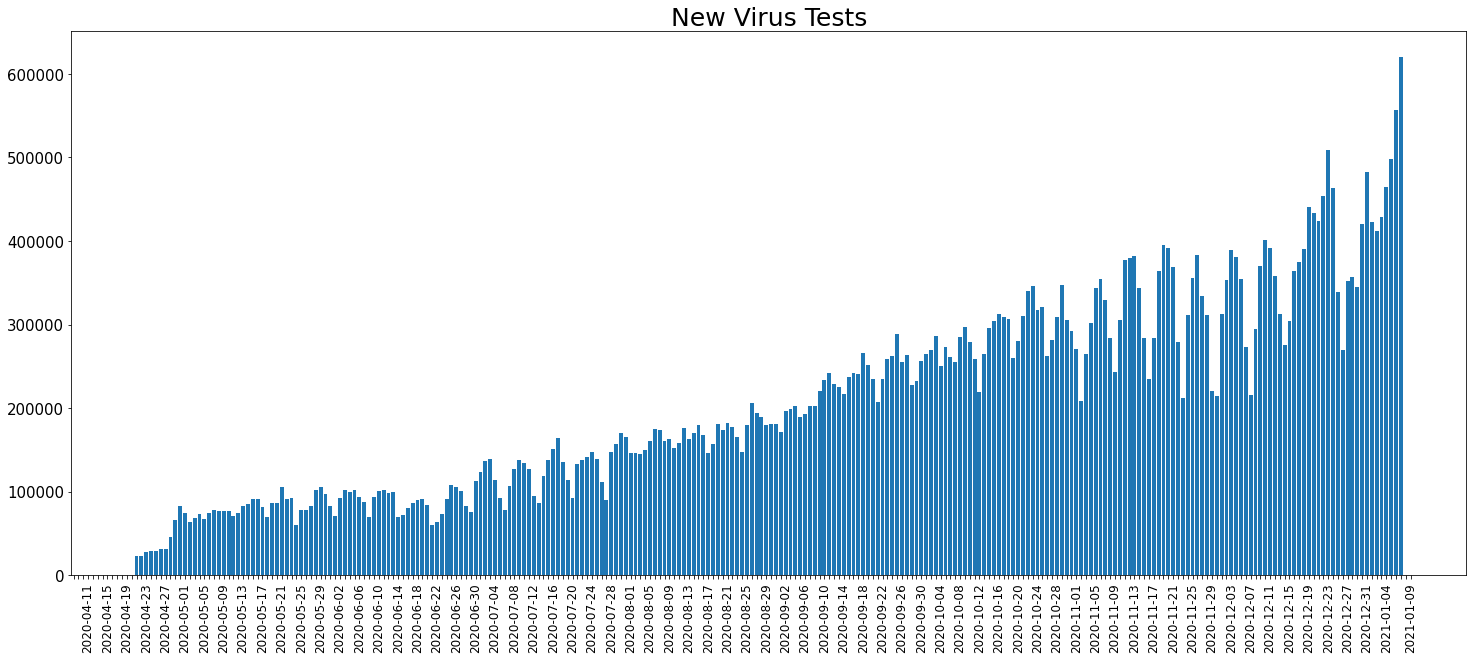

In [42]:
return1, return2, return3 = one_chart('newVirusTests', 'New Virus Tests',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

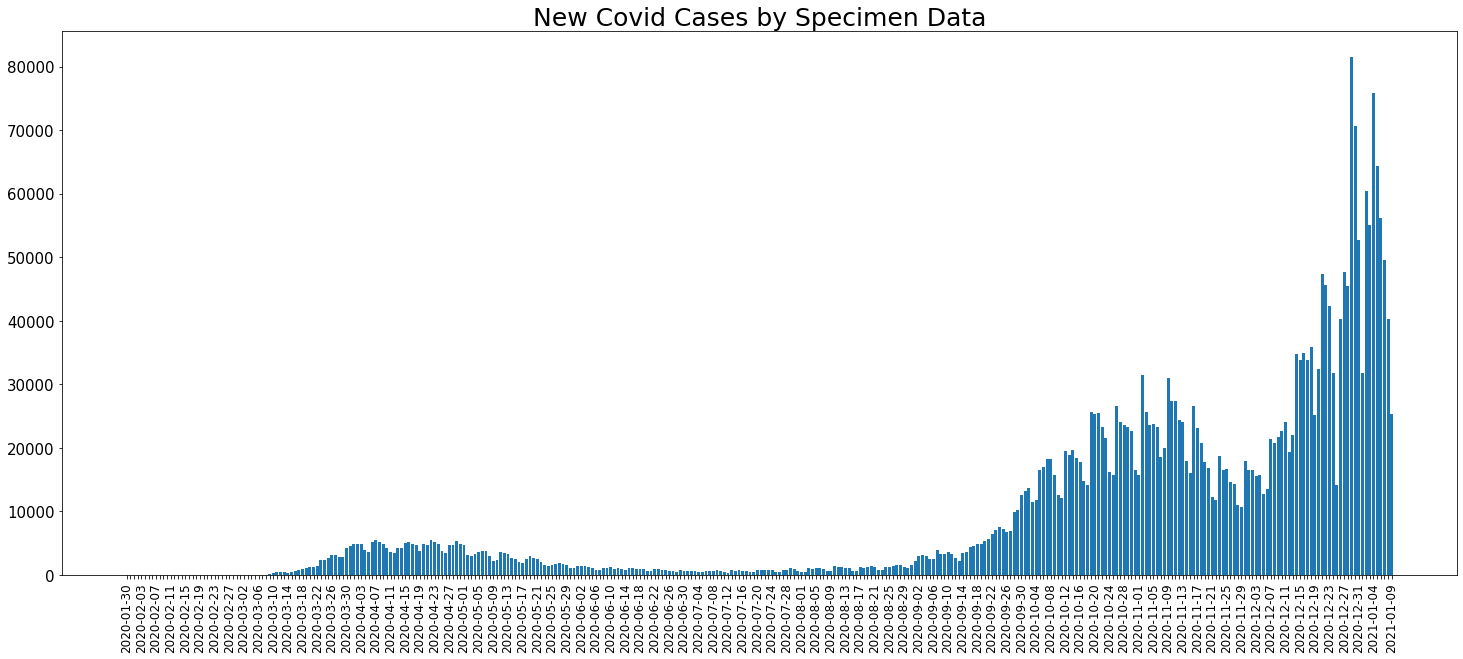

In [43]:
return1, return2, return3 = one_chart('newCasesBySpecimenDate', 'New Covid Cases by Specimen Data',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

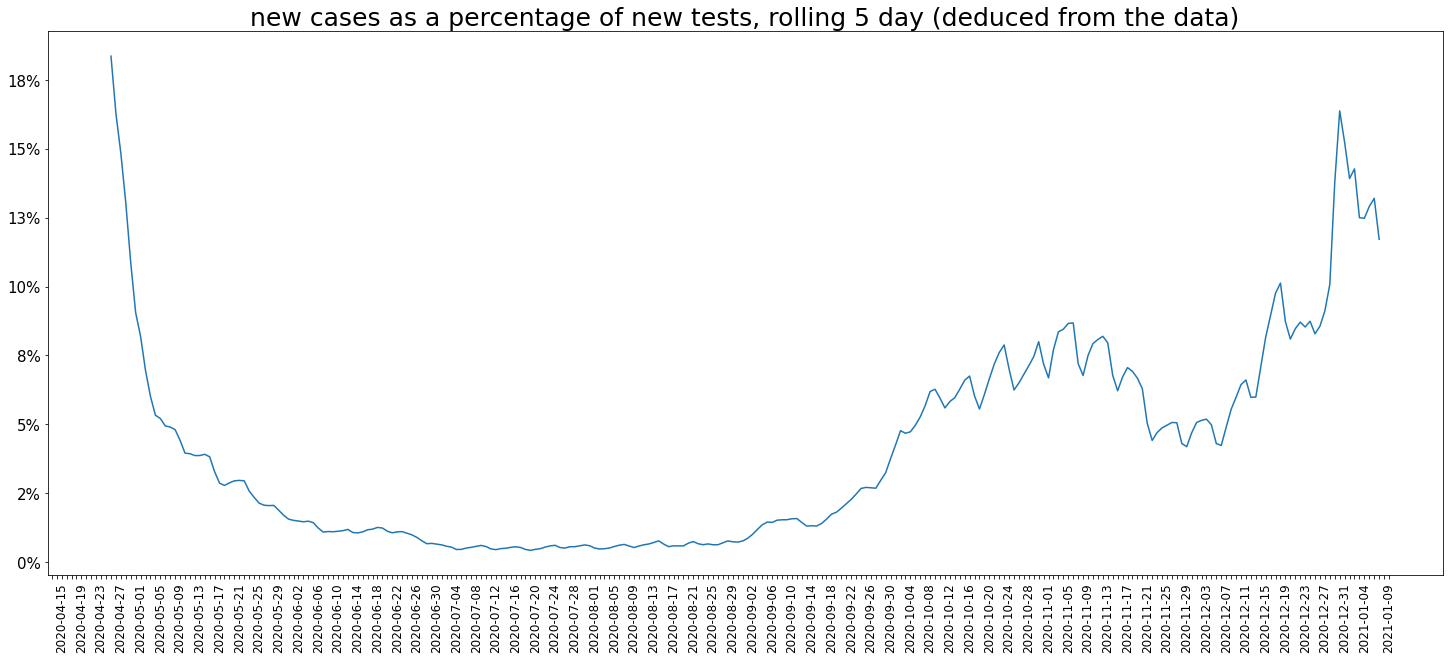

In [44]:
return1, return2, return3 = one_chart('%_positive_tests', 'new cases as a percentage of new tests, rolling 5 day (deduced from the data)',0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

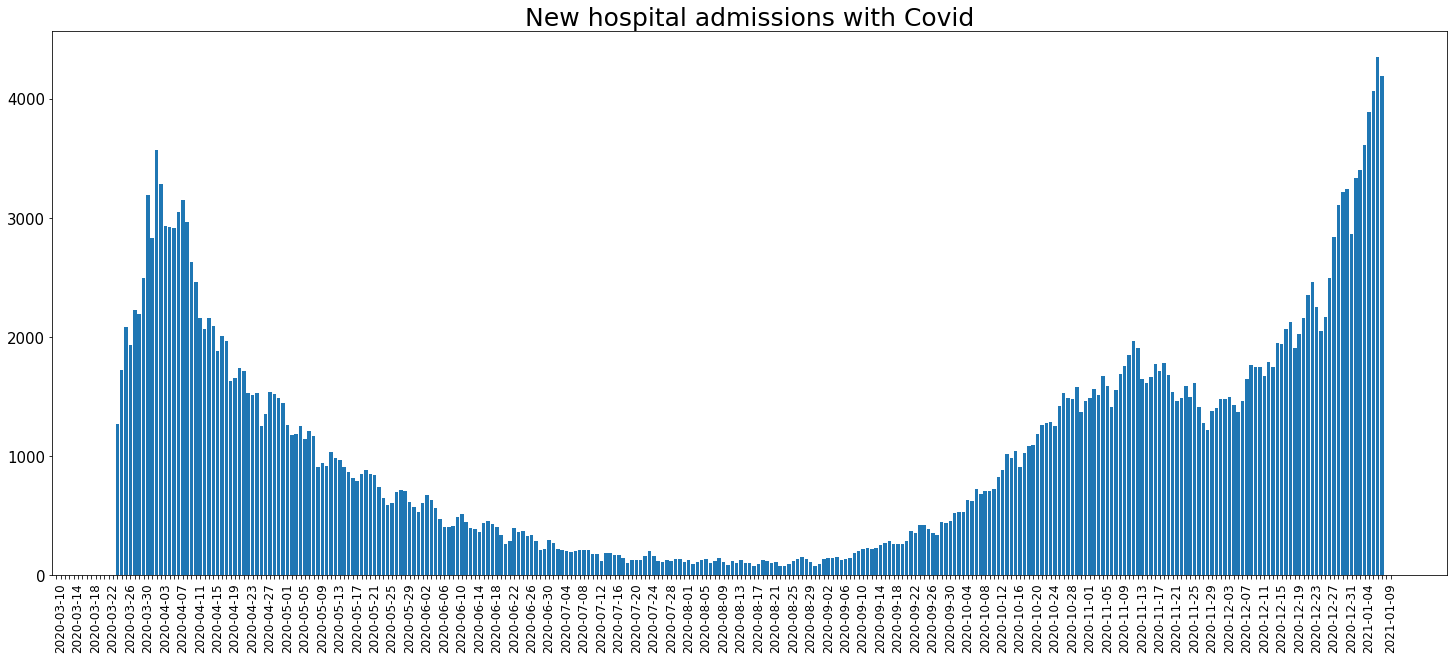

In [45]:
return1, return2, return3 = one_chart('newAdmissions', 'New hospital admissions with Covid',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

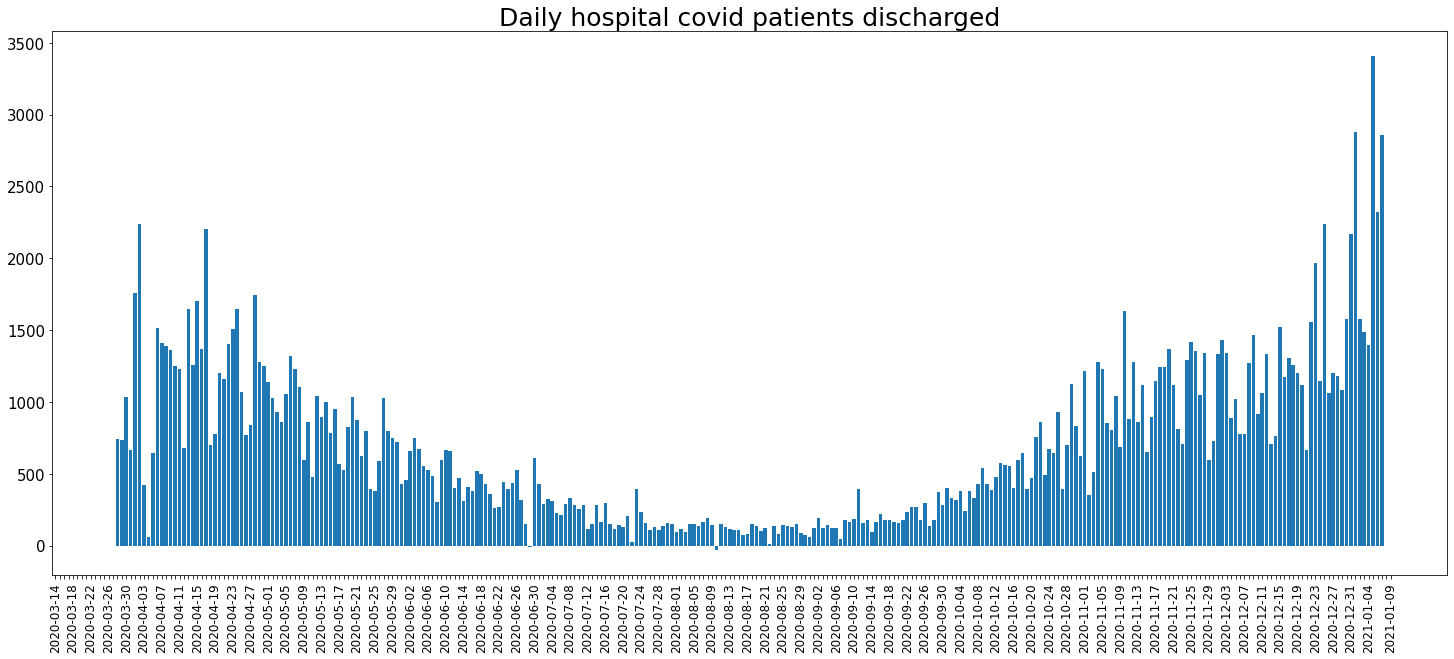

In [46]:
return1, return2, return3 = one_chart('leaving_hospital', 'Daily hospital covid patients discharged',1,0)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

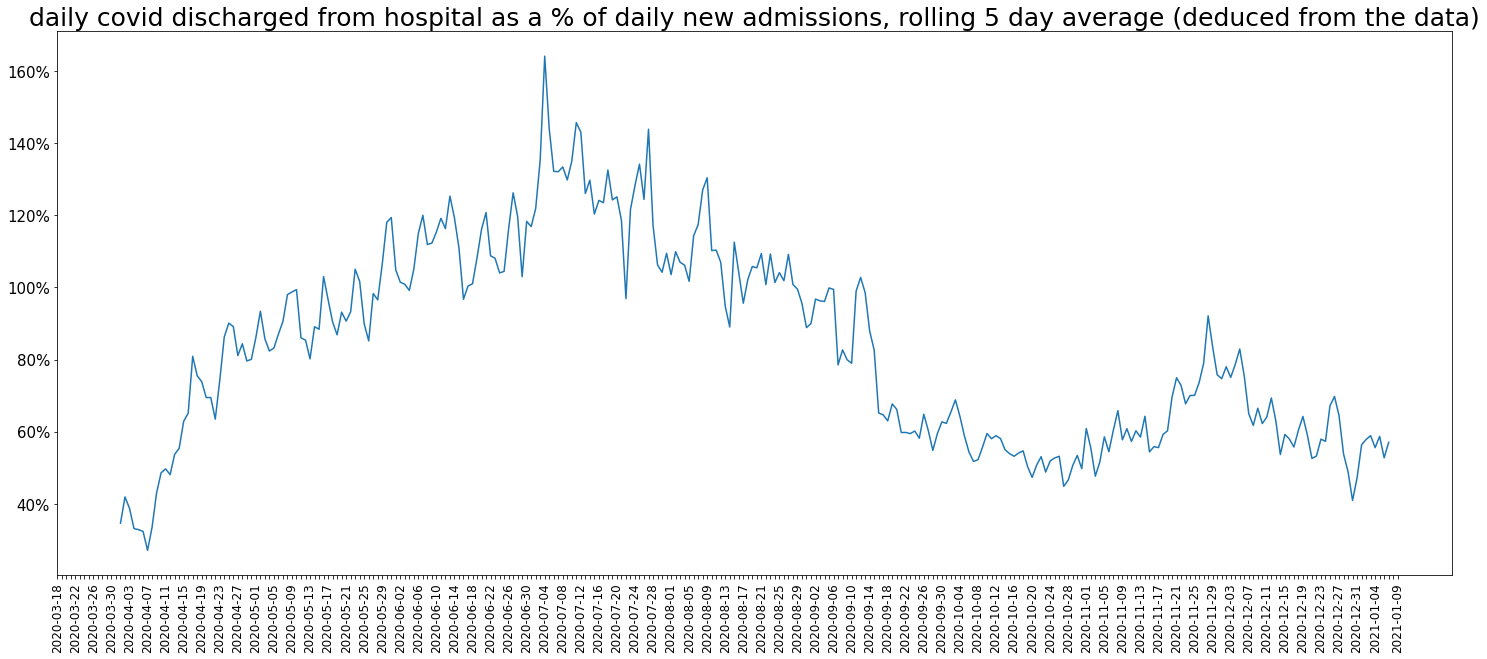

In [47]:

return1, return2, return3 = one_chart('leavers_%_admissions', 
                                      'daily covid discharged from hospital as a % of daily new admissions, rolling 5 day average (deduced from the data)',0,1)
# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

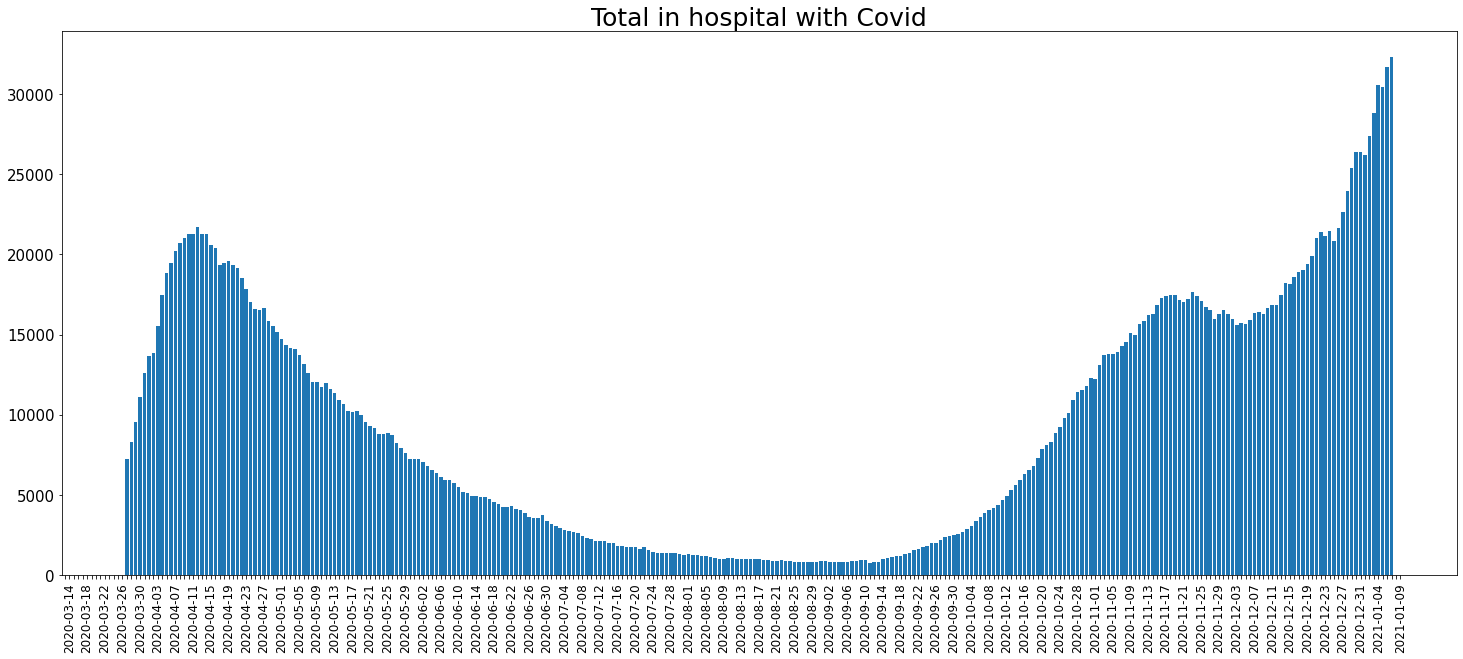

In [48]:
return1, return2, return3 = one_chart('hospitalCases', 'Total in hospital with Covid',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

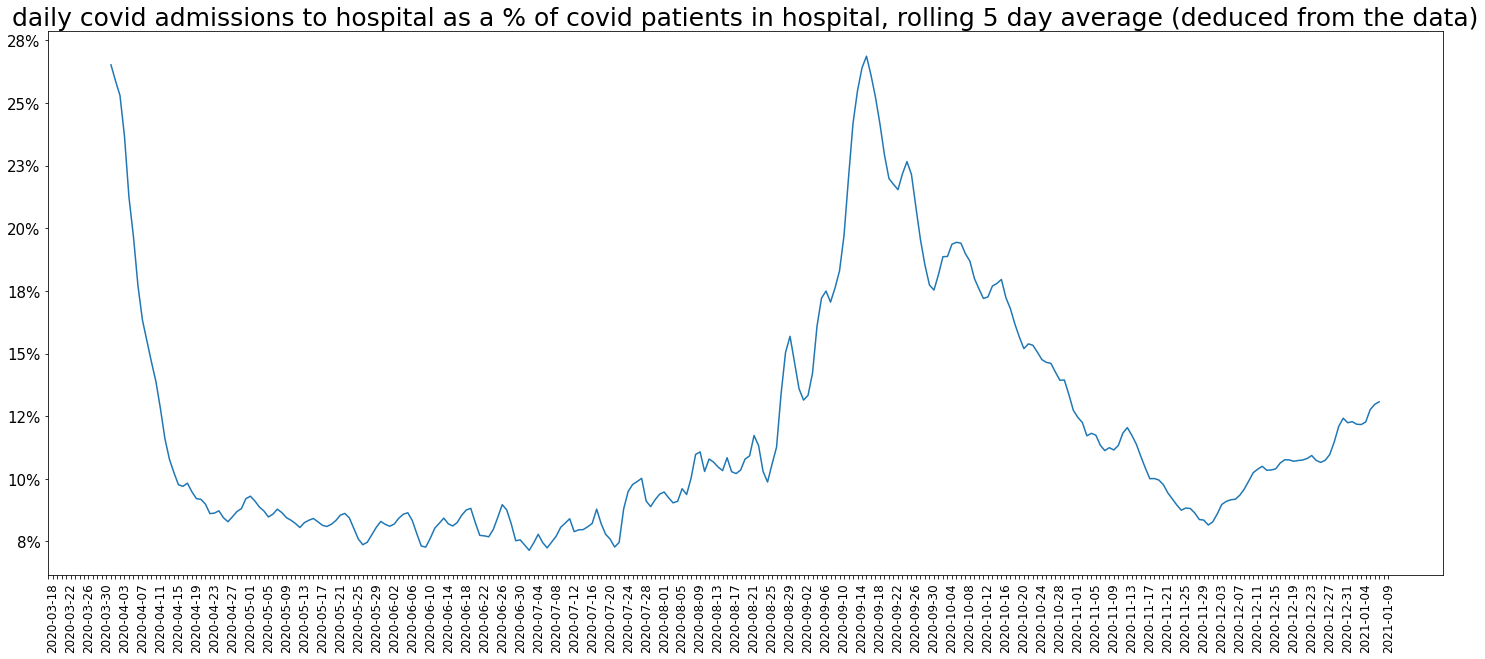

In [49]:
return1, return2, return3 = one_chart('newAdmissions%_inHospital', 
                                      'daily covid admissions to hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

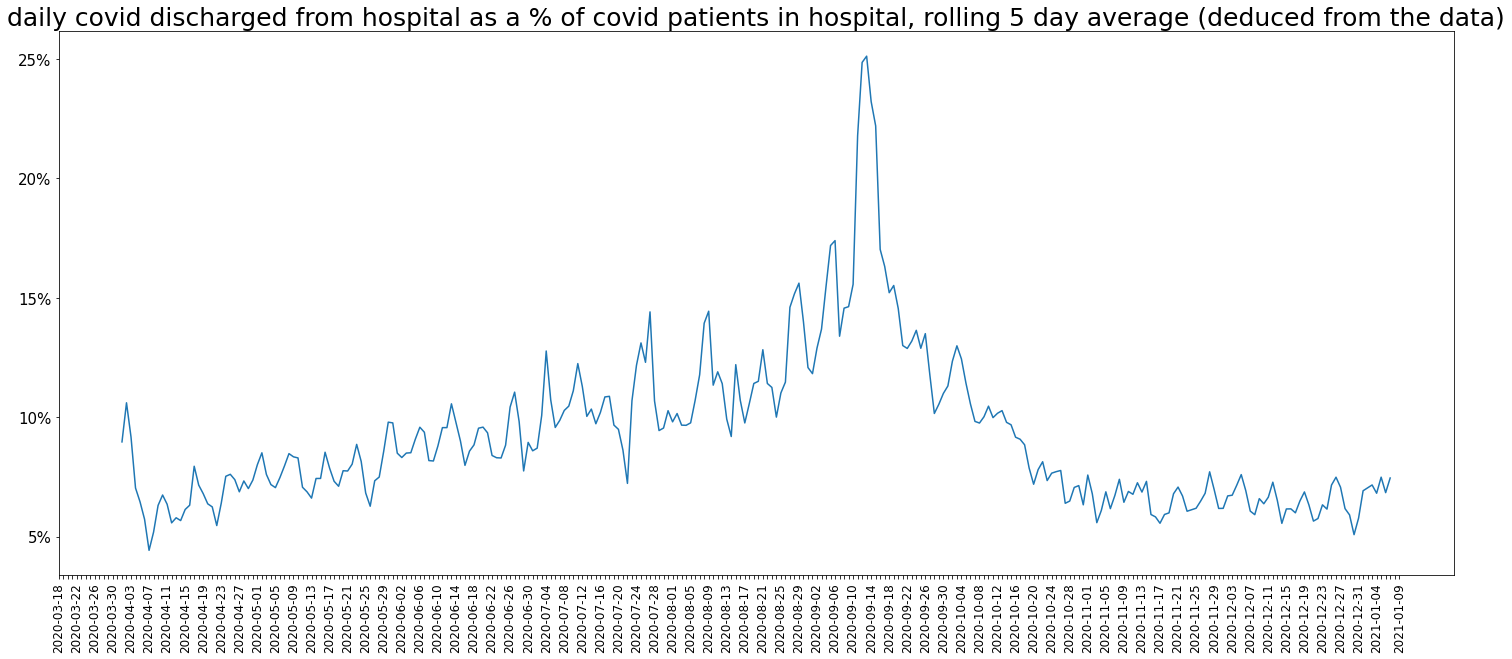

In [50]:
return1, return2, return3 = one_chart('leavers_%_inHospital', 
                                      'daily covid discharged from hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

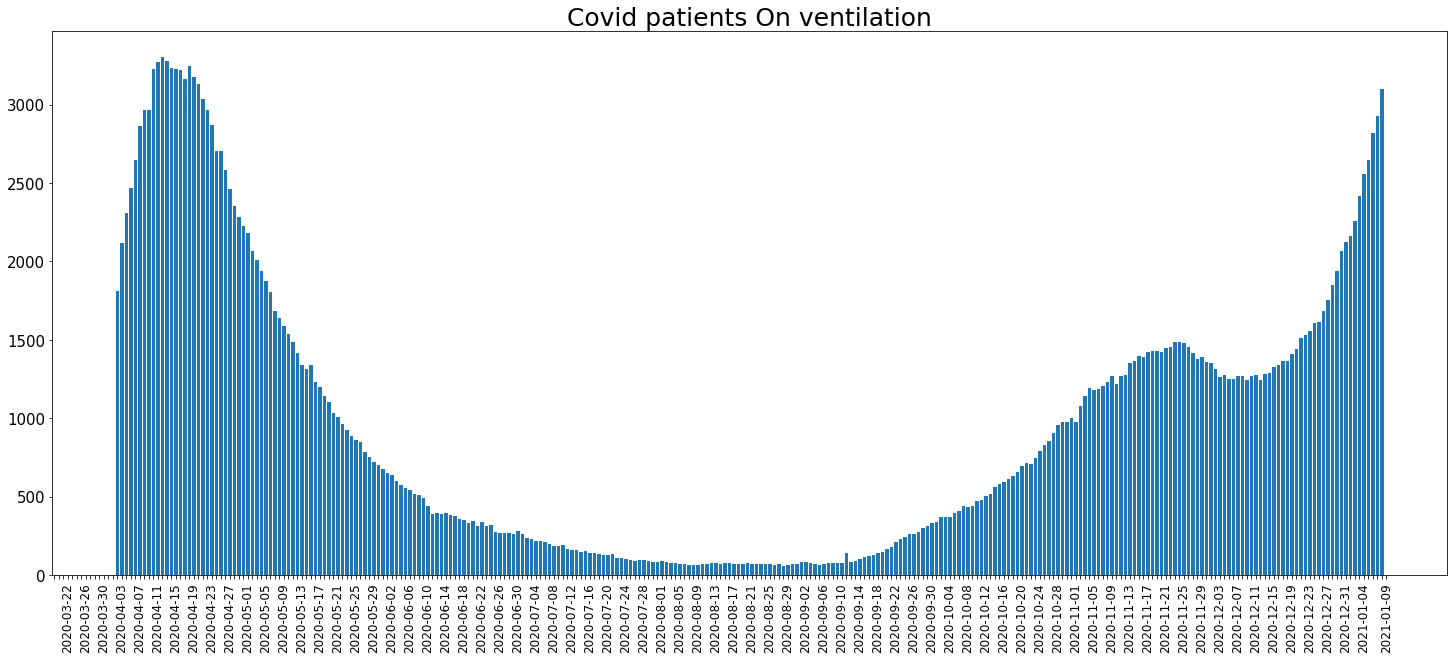

In [51]:
return1, return2, return3 = one_chart('covidOccupiedMVBeds', 'Covid patients On ventilation',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

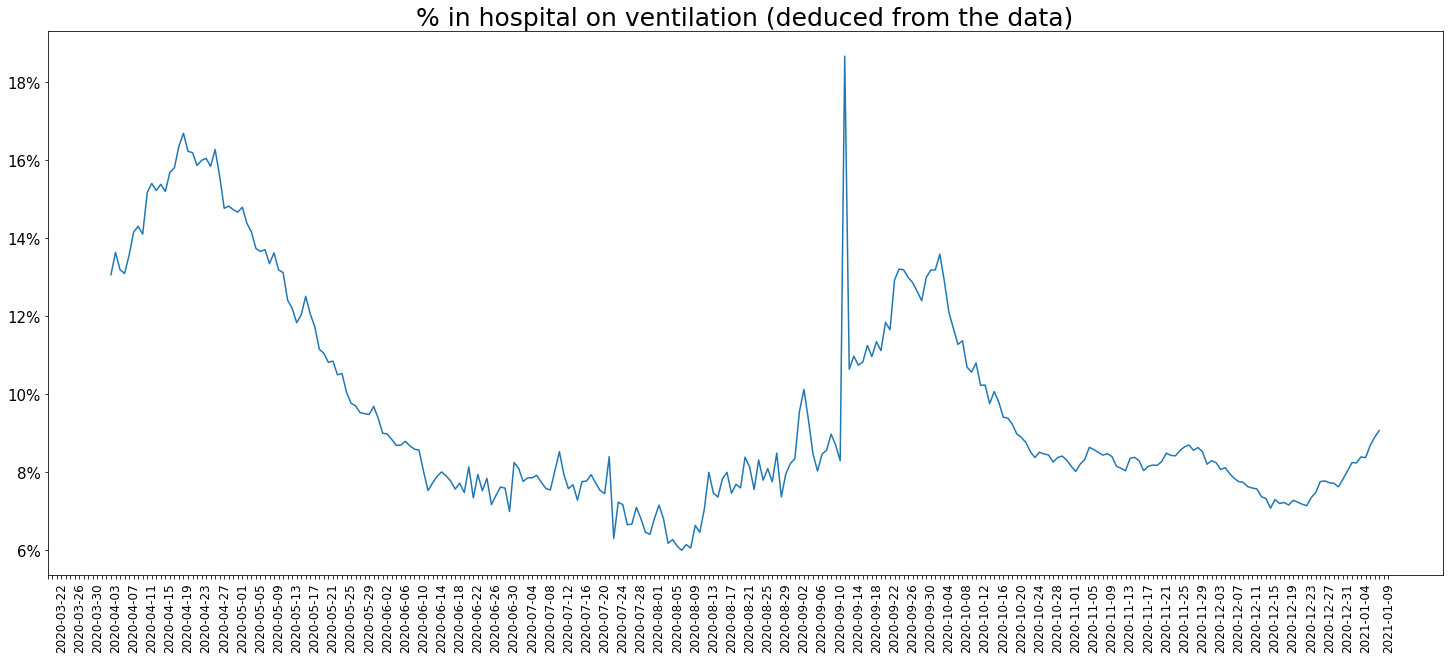

In [52]:
return1, return2, return3 = one_chart('%_on_ventilation', '% in hospital on ventilation (deduced from the data)',0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

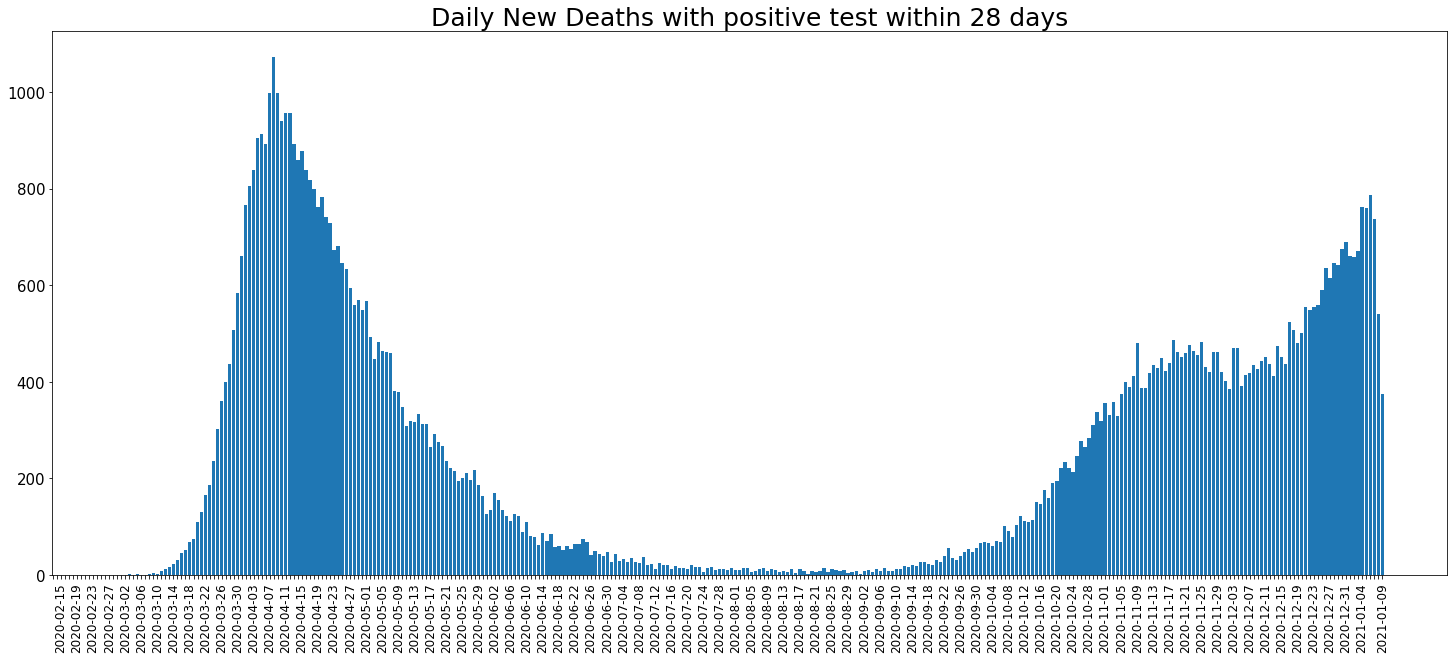

In [53]:
return1, return2, return3 = one_chart('newDeaths28DaysByDeathDate', 'Daily New Deaths with positive test within 28 days',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

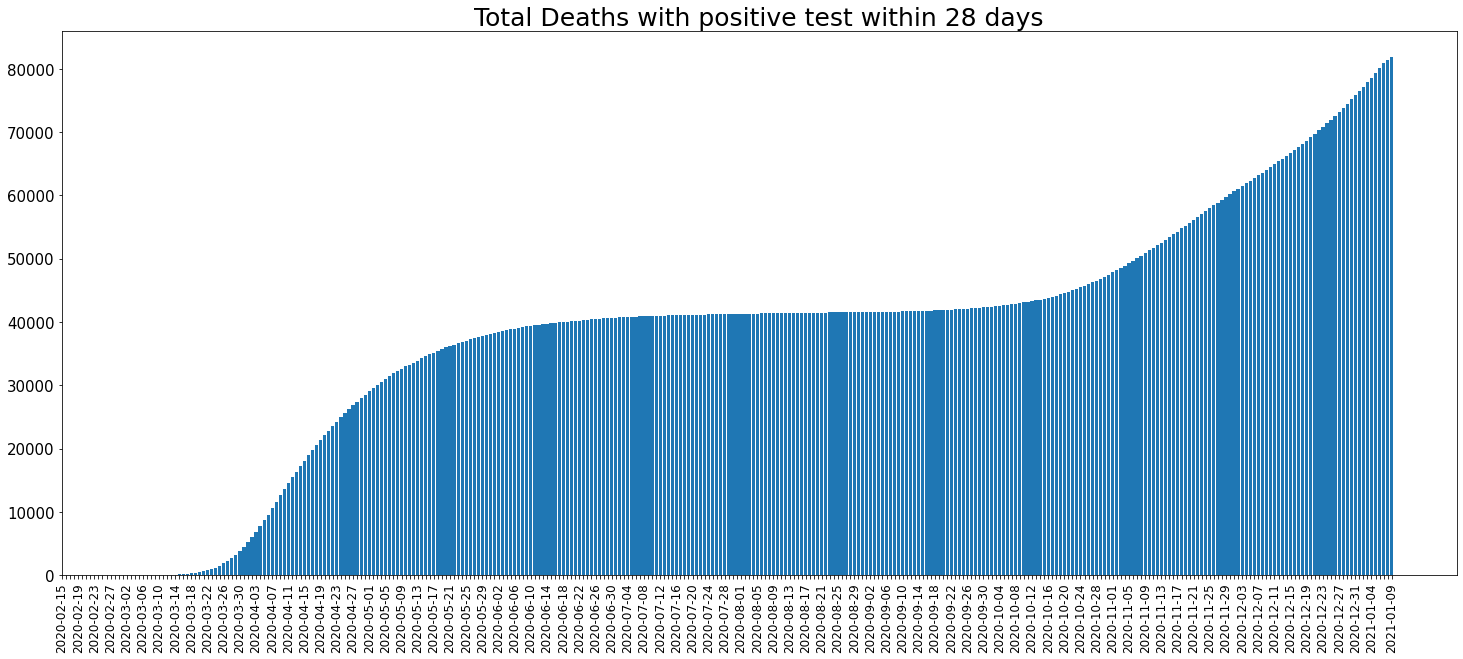

In [54]:
return1, return2, return3 = one_chart('cumDeaths28DaysByDeathDate', 'Total Deaths with positive test within 28 days',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

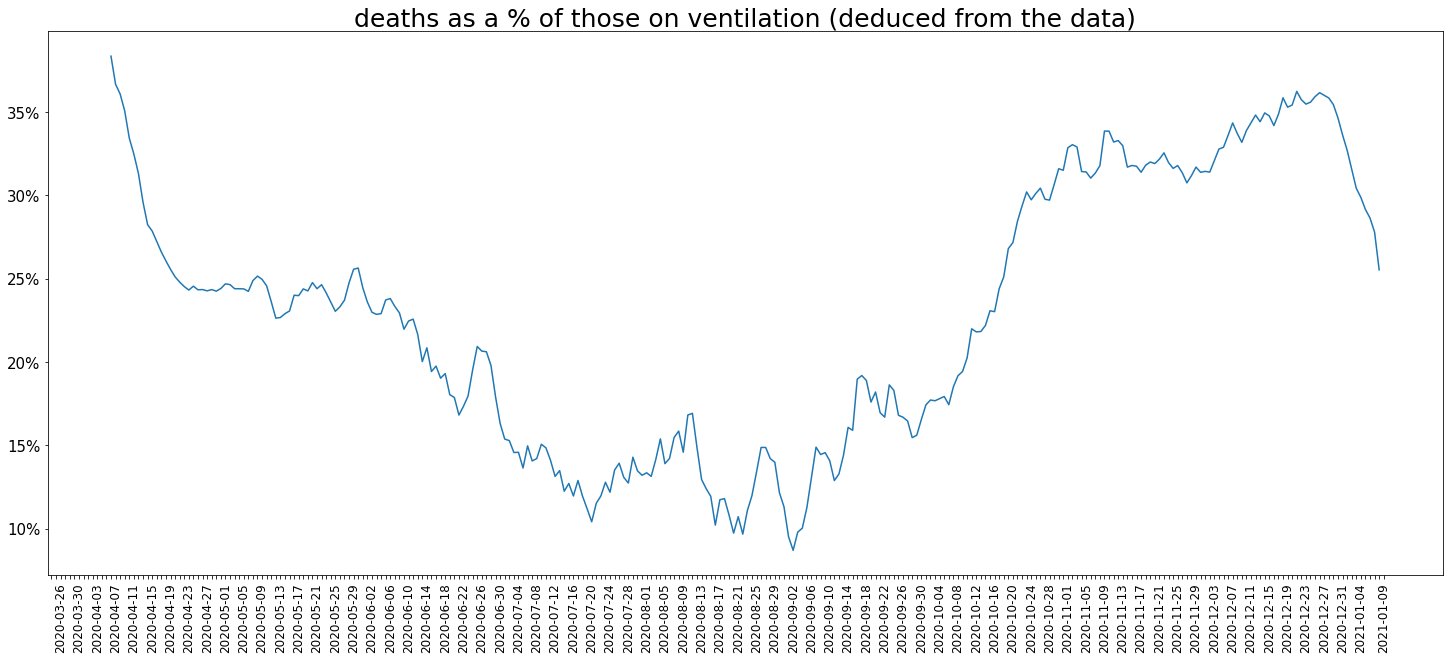

In [55]:
return1, return2, return3 = one_chart('deaths_%_vent', 'deaths as a % of those on ventilation (deduced from the data)',0,1)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

In [56]:
df_summary.tail()

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,newAdmissions,cumAdmissions,hospitalCases,covidOccupiedMVBeds,newVirusTests,cumVirusTests,%_on_ventilation,%_positive_tests,leaving_hospital,leavers_%_admissions,newAdmissions%_inHospital,leavers_%_inHospital,deaths_%_vent
341,2021-01-05,64299,2943531,759.0,79380.0,4066.0,305544.0,30459.0,2645.0,498624.0,54808079.0,0.086838,0.129048,3407.0,0.587123,0.127568,0.074898,0.291456
342,2021-01-06,56161,2999692,787.0,80167.0,4347.0,309891.0,31697.0,2821.0,557441.0,55378721.0,0.088999,0.132006,2322.0,0.527520,0.129696,0.068417,0.286333
343,2021-01-07,49632,3049324,738.0,80905.0,4193.0,314084.0,32294.0,2929.0,619941.0,56003851.0,0.090698,0.117128,2858.0,0.570320,0.130712,0.074548,0.277832
344,2021-01-08,40326,3089650,541.0,81446.0,NaN,NaN,NaN,3098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255248
345,2021-01-09,25412,3115062,374.0,81820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the England by Age (most upto date age related death data i can find): Cases, Hospitalisations and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [58]:
# England data
# using England data given no other nation data for hospital admissions by age

# create new dataframes for deaths and cases

df_eng_cd.tail()

,date,areaType,areaCode,areaName,metric,age,cases,rollingRate,rollingSum
14072,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,20_24,NaN,0.1,3
14073,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,15_19,NaN,0.1,2
14074,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,10_14,NaN,0.0,0
14075,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,00_59,41030.0,686.7,294040
14076,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,00_04,933.0,206.3,6807


In [59]:
df_eng_newcasesbyage = df_eng_cd[df_eng_cd['metric'] == 'newCasesBySpecimenDateAgeDemographics'].reset_index(drop=True)
df_eng_cumdeathsbyage = df_eng_cd[df_eng_cd['metric'] == 'newDeaths28DaysByDeathDateAgeDemographics'].reset_index(drop=True)

In [60]:
df_eng_newcasesbyage.tail()

,date,areaType,areaCode,areaName,metric,age,cases,rollingRate,rollingSum
7541,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,unassigned,42.0,NaN,492
7542,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,45_49,3733.0,742.3,27581
7543,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,60+,9044.0,447.0,60192
7544,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,00_59,41030.0,686.7,294040
7545,2021-01-06,nation,E92000001,England,newCasesBySpecimenDateAgeDemographics,00_04,933.0,206.3,6807


In [61]:
df_eng_cumdeathsbyage.tail()

,date,areaType,areaCode,areaName,metric,age,cases,rollingRate,rollingSum
6526,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,30_34,NaN,0.4,14
6527,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,25_29,NaN,0.1,5
6528,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,20_24,NaN,0.1,3
6529,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,15_19,NaN,0.1,2
6530,2021-01-06,nation,E92000001,England,newDeaths28DaysByDeathDateAgeDemographics,10_14,NaN,0.0,0


In [62]:
# clean the dateframes

# delete duplicate rows
df_eng_newcasesbyage.drop_duplicates(inplace=True)
df_eng_newcasesbyage.reset_index(drop=True)

df_eng_cumdeathsbyage.drop_duplicates(inplace=True)
df_eng_cumdeathsbyage.reset_index(drop=True)

df_eng_cumadmissionsbyage.drop_duplicates(inplace=True)
df_eng_cumadmissionsbyage.reset_index(drop=True)

,date,areaType,areaCode,areaName,metric,age,rate,value
0,2020-03-19,nation,E92000001,England,cumAdmissionsByAge,65_to_84,2.4,209
1,2020-03-19,nation,E92000001,England,cumAdmissionsByAge,18_to_64,0.5,171
2,2020-03-19,nation,E92000001,England,cumAdmissionsByAge,85+,7.1,97
3,2020-03-19,nation,E92000001,England,cumAdmissionsByAge,0_to_5,0.1,4
4,2020-03-19,nation,E92000001,England,cumAdmissionsByAge,6_to_17,0.1,5
...,...,...,...,...,...,...,...,...
1480,2021-01-09,nation,E92000001,England,cumAdmissionsByAge,18_to_64,271.0,91724
1481,2021-01-09,nation,E92000001,England,cumAdmissionsByAge,85+,4318.3,58944
1482,2021-01-09,nation,E92000001,England,cumAdmissionsByAge,0_to_5,45.4,1838
1483,2021-01-09,nation,E92000001,England,cumAdmissionsByAge,65_to_84,1307.0,115199


In [63]:
# delete unwanted columns

df_eng_newcasesbyage = df_eng_newcasesbyage[['date', 'age', 'cases']]
df_eng_cumdeathsbyage = df_eng_cumdeathsbyage[['date', 'age', 'rollingSum']]
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage[['date', 'age', 'value']]

In [64]:
df_eng_newcasesbyage.tail()

,date,age,cases
7541,2021-01-06,unassigned,42.0
7542,2021-01-06,45_49,3733.0
7543,2021-01-06,60+,9044.0
7544,2021-01-06,00_59,41030.0
7545,2021-01-06,00_04,933.0


In [65]:
df_eng_cumdeathsbyage.tail()

,date,age,rollingSum
6526,2021-01-06,30_34,14
6527,2021-01-06,25_29,5
6528,2021-01-06,20_24,3
6529,2021-01-06,15_19,2
6530,2021-01-06,10_14,0


In [66]:
df_eng_cumadmissionsbyage.tail()

,date,age,value
1480,2021-01-09,18_to_64,91724
1481,2021-01-09,85+,58944
1482,2021-01-09,0_to_5,1838
1483,2021-01-09,65_to_84,115199
1484,2021-01-09,6_to_17,1817


In [67]:
# create new dataframes with the age bands as the headers
# new cases

dates = df_eng_newcasesbyage['date'].tolist()
dates = list(set(dates))

df_eng_newcasesbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_newcasesbyage_Summary.sort_values('date', inplace = True)
df_eng_newcasesbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_newcasesbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_newcasesbyage[df_eng_newcasesbyage['age'] == headers[i]]['cases'].tolist()
    df_eng_newcasesbyage_Summary[headers[i]] = listOfValues

#df_eng_newcasesbyage_Summary['date'] = df_eng_newcasesbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_newcasesbyage_Summary.tail()

,date,75_79,00_59,60+,unassigned,90+,85_89,80_84,70_74,65_69,60_64,55_59,00_04,45_49,50_54,10_14,15_19,20_24,05_09,30_34,35_39,40_44,25_29
338,2021-01-02,889.0,45459.0,8620.0,63.0,610.0,685.0,795.0,1238.0,1675.0,2728.0,3930.0,1057.0,4347.0,4522.0,1759.0,3139.0,5066.0,1289.0,5380.0,4949.0,4481.0,5477.0
339,2021-01-03,793.0,41874.0,7494.0,63.0,573.0,560.0,692.0,1091.0,1362.0,2423.0,3433.0,1003.0,3954.0,3844.0,1621.0,2885.0,4955.0,1181.0,5052.0,4443.0,4081.0,5359.0
340,2021-01-04,1248.0,56858.0,11850.0,180.0,1030.0,1068.0,1113.0,1692.0,2128.0,3571.0,4828.0,1229.0,5368.0,5519.0,2203.0,3944.0,6831.0,1581.0,6642.0,5945.0,5344.0,7244.0
341,2021-01-05,1129.0,46821.0,10393.0,86.0,984.0,984.0,1120.0,1463.0,1742.0,2971.0,4134.0,982.0,4271.0,4546.0,1643.0,3306.0,5908.0,1141.0,5573.0,4818.0,4278.0,6135.0
342,2021-01-06,1023.0,41030.0,9044.0,42.0,836.0,835.0,943.0,1248.0,1551.0,2608.0,3634.0,933.0,3733.0,3922.0,1495.0,2783.0,5016.0,1030.0,4901.0,4460.0,3750.0,5331.0


In [68]:
# create new dataframes with the age bands as the headers
# cum deaths

dates = df_eng_cumdeathsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumdeathsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumdeathsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumdeathsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumdeathsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumdeathsbyage[df_eng_cumdeathsbyage['age'] == headers[i]]['rollingSum'].tolist()
    df_eng_cumdeathsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumdeathsbyage_Summary['date'] = df_eng_cumdeathsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumdeathsbyage_Summary.tail()

,date,15_19,20_24,25_29,30_34,35_39,40_44,45_49,50_54,60_64,65_69,70_74,75_79,80_84,85_89,90+,60+,05_09,55_59,10_14,00_04,00_59
306,2021-01-02,0,0,4,13,13,14,38,59,133,270,382,564,756,812,832,3749,2,99,0,14,256
307,2021-01-03,1,0,6,15,17,20,36,61,128,266,395,545,771,808,842,3755,2,106,0,20,284
308,2021-01-04,1,1,5,13,17,20,42,62,139,296,393,556,792,820,875,3871,2,112,0,20,295
309,2021-01-05,2,1,6,13,16,20,47,72,147,311,424,556,806,832,886,3962,2,127,0,20,326
310,2021-01-06,2,3,5,14,17,22,52,76,145,315,434,566,829,857,904,4050,1,133,0,22,347


In [69]:
# convert the rolling deaths into daily deaths

def rolling_to_new(column_name):

    newdeaths = [0]*6   
    for i in range(6,len(df_eng_cumdeathsbyage_Summary)):
        newdaydeaths = df_eng_cumdeathsbyage_Summary[column_name].iloc[i] - df_eng_cumdeathsbyage_Summary[column_name].iloc[i-1] + newdeaths[i-7]
        newdeaths.append(newdaydeaths)

    df_eng_cumdeathsbyage_Summary[column_name + '_new'] = newdeaths

In [70]:
col_names = df_eng_cumdeathsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    rolling_to_new(col_names[i])

In [71]:
df_eng_cumdeathsbyage_Summary.tail()

,date,15_19,20_24,25_29,30_34,35_39,40_44,45_49,50_54,60_64,65_69,70_74,75_79,80_84,85_89,90+,60+,05_09,55_59,10_14,00_04,00_59,15_19_new,20_24_new,25_29_new,30_34_new,35_39_new,40_44_new,45_49_new,50_54_new,60_64_new,65_69_new,70_74_new,75_79_new,80_84_new,85_89_new,90+_new,60+_new,05_09_new,55_59_new,10_14_new,00_04_new,00_59_new
306,2021-01-02,0,0,4,13,13,14,38,59,133,270,382,564,756,812,832,3749,2,99,0,14,256,0,0,1,2,1,2,6,9,14,33,57,81,113,114,128,540,0,19,0,2,42
307,2021-01-03,1,0,6,15,17,20,36,61,128,266,395,545,771,808,842,3755,2,106,0,20,284,1,0,2,2,5,6,5,11,14,35,62,77,113,113,112,526,0,19,0,6,57
308,2021-01-04,1,1,5,13,17,20,42,62,139,296,393,556,792,820,875,3871,2,112,0,20,295,0,1,0,0,1,3,9,11,24,55,70,80,127,133,149,638,0,24,0,3,52
309,2021-01-05,2,1,6,13,16,20,47,72,147,311,424,556,806,832,886,3962,2,127,0,20,326,1,0,1,1,4,2,10,17,26,58,74,76,124,132,139,629,0,24,0,2,62
310,2021-01-06,2,3,5,14,17,22,52,76,145,315,434,566,829,857,904,4050,1,133,0,22,347,0,2,1,2,2,3,9,12,20,46,73,87,128,147,142,643,0,19,0,3,53


In [72]:
# create new dataframes with the age bands as the headers
# cum admissions

dates = df_eng_cumadmissionsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumadmissionsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumadmissionsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumadmissionsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumadmissionsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumadmissionsbyage[df_eng_cumadmissionsbyage['age'] == headers[i]]['value'].tolist()
    df_eng_cumadmissionsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumadmissionsbyage_Summary['date'] = df_eng_cumadmissionsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumadmissionsbyage_Summary.tail()

,date,65_to_84,18_to_64,85+,0_to_5,6_to_17
292,2021-01-05,108937,86161,55858,1740,1744
293,2021-01-06,110571,87673,56630,1764,1769
294,2021-01-07,112144,89092,57439,1788,1793
295,2021-01-08,113632,90368,58177,1818,1809
296,2021-01-09,115199,91724,58944,1838,1817


In [73]:
# convert the cum admissions into daily admissions

def cum_to_new(column_name):

    newadmissions = []
    newadmissions.append(df_eng_cumadmissionsbyage_Summary[column_name][0])
    for i in range(1,len(df_eng_cumadmissionsbyage_Summary)):
        newdayadmissions = df_eng_cumadmissionsbyage_Summary[column_name].iloc[i] - df_eng_cumadmissionsbyage_Summary[column_name].iloc[i-1]
        newadmissions.append(newdayadmissions)

    df_eng_cumadmissionsbyage_Summary[column_name + '_new'] = newadmissions

In [74]:
col_names = df_eng_cumadmissionsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    cum_to_new(col_names[i])

In [75]:
df_eng_cumadmissionsbyage_Summary.head()

,date,65_to_84,18_to_64,85+,0_to_5,6_to_17,65_to_84_new,18_to_64_new,85+_new,0_to_5_new,6_to_17_new
0,2020-03-19,209,171,97,4,5,209,171,97,4,5
1,2020-03-20,445,384,213,4,13,236,213,116,0,8
2,2020-03-21,695,618,340,5,16,250,234,127,1,3
3,2020-03-22,1024,856,469,10,17,329,238,129,5,1
4,2020-03-23,1471,1200,650,16,23,447,344,181,6,6


In [76]:
# create new columns in the other two dataframes to match the admissions ages

In [77]:
def create_new_columns(df, newcol,name):

    df[name] = 0

    for i in range(len(newcol)):
        df[name] = df[name] + df[newcol[i]]


In [78]:
nursery = ['00_04']
school = ['15_19','10_14','05_09']
working = ['60_64', '55_59', '50_54','45_49','40_44','35_39','30_34','25_29','20_24']
old = ['80_84','75_79','70_74','65_69']
older = ['90+','85_89']

In [79]:
create_new_columns(df_eng_newcasesbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_newcasesbyage_Summary,school,'05_19_')
create_new_columns(df_eng_newcasesbyage_Summary,working,'20_64_')
create_new_columns(df_eng_newcasesbyage_Summary,old,'65_84_')
create_new_columns(df_eng_newcasesbyage_Summary,older,'85+_')

In [80]:
nursery = ['00_04_new']
school = ['15_19_new','10_14_new','05_09_new']
working = ['60_64_new', '55_59_new', '50_54_new','45_49_new','40_44_new','35_39_new','30_34_new','25_29_new','20_24_new']
old = ['80_84_new','75_79_new','70_74_new','65_69_new']
older = ['90+_new','85_89_new']

In [81]:
create_new_columns(df_eng_cumdeathsbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_cumdeathsbyage_Summary,school,'05_19_')
create_new_columns(df_eng_cumdeathsbyage_Summary,working,'20_64_')
create_new_columns(df_eng_cumdeathsbyage_Summary,old,'65_84_')
create_new_columns(df_eng_cumdeathsbyage_Summary,older,'85+_')

In [82]:
# add rolling mean 7 day columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'rolling7'] = df_eng_newcasesbyage_Summary[columns1[i]].rolling(7).mean()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'rolling7'] = df_eng_cumdeathsbyage_Summary[columns1[i]].rolling(7).mean()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'rolling7'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].rolling(7).mean()


In [83]:
# add cumulative columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'cumsum'] = df_eng_newcasesbyage_Summary[columns1[i]].cumsum()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'cumsum'] = df_eng_cumdeathsbyage_Summary[columns1[i]].cumsum()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'cumsum'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].cumsum()


In [84]:
df_eng_newcasesbyage_Summary.head()

,date,75_79,00_59,60+,unassigned,90+,85_89,80_84,70_74,65_69,60_64,55_59,00_04,45_49,50_54,10_14,15_19,20_24,05_09,30_34,35_39,40_44,25_29,00_04_,05_19_,20_64_,65_84_,85+_,00_04_rolling7,05_19_rolling7,20_64_rolling7,65_84_rolling7,85+_rolling7,00_04_cumsum,05_19_cumsum,20_64_cumsum,65_84_cumsum,85+_cumsum
0,2020-01-30,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0
1,2020-01-31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,0.0
2,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,0.0
3,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,0.0
4,2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,0.0


In [85]:
df_eng_cumadmissionsbyage_Summary.head()

,date,65_to_84,18_to_64,85+,0_to_5,6_to_17,65_to_84_new,18_to_64_new,85+_new,0_to_5_new,6_to_17_new,0_to_5_newrolling7,6_to_17_newrolling7,18_to_64_newrolling7,65_to_84_newrolling7,85+_newrolling7,0_to_5_newcumsum,6_to_17_newcumsum,18_to_64_newcumsum,65_to_84_newcumsum,85+_newcumsum
0,2020-03-19,209,171,97,4,5,209,171,97,4,5,NaN,NaN,NaN,NaN,NaN,4,5,171,209,97
1,2020-03-20,445,384,213,4,13,236,213,116,0,8,NaN,NaN,NaN,NaN,NaN,4,13,384,445,213
2,2020-03-21,695,618,340,5,16,250,234,127,1,3,NaN,NaN,NaN,NaN,NaN,5,16,618,695,340
3,2020-03-22,1024,856,469,10,17,329,238,129,5,1,NaN,NaN,NaN,NaN,NaN,10,17,856,1024,469
4,2020-03-23,1471,1200,650,16,23,447,344,181,6,6,NaN,NaN,NaN,NaN,NaN,16,23,1200,1471,650


In [86]:
df_eng_cumdeathsbyage_Summary.head()

,date,15_19,20_24,25_29,30_34,35_39,40_44,45_49,50_54,60_64,65_69,70_74,75_79,80_84,85_89,90+,60+,05_09,55_59,10_14,00_04,00_59,15_19_new,20_24_new,25_29_new,30_34_new,35_39_new,40_44_new,45_49_new,50_54_new,60_64_new,65_69_new,70_74_new,75_79_new,80_84_new,85_89_new,90+_new,60+_new,05_09_new,55_59_new,10_14_new,00_04_new,00_59_new,00_04_,05_19_,20_64_,65_84_,85+_,00_04_rolling7,05_19_rolling7,20_64_rolling7,65_84_rolling7,85+_rolling7,00_04_cumsum,05_19_cumsum,20_64_cumsum,65_84_cumsum,85+_cumsum
0,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
3,2020-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
4,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [87]:
test1='abc_'
if '%' in test1:
    print('yes')
else:
    print('no')

no


In [88]:
def multiple_line_charts(df, columns, legend_labels, chart_title):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if '%' in chart_title:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    for i in range(len(columns)):
        y1 = df[columns[i]]
        ax.plot(x, y1, label = legend_labels[i])
    
    ax.legend(fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - multiple_line_charts ' + str(chart_title) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_    


In [89]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

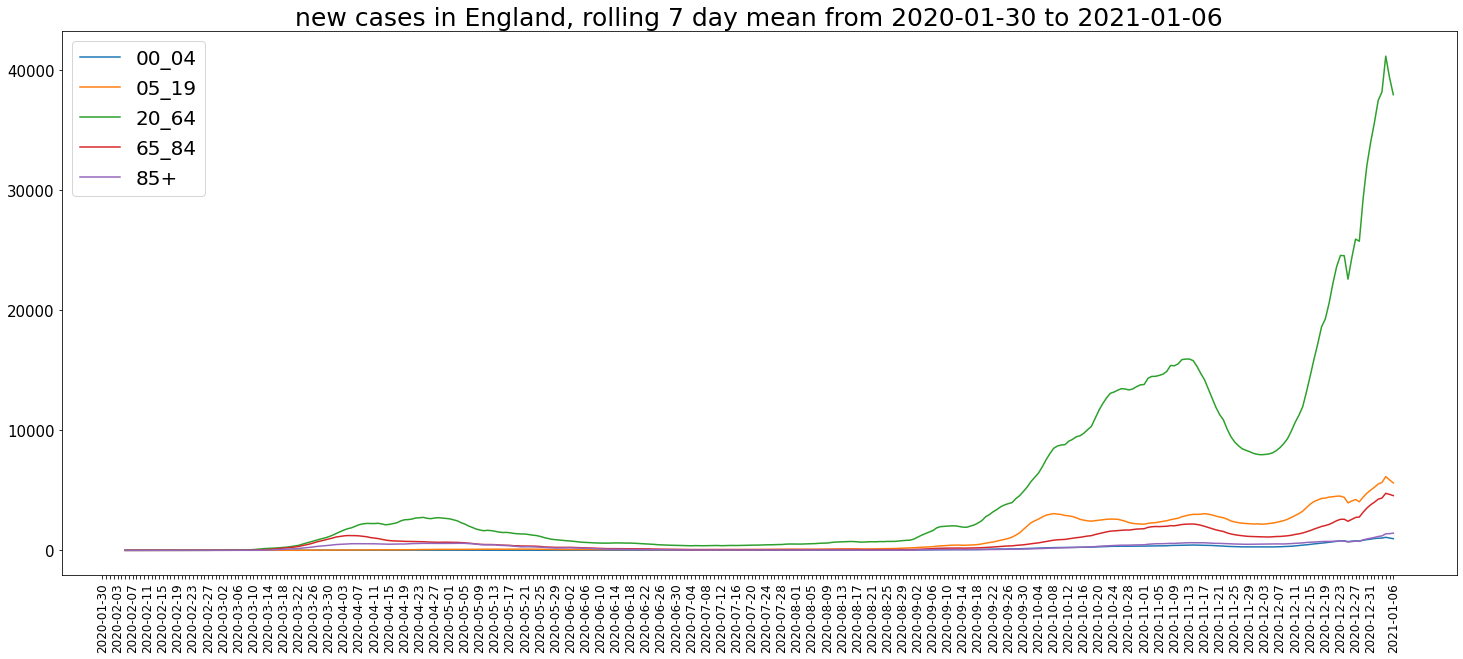

In [90]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [91]:
columns = ['00_04_rolling7','05_19_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

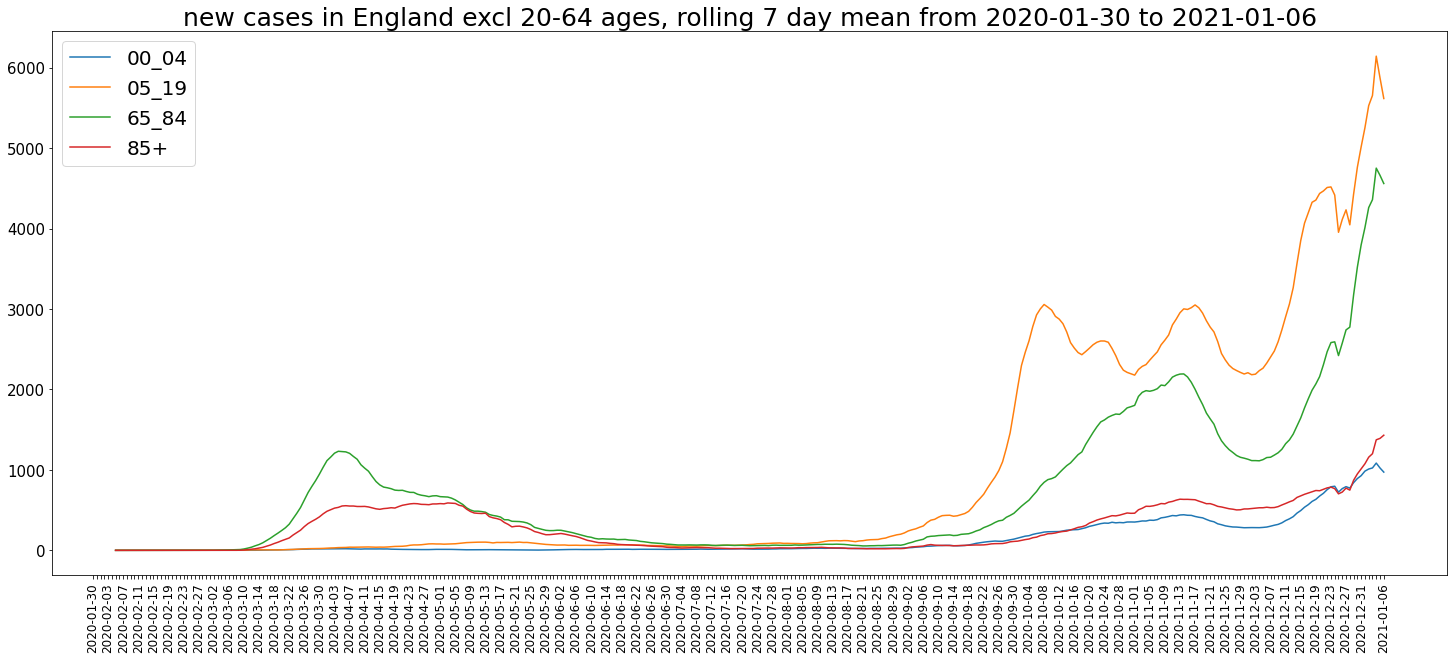

In [92]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England excl 20-64 ages, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [93]:
columns = ['0_to_5_newrolling7','6_to_17_newrolling7','18_to_64_newrolling7',
            '65_to_84_newrolling7','85+_newrolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

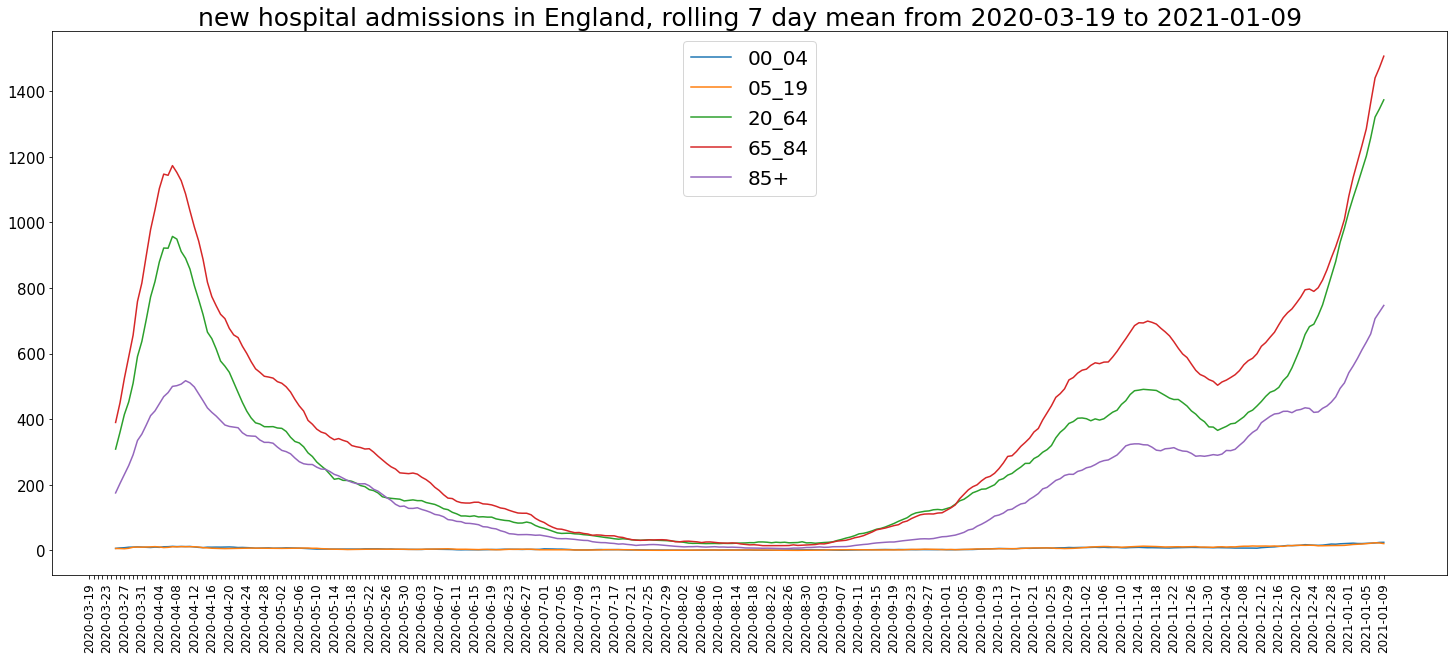

In [94]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'new hospital admissions in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [95]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

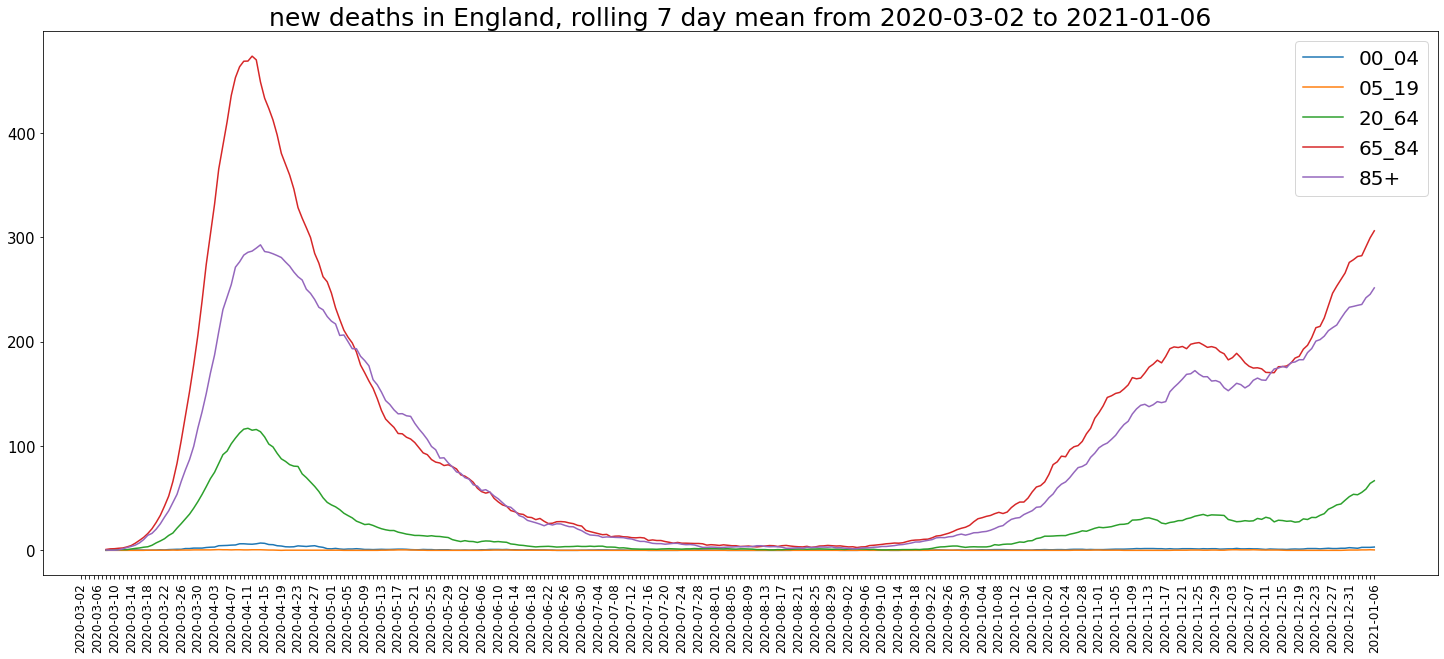

In [96]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [97]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

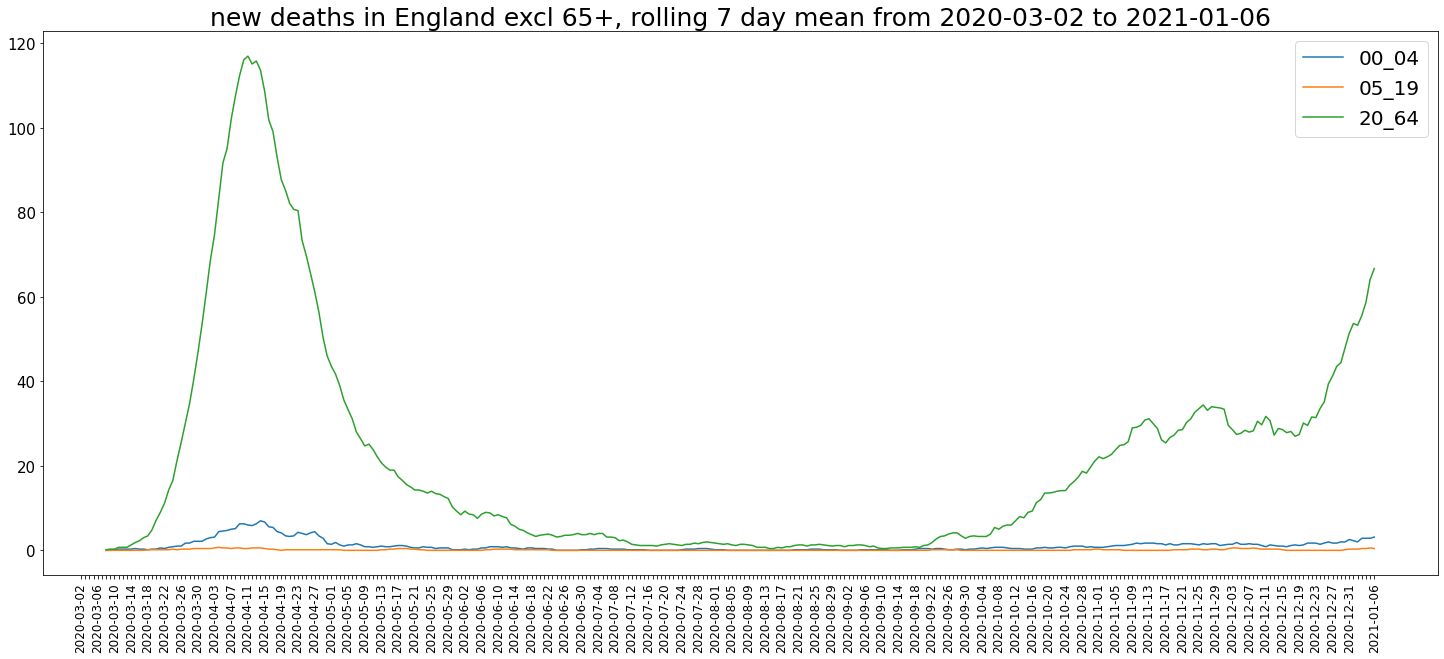

In [98]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England excl 65+, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [99]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

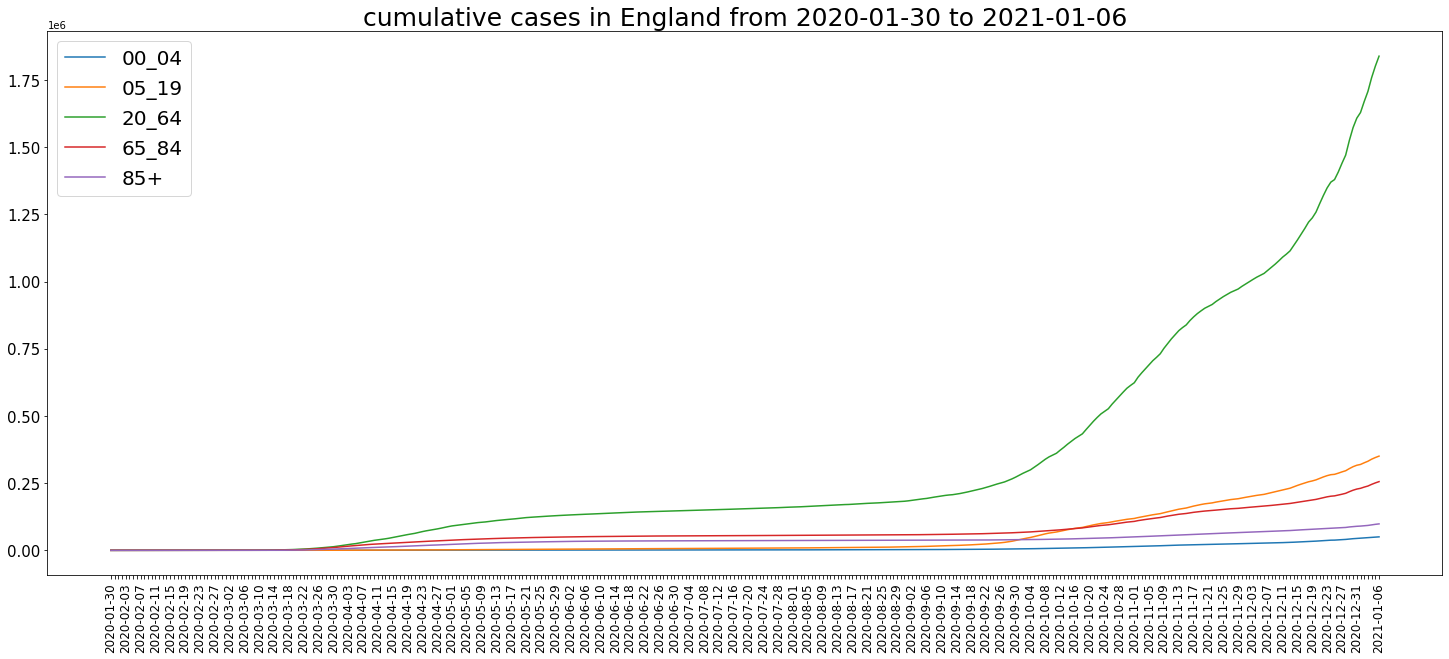

In [100]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [101]:
columns = ['00_04_cumsum','05_19_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

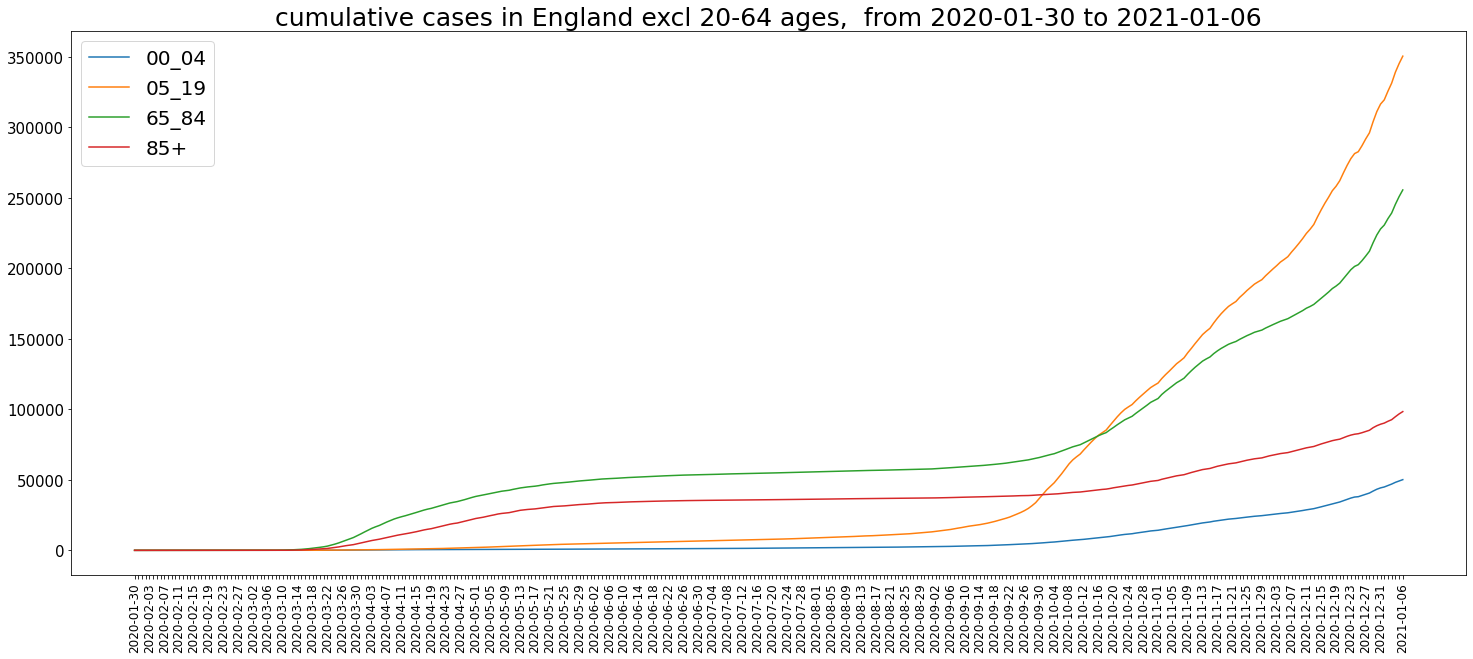

In [102]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England excl 20-64 ages,  from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [103]:
columns = ['0_to_5_newcumsum','6_to_17_newcumsum','18_to_64_newcumsum',
            '65_to_84_newcumsum','85+_newcumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

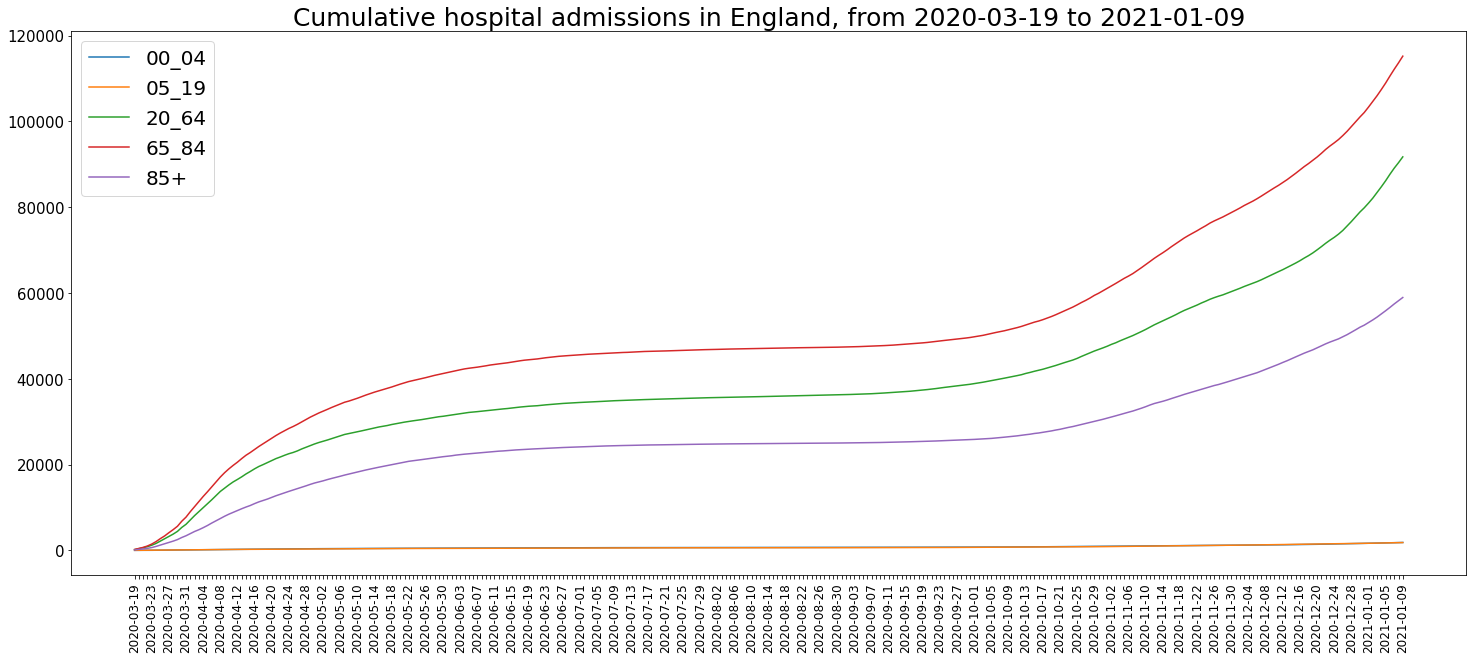

In [104]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'Cumulative hospital admissions in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [105]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

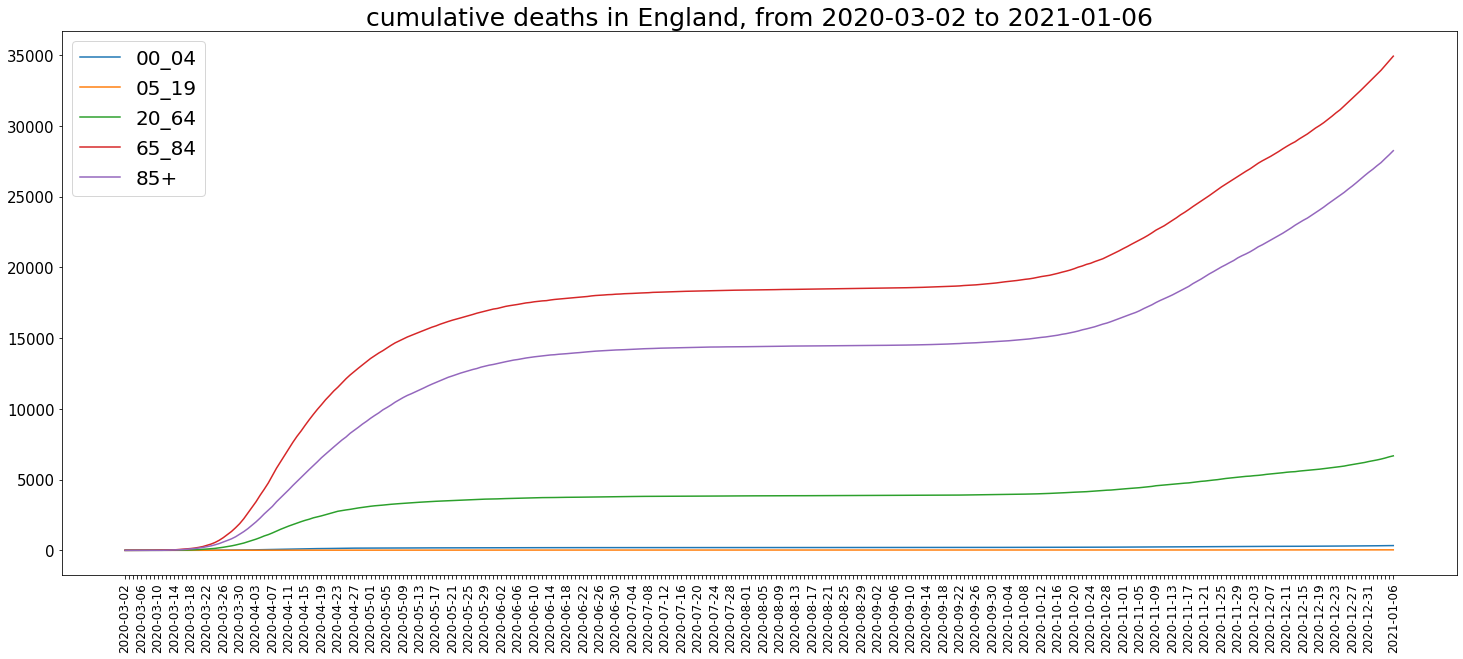

In [106]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [107]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

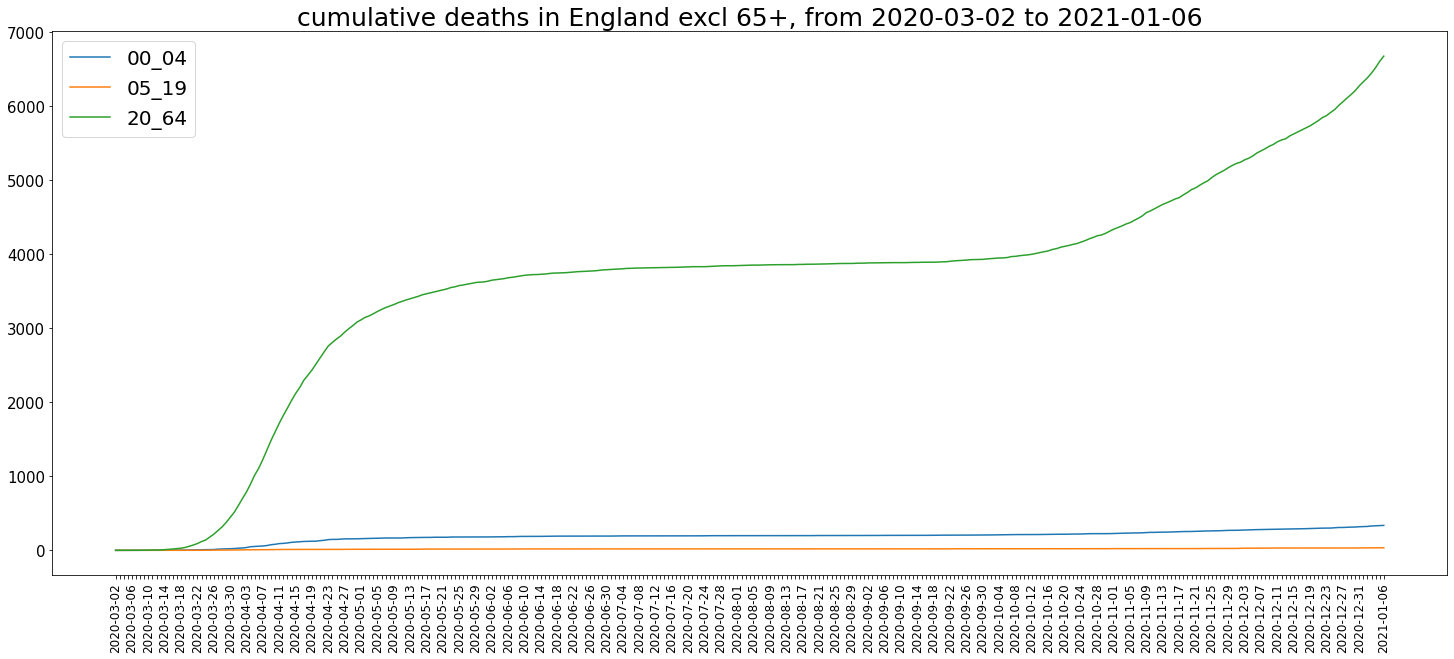

In [108]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England excl 65+, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [109]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the UK by Age (Deaths is always a couple of weeks old): Cases and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [110]:
df_casesAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7546 entries, 0 to 7545
Data columns (total 9 columns):
date           7546 non-null object
areaType       7546 non-null object
areaCode       7546 non-null object
areaName       7546 non-null object
metric         7546 non-null object
age            7546 non-null object
cases          7546 non-null int64
rollingRate    7203 non-null float64
rollingSum     7546 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 530.7+ KB


In [111]:
df_casesAge.drop_duplicates(inplace=True)
df_casesAge.reset_index(drop=True)

,date,areaType,areaCode,areaName,metric,age,cases,rollingRate,rollingSum
0,2020-01-30,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,00_04,0,0.0,0
1,2020-01-30,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,unassigned,0,NaN,0
2,2020-01-30,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,90+,0,0.0,0
3,2020-01-30,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,85_89,0,0.0,0
4,2020-01-30,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,80_84,0,0.0,0
...,...,...,...,...,...,...,...,...,...
7541,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,unassigned,42,NaN,492
7542,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,60+,9044,373.2,60192
7543,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,00_59,41030,580.3,294040
7544,2021-01-06,overview,K02000001,United Kingdom,newCasesBySpecimenDateAgeDemographics,55_59,3634,580.7,25586


In [112]:
# making the age values the column headers
# make a new dataframe

dates = df_casesAge['date'].tolist()
dates = list(set(dates))

df_casesAge_Summary = pd.DataFrame(dates, columns = ['date'])
df_casesAge_Summary.sort_values('date', inplace = True)
df_casesAge_Summary.reset_index(drop=True, inplace=True)


In [113]:
df_casesAge_Summary.head()

,date
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [114]:
# create the column headers and associated case numbers

headers = df_casesAge['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_casesAge[df_casesAge['age'] == headers[i]]['cases'].tolist()
    df_casesAge_Summary[headers[i]] = listOfValues


In [115]:
df_casesAge_Summary.tail(10)

,date,00_04,unassigned,90+,85_89,80_84,75_79,70_74,65_69,60_64,60+,55_59,45_49,40_44,35_39,30_34,25_29,20_24,15_19,10_14,50_54,05_09,00_59
333,2020-12-28,805,86,420,468,593,648,945,1251,2084,6409,2895,3337,3470,3643,4073,3969,3522,2080,1368,3441,858,33547
334,2020-12-29,1411,76,973,871,1033,1189,1636,2226,3792,11720,5393,5786,6121,6632,7272,7615,6419,3870,2522,5979,1591,60687
335,2020-12-30,1290,62,645,751,873,1095,1485,2022,3321,10192,4550,5006,5141,5783,6265,6525,5780,3469,2147,5088,1485,52591
336,2020-12-31,965,49,466,596,662,837,1211,1531,2392,7695,3474,3681,3831,4278,4689,4671,4062,2621,1603,3910,1097,38931
337,2021-01-01,638,9,377,412,483,556,757,943,1568,5096,2153,2227,2378,2518,2730,2745,2307,1423,907,2372,660,23067
338,2021-01-02,1057,63,610,685,795,889,1238,1675,2728,8620,3930,4347,4481,4949,5380,5477,5066,3139,1759,4522,1289,45459
339,2021-01-03,1003,63,573,560,692,793,1091,1362,2423,7494,3433,3954,4081,4443,5052,5359,4955,2885,1621,3844,1181,41874
340,2021-01-04,1229,180,1030,1068,1113,1248,1692,2128,3571,11850,4828,5368,5344,5945,6642,7244,6831,3944,2203,5519,1581,56858
341,2021-01-05,982,86,984,984,1120,1129,1463,1742,2971,10393,4134,4271,4278,4818,5573,6135,5908,3306,1643,4546,1141,46821
342,2021-01-06,933,42,836,835,943,1023,1248,1551,2608,9044,3634,3733,3750,4460,4901,5331,5016,2783,1495,3922,1030,41030


In [116]:
#df_casesAge_Summary['date'] = df_casesAge_Summary['datetime'].dt.strftime('%d-%m-%Y')

In [117]:
# creat new columns

nursery = ['00_04']
school = ['15_19','10_14','05_09']
university = ['20_24']
working = ['55_59', '50_54','45_49','40_44','35_39','30_34','25_29']
sixties = ['60_64','65_69']
seventies = ['70_74','75_79']
eighties = ['80_84','85_89']
nineties = ['90+']


In [118]:
create_new_columns(df_casesAge_Summary,nursery,'nursery')
create_new_columns(df_casesAge_Summary,school,'school')
create_new_columns(df_casesAge_Summary,university,'university')
create_new_columns(df_casesAge_Summary,working,'working')
create_new_columns(df_casesAge_Summary,sixties,'sixties')
create_new_columns(df_casesAge_Summary,seventies,'seventies')
create_new_columns(df_casesAge_Summary,eighties,'eighties')
create_new_columns(df_casesAge_Summary,nineties,'nineties')


In [119]:
# add rolling 7 day columns

columns_rolling = ['nursery','school','university','working',
                   'sixties','seventies','eighties','nineties']


In [120]:
for i in range(len(columns_rolling)):
    df_casesAge_Summary[columns_rolling[i] + '_roll'] = df_casesAge_Summary[columns_rolling[i]].rolling(7).mean()

In [121]:
df_casesAge_Summary.tail(10)

,date,00_04,unassigned,90+,85_89,80_84,75_79,70_74,65_69,60_64,60+,55_59,45_49,40_44,35_39,30_34,25_29,20_24,15_19,10_14,50_54,05_09,00_59,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_roll,school_roll,university_roll,working_roll,sixties_roll,seventies_roll,eighties_roll,nineties_roll
333,2020-12-28,805,86,420,468,593,648,945,1251,2084,6409,2895,3337,3470,3643,4073,3969,3522,2080,1368,3441,858,33547,805,4306,3522,24828,3335,1593,1061,420,773.714286,4045.857143,2893.714286,21197.285714,2652.000000,1300.857143,869.571429,358.428571
334,2020-12-29,1411,76,973,871,1033,1189,1636,2226,3792,11720,5393,5786,6121,6632,7272,7615,6419,3870,2522,5979,1591,60687,1411,7983,6419,44798,6018,2825,1904,973,841.142857,4426.857143,3309.714286,24041.857143,3076.857143,1482.428571,988.714286,426.428571
335,2020-12-30,1290,62,645,751,873,1095,1485,2022,3321,10192,4550,5006,5141,5783,6265,6525,5780,3469,2147,5088,1485,52591,1290,7101,5780,38358,5343,2580,1624,645,892.428571,4762.142857,3675.142857,26220.142857,3444.000000,1649.285714,1080.857143,457.714286
336,2020-12-31,965,49,466,596,662,837,1211,1531,2392,7695,3474,3681,3831,4278,4689,4671,4062,2621,1603,3910,1097,38931,965,5321,4062,28534,3923,2048,1258,466,928.000000,5015.000000,3917.714286,27760.142857,3693.000000,1787.142857,1154.428571,484.285714
337,2021-01-01,638,9,377,412,483,556,757,943,1568,5096,2153,2227,2378,2518,2730,2745,2307,1423,907,2372,660,23067,638,2990,2307,17123,2511,1313,895,377,984.428571,5251.714286,4115.571429,29077.428571,3899.571429,1887.142857,1222.714286,514.714286
338,2021-01-02,1057,63,610,685,795,889,1238,1675,2728,8620,3930,4347,4481,4949,5380,5477,5066,3139,1759,4522,1289,45459,1057,6187,5066,33086,4403,2127,1480,610,1010.714286,5527.571429,4411.857143,30495.428571,4123.857143,2000.428571,1311.285714,554.571429
339,2021-01-03,1003,63,573,560,692,793,1091,1362,2423,7494,3433,3954,4081,4443,5052,5359,4955,2885,1621,3844,1181,41874,1003,5687,4955,30166,3785,1884,1252,573,1024.142857,5653.571429,4587.285714,30984.714286,4188.285714,2052.857143,1353.428571,580.571429
340,2021-01-04,1229,180,1030,1068,1113,1248,1692,2128,3571,11850,4828,5368,5344,5945,6642,7244,6831,3944,2203,5519,1581,56858,1229,7728,6831,40890,5699,2940,2181,1030,1084.714286,6142.428571,5060.000000,33279.285714,4526.000000,2245.285714,1513.428571,667.714286
341,2021-01-05,982,86,984,984,1120,1129,1463,1742,2971,10393,4134,4271,4278,4818,5573,6135,5908,3306,1643,4546,1141,46821,982,6090,5908,33755,4713,2592,2104,984,1023.428571,5872.000000,4987.000000,31701.714286,4339.571429,2212.000000,1542.000000,669.285714
342,2021-01-06,933,42,836,835,943,1023,1248,1551,2608,9044,3634,3733,3750,4460,4901,5331,5016,2783,1495,3922,1030,41030,933,5308,5016,29731,4159,2271,1778,836,972.428571,5615.857143,4877.857143,30469.285714,4170.428571,2167.857143,1564.000000,696.571429


In [122]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 'working_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

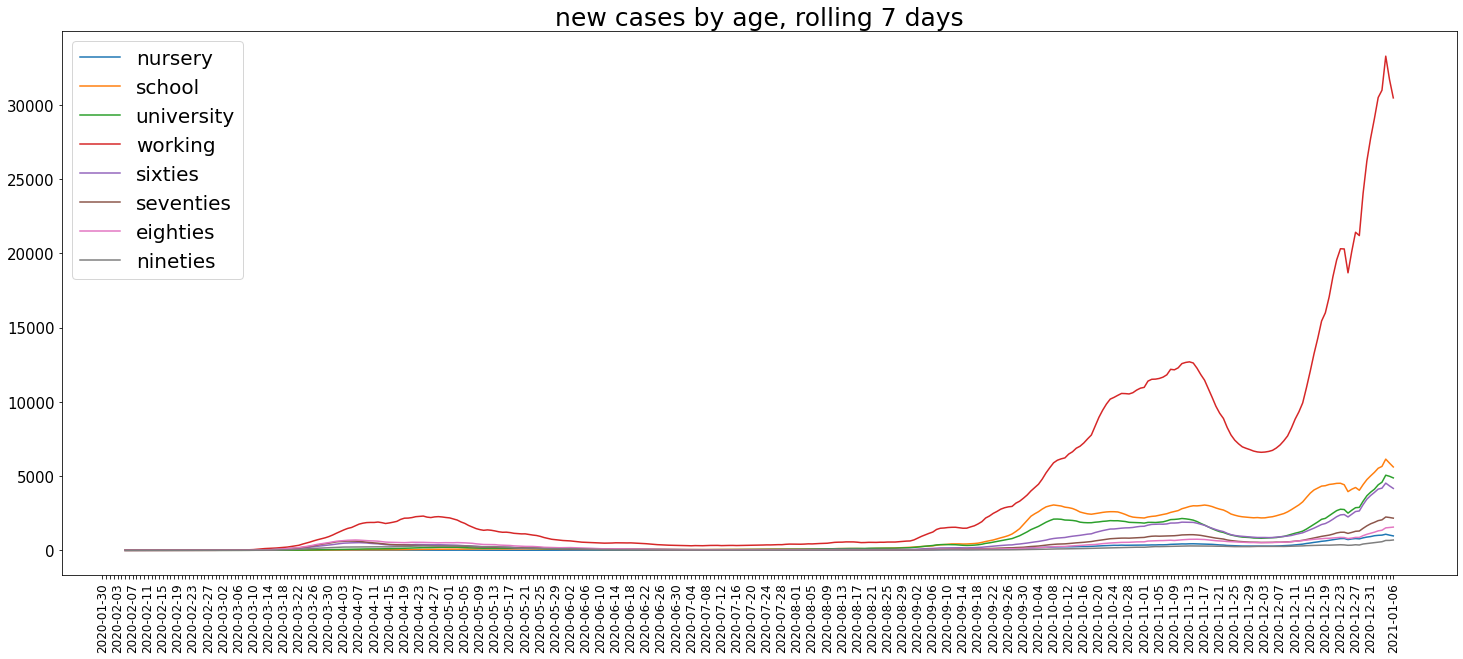

In [123]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [124]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 
                'sixties', 'seventies', 'eighties', 'nineties']

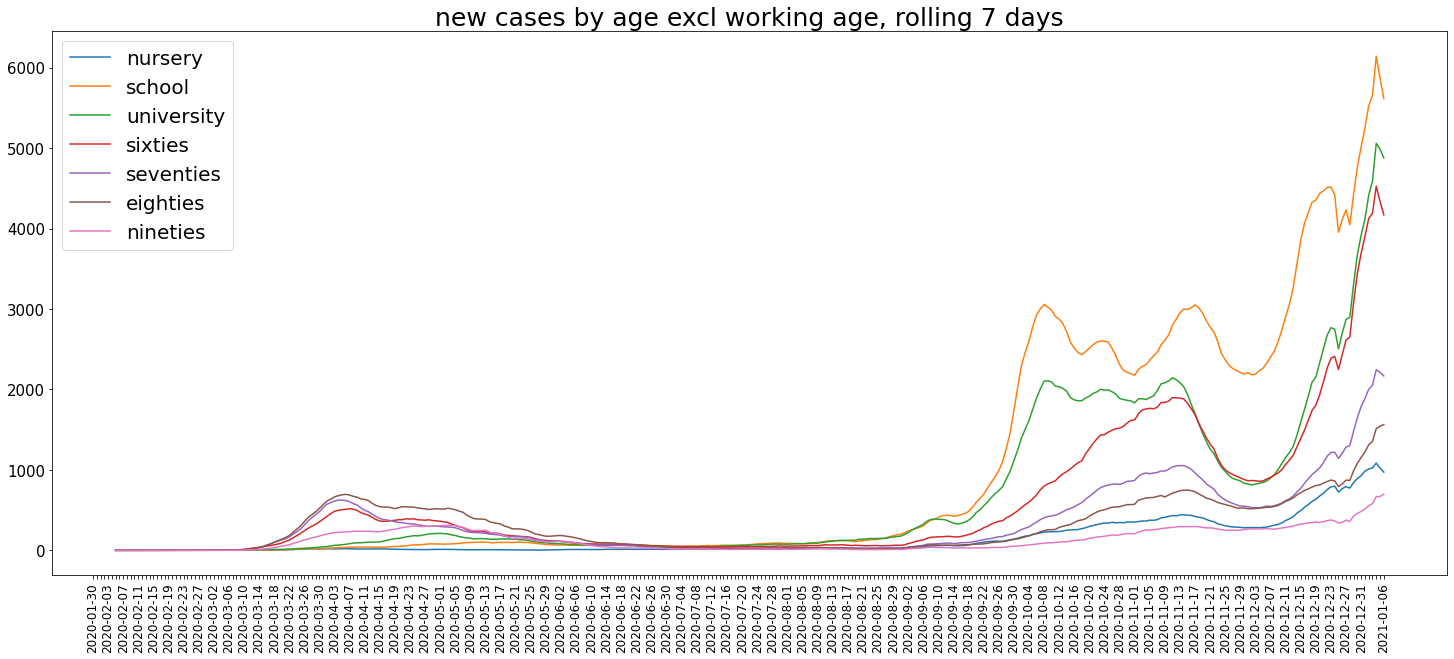

In [125]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age excl working age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [126]:
# looking at deaths by ages

df_deathsAges.head()

,age,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27,2020-04-03,2020-04-10,2020-04-17,2020-04-24,2020-05-01,2020-05-08,2020-05-15,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02,2020-10-09,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,2020-12-18,2020-12-25
0,<1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,15-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [127]:
df_deathsAges.set_index('age', inplace=True)
df_deathsAges = df_deathsAges.T
df_deathsAges.reset_index(inplace=True)
df_deathsAges.rename(columns={"index": "date"}, inplace=True)
df_deathsAges.columns.name=''

In [128]:
df_deathsAges.head()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+
0,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [129]:
df_deathsAges.tail()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+
47,2020-11-27,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,9.0,9.0,26.0,40.0,68.0,116.0,160.0,314.0,435.0,559.0,612.0,665.0
48,2020-12-04,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,16.0,18.0,35.0,65.0,106.0,178.0,280.0,431.0,519.0,603.0,631.0
49,2020-12-11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,8.0,9.0,23.0,37.0,69.0,125.0,159.0,235.0,403.0,492.0,586.0,646.0
50,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,20.0,40.0,73.0,103.0,164.0,261.0,394.0,598.0,632.0,721.0
51,2020-12-25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,16.0,28.0,48.0,77.0,120.0,214.0,271.0,386.0,446.0,458.0


In [130]:
last_date = df_deathsAges['date'].iloc[-1]

In [131]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [132]:
create_new_columns(df_deathsAges,nursery,'nursery')
create_new_columns(df_deathsAges,school,'school')
create_new_columns(df_deathsAges,university,'university')
create_new_columns(df_deathsAges,working,'working')
create_new_columns(df_deathsAges,sixties,'sixties')
create_new_columns(df_deathsAges,seventies,'seventies')
create_new_columns(df_deathsAges,eighties,'eighties')
create_new_columns(df_deathsAges,nineties,'nineties')

In [133]:
columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

In [134]:
return3 = 'new deaths by age, weekly to 2020-12-11'

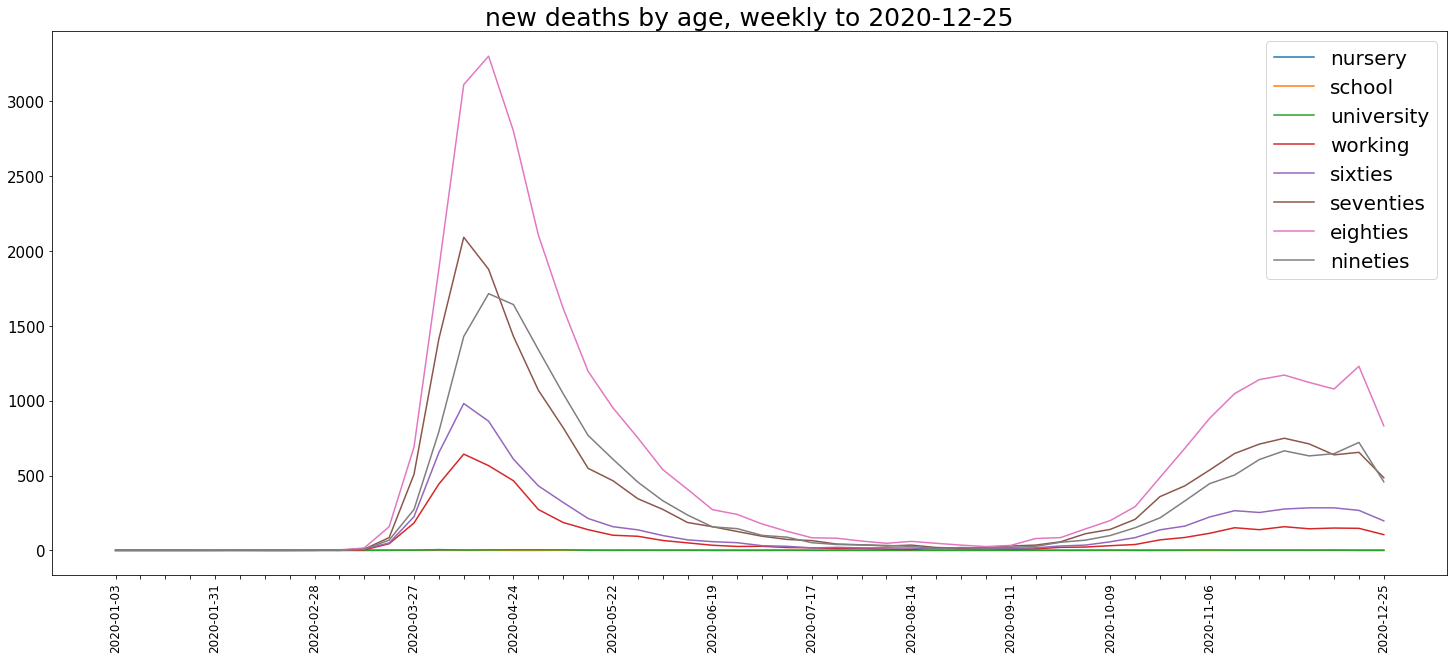

In [135]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [136]:
columns = ['nursery','school','university','working',
           'sixties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

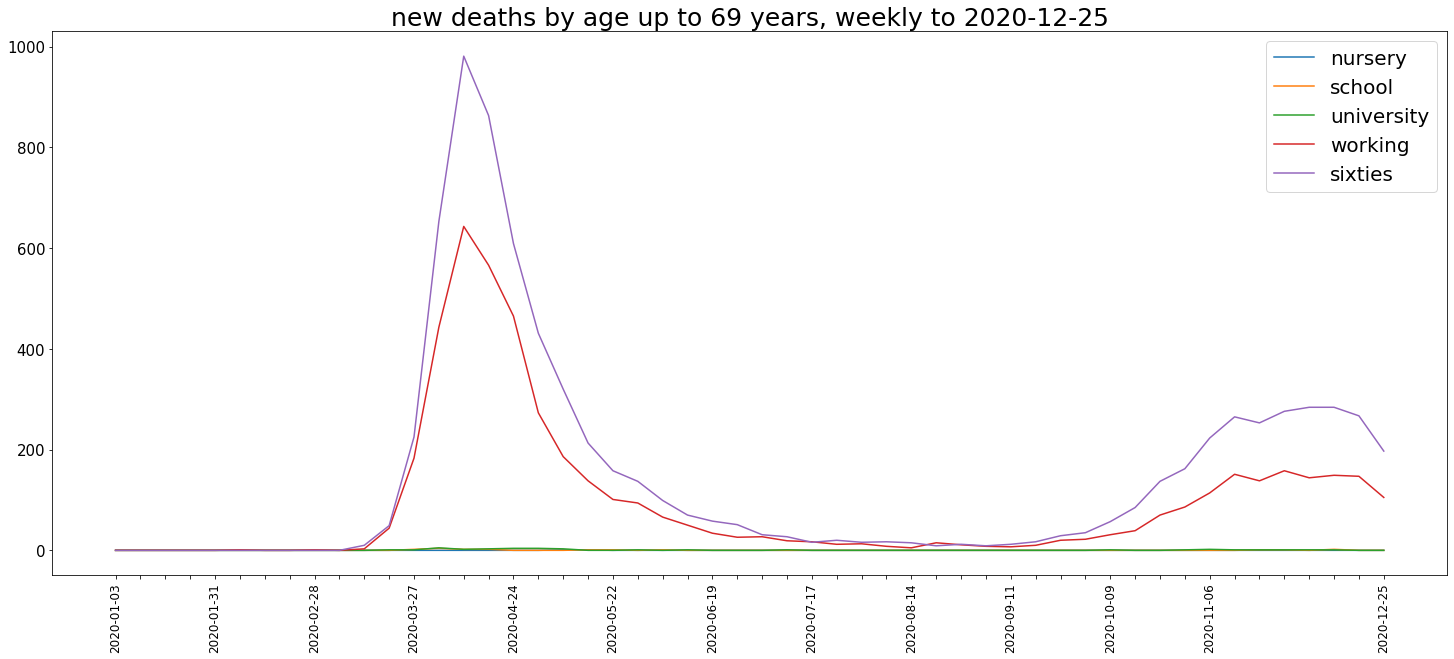

In [137]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [138]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges[columns[i] + '_cum'] = df_deathsAges[columns[i]].cumsum()

In [139]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum','seventies_cum','eighties_cum','nineties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

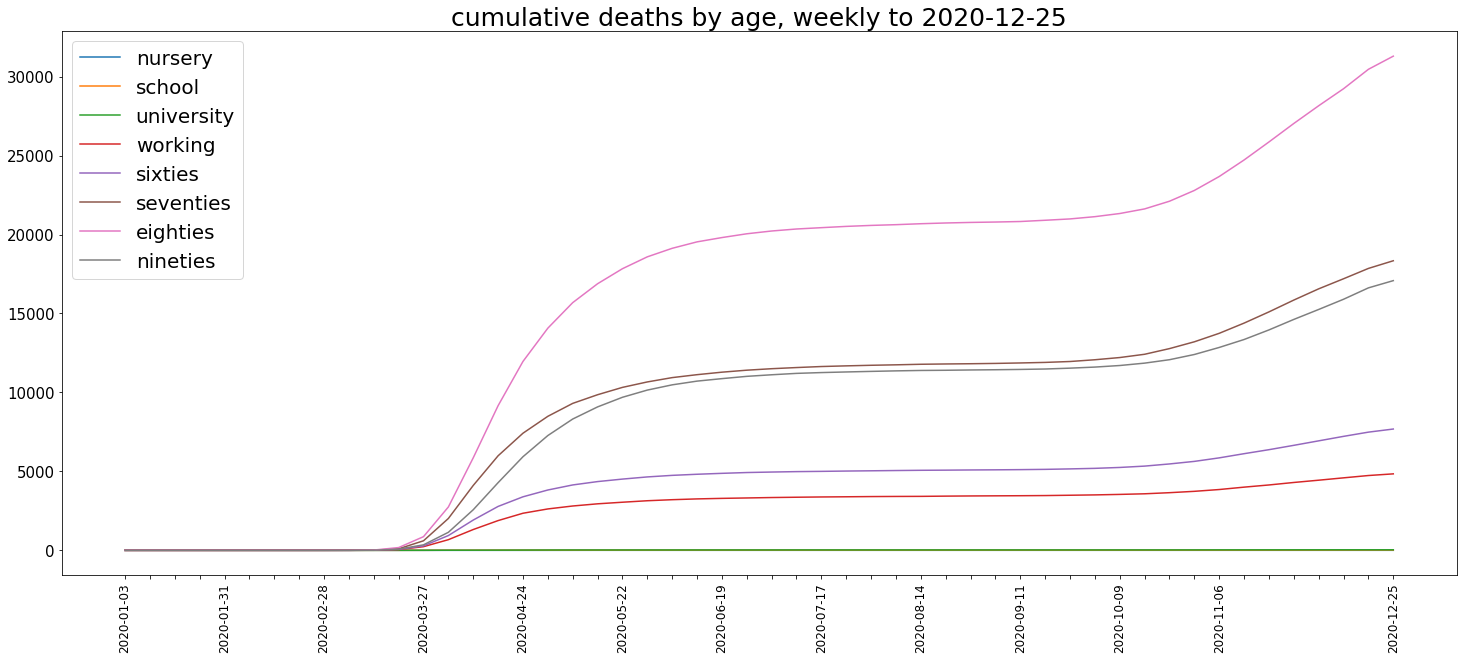

In [140]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [141]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

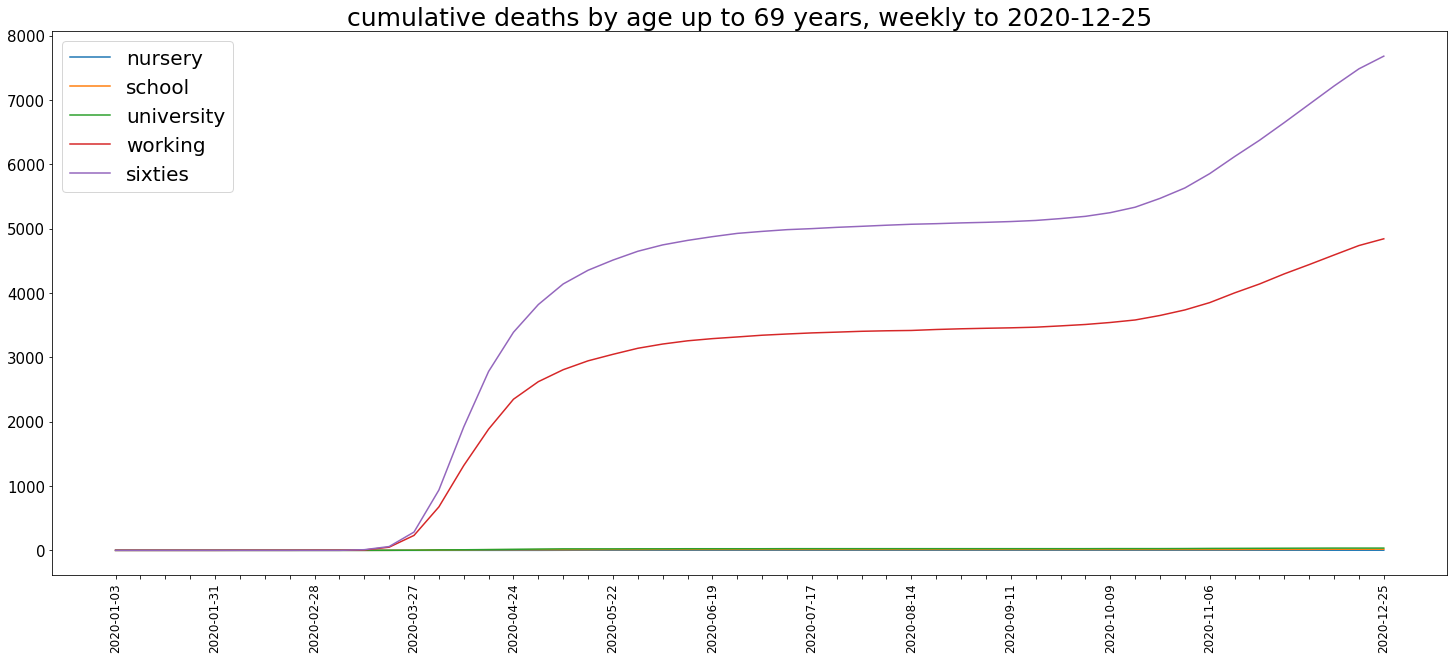

In [142]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [143]:
columns = ['nursery_cum','school_cum','university_cum']
chart_titles = ['nursery', 'school', 'university']

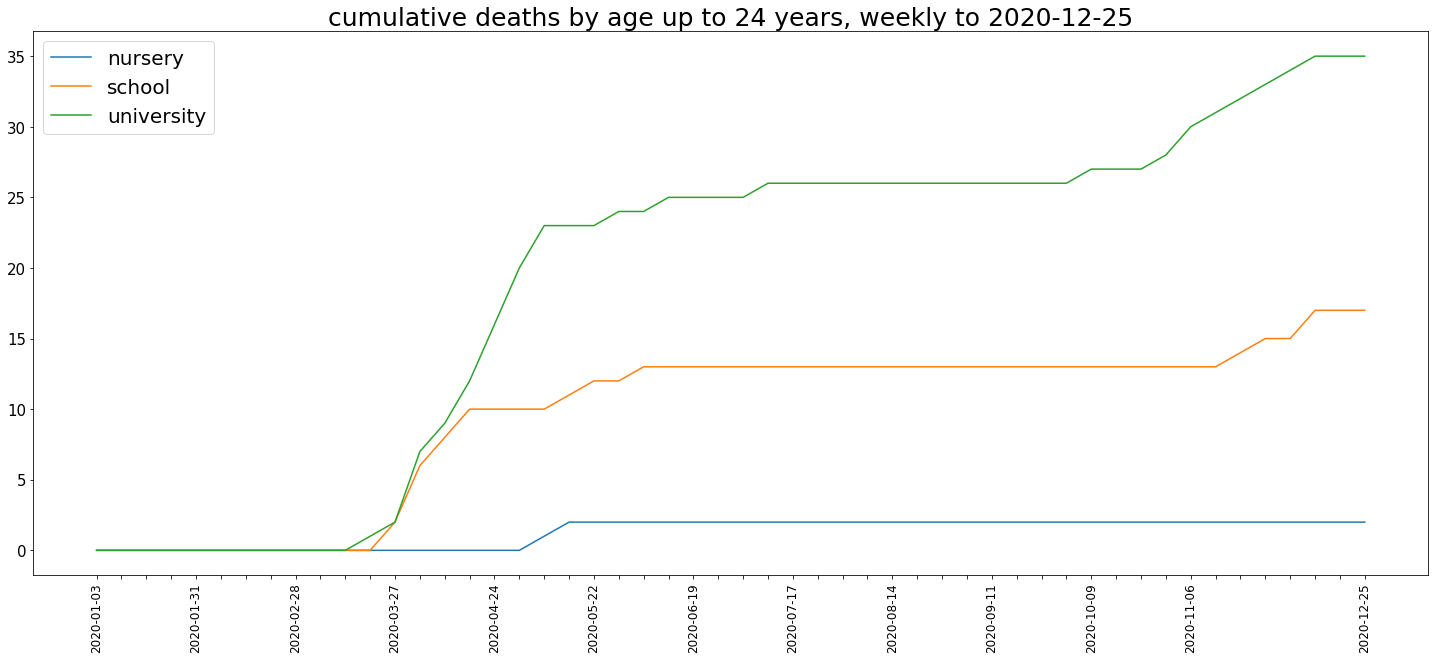

In [144]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 24 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [145]:
df_deathsAges.tail()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_cum,school_cum,university_cum,working_cum,sixties_cum,seventies_cum,eighties_cum,nineties_cum
47,2020-11-27,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,9.0,9.0,26.0,40.0,68.0,116.0,160.0,314.0,435.0,559.0,612.0,665.0,0.0,1.0,1.0,158.0,276.0,749.0,1171.0,665.0,2.0,15.0,33.0,4298.0,6650.0,15849.0,27032.0,14623.0
48,2020-12-04,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,16.0,18.0,35.0,65.0,106.0,178.0,280.0,431.0,519.0,603.0,631.0,0.0,0.0,1.0,144.0,284.0,711.0,1122.0,631.0,2.0,15.0,34.0,4442.0,6934.0,16560.0,28154.0,15254.0
49,2020-12-11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,8.0,9.0,23.0,37.0,69.0,125.0,159.0,235.0,403.0,492.0,586.0,646.0,0.0,2.0,1.0,149.0,284.0,638.0,1078.0,646.0,2.0,17.0,35.0,4591.0,7218.0,17198.0,29232.0,15900.0
50,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,20.0,40.0,73.0,103.0,164.0,261.0,394.0,598.0,632.0,721.0,0.0,0.0,0.0,147.0,267.0,655.0,1230.0,721.0,2.0,17.0,35.0,4738.0,7485.0,17853.0,30462.0,16621.0
51,2020-12-25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,16.0,28.0,48.0,77.0,120.0,214.0,271.0,386.0,446.0,458.0,0.0,0.0,0.0,105.0,197.0,485.0,832.0,458.0,2.0,17.0,35.0,4843.0,7682.0,18338.0,31294.0,17079.0


In [146]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at all deaths and covid deaths by age (always a couple of weeks behind)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [147]:
df_deathsAges_all.head()

,age,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27,2020-04-03,2020-04-10,2020-04-17,2020-04-24,2020-05-01,2020-05-08,2020-05-15,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02,2020-10-09,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,2020-12-18,2020-12-25
0,<1,48.0,50.0,69.0,53.0,50.0,30.0,43.0,51.0,49.0,56.0,53.0,44.0,49.0,51.0,38.0,51.0,54.0,48.0,28.0,56.0,51.0,40.0,44.0,44.0,48.0,47.0,47.0,58.0,35.0,49.0,45.0,44.0,50.0,49.0,38.0,29.0,39.0,36.0,45.0,47.0,45.0,41.0,34.0,31.0,43.0,45.0,54.0,44.0,50.0,45.0,46.0,33.0
1,1-4,8.0,9.0,7.0,9.0,6.0,8.0,6.0,5.0,7.0,11.0,13.0,2.0,8.0,8.0,6.0,6.0,6.0,8.0,6.0,10.0,4.0,6.0,4.0,4.0,10.0,4.0,7.0,3.0,6.0,3.0,11.0,4.0,5.0,7.0,5.0,3.0,6.0,4.0,7.0,3.0,6.0,6.0,2.0,6.0,6.0,8.0,11.0,7.0,4.0,3.0,5.0,7.0
2,5-9,4.0,8.0,5.0,4.0,5.0,4.0,2.0,6.0,6.0,2.0,3.0,6.0,1.0,5.0,4.0,5.0,3.0,0.0,4.0,5.0,5.0,3.0,4.0,2.0,5.0,4.0,2.0,2.0,4.0,5.0,5.0,5.0,2.0,4.0,7.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,7.0,2.0,2.0,7.0,6.0,5.0,3.0,11.0,4.0,5.0
3,10-14,4.0,9.0,4.0,8.0,4.0,4.0,4.0,7.0,7.0,7.0,6.0,4.0,4.0,8.0,4.0,4.0,3.0,3.0,10.0,4.0,7.0,5.0,8.0,5.0,4.0,3.0,4.0,5.0,0.0,4.0,3.0,6.0,8.0,5.0,6.0,5.0,3.0,7.0,7.0,10.0,6.0,3.0,5.0,5.0,4.0,3.0,4.0,5.0,8.0,6.0,5.0,6.0
4,15-19,6.0,16.0,10.0,15.0,23.0,10.0,16.0,20.0,24.0,21.0,18.0,15.0,12.0,9.0,8.0,20.0,11.0,14.0,9.0,13.0,13.0,7.0,10.0,10.0,9.0,2.0,14.0,11.0,10.0,9.0,12.0,13.0,12.0,14.0,14.0,7.0,15.0,15.0,13.0,12.0,12.0,15.0,14.0,15.0,12.0,7.0,17.0,18.0,15.0,8.0,11.0,10.0


In [148]:
df_deathsAges_all.set_index('age', inplace=True)
df_deathsAges_all = df_deathsAges_all.T
df_deathsAges_all.reset_index(inplace=True)
df_deathsAges_all.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all.columns.name=''

In [149]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [150]:
create_new_columns(df_deathsAges_all,nursery,'nursery')
create_new_columns(df_deathsAges_all,school,'school')
create_new_columns(df_deathsAges_all,university,'university')
create_new_columns(df_deathsAges_all,working,'working')
create_new_columns(df_deathsAges_all,sixties,'sixties')
create_new_columns(df_deathsAges_all,seventies,'seventies')
create_new_columns(df_deathsAges_all,eighties,'eighties')
create_new_columns(df_deathsAges_all,nineties,'nineties')

In [151]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges_all[columns[i] + '_cum'] = df_deathsAges_all[columns[i]].cumsum()

In [152]:
df_deathsAges_all.columns += '_all'
df_deathsAges_all.columns.values[0] = 'date'

In [153]:
df_deathsAges_all.head()

,date,<1_all,1-4_all,5-9_all,10-14_all,15-19_all,20-24_all,25-29_all,30-34_all,35-39_all,40-44_all,45-49_all,50-54_all,55-59_all,60-64_all,65-69_all,70-74_all,75-79_all,80-84_all,85-89_all,90+_all,nursery_all,school_all,university_all,working_all,sixties_all,seventies_all,eighties_all,nineties_all,nursery_cum_all,school_cum_all,university_cum_all,working_cum_all,sixties_cum_all,seventies_cum_all,eighties_cum_all,nineties_cum_all
0,2020-01-03,48.0,8.0,4.0,4.0,6.0,11.0,17.0,32.0,54.0,69.0,115.0,239.0,361.0,486.0,696.0,1164.0,1535.0,2049.0,2457.0,2898.0,56.0,14.0,11.0,887.0,1182.0,2699.0,4506.0,2898.0,56.0,14.0,11.0,887.0,1182.0,2699.0,4506.0,2898.0
1,2020-01-10,50.0,9.0,8.0,9.0,16.0,23.0,37.0,46.0,68.0,85.0,191.0,279.0,426.0,604.0,857.0,1341.0,1724.0,2290.0,2697.0,3297.0,59.0,33.0,23.0,1132.0,1461.0,3065.0,4987.0,3297.0,115.0,47.0,34.0,2019.0,2643.0,5764.0,9493.0,6195.0
2,2020-01-17,69.0,7.0,5.0,4.0,10.0,25.0,37.0,47.0,77.0,118.0,189.0,306.0,461.0,562.0,803.0,1210.0,1612.0,2103.0,2421.0,2924.0,76.0,19.0,25.0,1235.0,1365.0,2822.0,4524.0,2924.0,191.0,66.0,59.0,3254.0,4008.0,8586.0,14017.0,9119.0
3,2020-01-24,53.0,9.0,4.0,8.0,15.0,30.0,36.0,38.0,79.0,116.0,160.0,280.0,381.0,535.0,791.0,1167.0,1474.0,1863.0,2188.0,2626.0,62.0,27.0,30.0,1090.0,1326.0,2641.0,4051.0,2626.0,253.0,93.0,89.0,4344.0,5334.0,11227.0,18068.0,11745.0
4,2020-01-31,50.0,6.0,5.0,4.0,23.0,23.0,28.0,58.0,76.0,100.0,163.0,278.0,382.0,525.0,732.0,1196.0,1445.0,1811.0,2124.0,2583.0,56.0,32.0,23.0,1085.0,1257.0,2641.0,3935.0,2583.0,309.0,125.0,112.0,5429.0,6591.0,13868.0,22003.0,14328.0


In [154]:
df_deathsAges.head()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_cum,school_cum,university_cum,working_cum,sixties_cum,seventies_cum,eighties_cum,nineties_cum
0,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
df_deaths_comp = pd.merge(df_deathsAges, df_deathsAges_all, left_on='date', right_on='date', how='left')

In [156]:
df_deaths_comp.tail()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_cum,school_cum,university_cum,working_cum,sixties_cum,seventies_cum,eighties_cum,nineties_cum,<1_all,1-4_all,5-9_all,10-14_all,15-19_all,20-24_all,25-29_all,30-34_all,35-39_all,40-44_all,45-49_all,50-54_all,55-59_all,60-64_all,65-69_all,70-74_all,75-79_all,80-84_all,85-89_all,90+_all,nursery_all,school_all,university_all,working_all,sixties_all,seventies_all,eighties_all,nineties_all,nursery_cum_all,school_cum_all,university_cum_all,working_cum_all,sixties_cum_all,seventies_cum_all,eighties_cum_all,nineties_cum_all
47,2020-11-27,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,9.0,9.0,26.0,40.0,68.0,116.0,160.0,314.0,435.0,559.0,612.0,665.0,0.0,1.0,1.0,158.0,276.0,749.0,1171.0,665.0,2.0,15.0,33.0,4298.0,6650.0,15849.0,27032.0,14623.0,44.0,7.0,5.0,5.0,18.0,33.0,41.0,58.0,99.0,101.0,207.0,328.0,416.0,602.0,757.0,1242.0,1562.0,1999.0,2289.0,2643.0,51.0,28.0,33.0,1250.0,1359.0,2804.0,4288.0,2643.0,2500.0,1066.0,1087.0,52971.0,60457.0,125312.0,191441.0,120076.0
48,2020-12-04,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,16.0,18.0,35.0,65.0,106.0,178.0,280.0,431.0,519.0,603.0,631.0,0.0,0.0,1.0,144.0,284.0,711.0,1122.0,631.0,2.0,15.0,34.0,4442.0,6934.0,16560.0,28154.0,15254.0,50.0,4.0,3.0,8.0,15.0,27.0,42.0,50.0,88.0,117.0,200.0,293.0,468.0,568.0,792.0,1236.0,1528.0,1975.0,2237.0,2602.0,54.0,26.0,27.0,1258.0,1360.0,2764.0,4212.0,2602.0,2554.0,1092.0,1114.0,54229.0,61817.0,128076.0,195653.0,122678.0
49,2020-12-11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,8.0,9.0,23.0,37.0,69.0,125.0,159.0,235.0,403.0,492.0,586.0,646.0,0.0,2.0,1.0,149.0,284.0,638.0,1078.0,646.0,2.0,17.0,35.0,4591.0,7218.0,17198.0,29232.0,15900.0,45.0,3.0,11.0,6.0,8.0,25.0,35.0,58.0,69.0,115.0,190.0,299.0,433.0,603.0,765.0,1230.0,1619.0,1989.0,2193.0,2596.0,48.0,25.0,25.0,1199.0,1368.0,2849.0,4182.0,2596.0,2602.0,1117.0,1139.0,55428.0,63185.0,130925.0,199835.0,125274.0
50,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,20.0,40.0,73.0,103.0,164.0,261.0,394.0,598.0,632.0,721.0,0.0,0.0,0.0,147.0,267.0,655.0,1230.0,721.0,2.0,17.0,35.0,4738.0,7485.0,17853.0,30462.0,16621.0,46.0,5.0,4.0,5.0,11.0,24.0,38.0,57.0,73.0,115.0,189.0,317.0,437.0,581.0,805.0,1246.0,1614.0,2124.0,2439.0,2881.0,51.0,20.0,24.0,1226.0,1386.0,2860.0,4563.0,2881.0,2653.0,1137.0,1163.0,56654.0,64571.0,133785.0,204398.0,128155.0
51,2020-12-25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,16.0,28.0,48.0,77.0,120.0,214.0,271.0,386.0,446.0,458.0,0.0,0.0,0.0,105.0,197.0,485.0,832.0,458.0,2.0,17.0,35.0,4843.0,7682.0,18338.0,31294.0,17079.0,33.0,7.0,5.0,6.0,10.0,21.0,35.0,46.0,70.0,99.0,179.0,262.0,359.0,515.0,729.0,1154.0,1436.0,1892.0,2154.0,2508.0,40.0,21.0,21.0,1050.0,1244.0,2590.0,4046.0,2508.0,2693.0,1158.0,1184.0,57704.0,65815.0,136375.0,208444.0,130663.0


In [157]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(col_names)):
    df_deaths_comp[str(col_names[i]) + '_%'] = (df_deaths_comp[str(col_names[i]) + '_cum']
                                                /df_deaths_comp[str(col_names[i]) + '_cum_all'])

In [158]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum_all' for s in col_names]

In [159]:
df_deaths_comp['total_cum_all'] = df_deaths_comp[col_names_new].sum(axis=1)

In [160]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum' for s in col_names]

In [161]:
df_deaths_comp['total_cum'] = df_deaths_comp[col_names_new].sum(axis=1)

In [162]:
df_deaths_comp.tail()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_cum,school_cum,university_cum,working_cum,sixties_cum,seventies_cum,eighties_cum,nineties_cum,<1_all,1-4_all,5-9_all,10-14_all,15-19_all,20-24_all,25-29_all,30-34_all,35-39_all,40-44_all,45-49_all,50-54_all,55-59_all,60-64_all,65-69_all,70-74_all,75-79_all,80-84_all,85-89_all,90+_all,nursery_all,school_all,university_all,working_all,sixties_all,seventies_all,eighties_all,nineties_all,nursery_cum_all,school_cum_all,university_cum_all,working_cum_all,sixties_cum_all,seventies_cum_all,eighties_cum_all,nineties_cum_all,nursery_%,school_%,university_%,working_%,sixties_%,seventies_%,eighties_%,nineties_%,total_cum_all,total_cum
47,2020-11-27,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,9.0,9.0,26.0,40.0,68.0,116.0,160.0,314.0,435.0,559.0,612.0,665.0,0.0,1.0,1.0,158.0,276.0,749.0,1171.0,665.0,2.0,15.0,33.0,4298.0,6650.0,15849.0,27032.0,14623.0,44.0,7.0,5.0,5.0,18.0,33.0,41.0,58.0,99.0,101.0,207.0,328.0,416.0,602.0,757.0,1242.0,1562.0,1999.0,2289.0,2643.0,51.0,28.0,33.0,1250.0,1359.0,2804.0,4288.0,2643.0,2500.0,1066.0,1087.0,52971.0,60457.0,125312.0,191441.0,120076.0,0.000800,0.014071,0.030359,0.081139,0.109996,0.126476,0.141203,0.121781,554910.0,68502.0
48,2020-12-04,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,16.0,18.0,35.0,65.0,106.0,178.0,280.0,431.0,519.0,603.0,631.0,0.0,0.0,1.0,144.0,284.0,711.0,1122.0,631.0,2.0,15.0,34.0,4442.0,6934.0,16560.0,28154.0,15254.0,50.0,4.0,3.0,8.0,15.0,27.0,42.0,50.0,88.0,117.0,200.0,293.0,468.0,568.0,792.0,1236.0,1528.0,1975.0,2237.0,2602.0,54.0,26.0,27.0,1258.0,1360.0,2764.0,4212.0,2602.0,2554.0,1092.0,1114.0,54229.0,61817.0,128076.0,195653.0,122678.0,0.000783,0.013736,0.030521,0.081912,0.112170,0.129298,0.143898,0.124342,567213.0,71395.0
49,2020-12-11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,8.0,9.0,23.0,37.0,69.0,125.0,159.0,235.0,403.0,492.0,586.0,646.0,0.0,2.0,1.0,149.0,284.0,638.0,1078.0,646.0,2.0,17.0,35.0,4591.0,7218.0,17198.0,29232.0,15900.0,45.0,3.0,11.0,6.0,8.0,25.0,35.0,58.0,69.0,115.0,190.0,299.0,433.0,603.0,765.0,1230.0,1619.0,1989.0,2193.0,2596.0,48.0,25.0,25.0,1199.0,1368.0,2849.0,4182.0,2596.0,2602.0,1117.0,1139.0,55428.0,63185.0,130925.0,199835.0,125274.0,0.000769,0.015219,0.030729,0.082828,0.114236,0.131358,0.146281,0.126922,579505.0,74193.0
50,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,20.0,40.0,73.0,103.0,164.0,261.0,394.0,598.0,632.0,721.0,0.0,0.0,0.0,147.0,267.0,655.0,1230.0,721.0,2.0,17.0,35.0,4738.0,7485.0,17853.0,30462.0,16621.0,46.0,5.0,4.0,5.0,11.0,24.0,38.0,57.0,73.0,115.0,189.0,317.0,437.0,581.0,805.0,1246.0,1614.0,2124.0,2439.0,2881.0,51.0,20.0,24.0,1226.0,1386.0,2860.0,4563.0,2881.0,2653.0,1137.0,1163.0,56654.0,64571.0,133785.0,204398.0,128155.0,0.000754,0.014952,0.030095,0.083630,0.115919,0.133445,0.149033,0.129695,592516.0,77213.0
51,2020-12-25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,16.0,28.0,48.0,77.0,120.0,214.0,271.0,386.0,446.0,458.0,0.0,0.0,0.0,105.0,197.0,485.0,832.0,458.0,2.0,17.0,35.0,4843.0,7682.0,18338.0,31294.0,17079.0,33.0,7.0,5.0,6.0,10.0,21.0,35.0,46.0,70.0,99.0,179.0,262.0,359.0,515.0,729.0,1154.0,1436.0,1892.0,2154.0,2508.0,40.0,21.0,21.0,1050.0,1244.0,2590.0,4046.0,2508.0,2693.0,1158.0,1184.0,57704.0,65815.0,136375.0,208444.0,130663.0,0.000743,0.014680,0.029561,0.083928,0.116721,0.134467,0.150131,0.130710,604036.0,79290.0


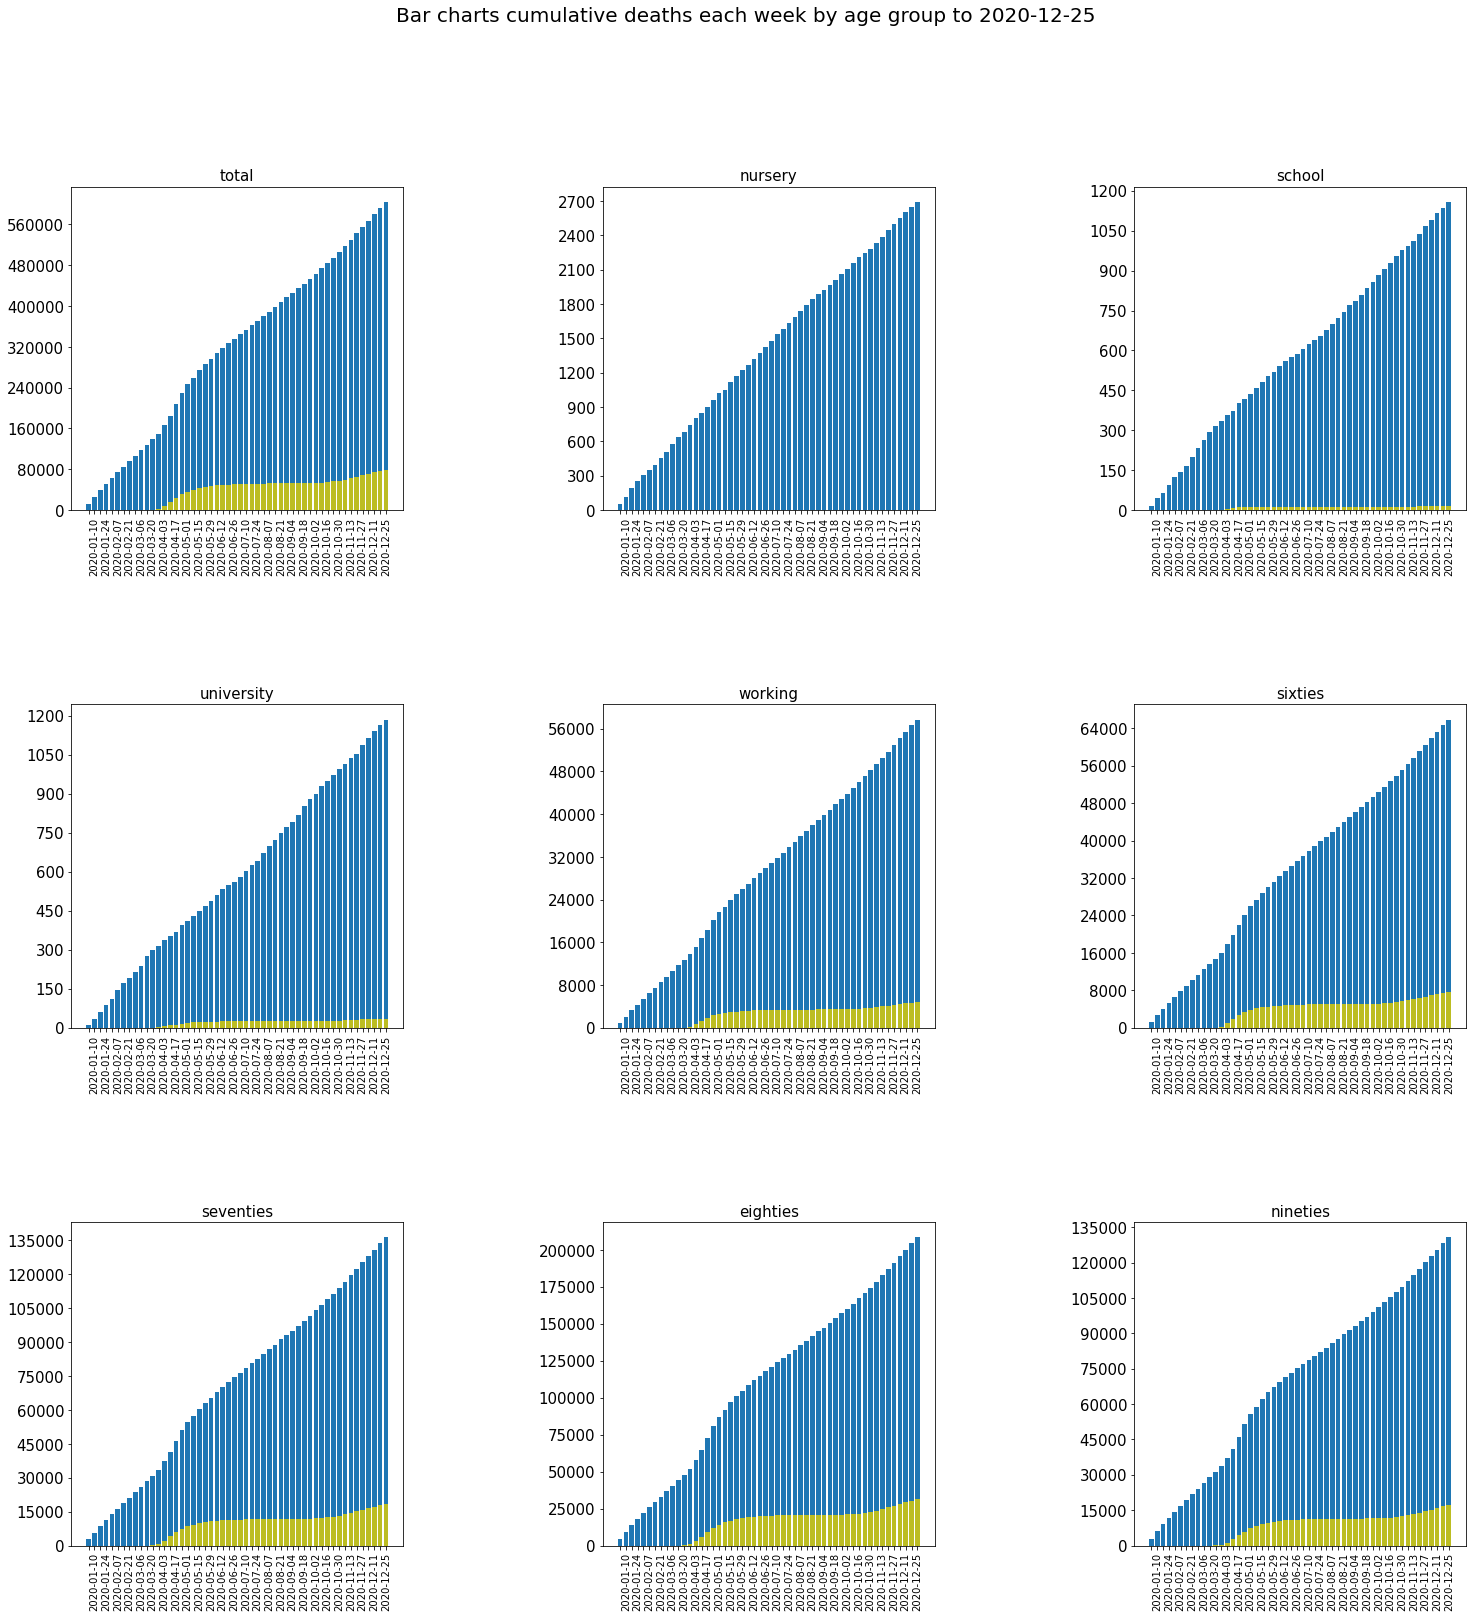

In [163]:
# bar charts showing number of deaths for each age group per week

col_names = ['total', 'nursery','school','university','working',
             'sixties','seventies','eighties','nineties']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/3), ncols=3, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts cumulative deaths each week by age group to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_deaths_comp.index.values

labels = list(df_deaths_comp['date'])

for i in range(1,len(labels),2):
    labels[i-1]=''
if len(labels) % 2 != 0:
    labels[-1]=''

for ii in range(len(col_names)):
    #for i in range(len(df)):
    y1 = df_deaths_comp[col_names[ii] + '_cum_all']
    y2 = df_deaths_comp[col_names[ii] + '_cum']
    ax[int(ii/3),ii - 3*int(ii/3)].set_title(col_names[ii], fontsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticks(x)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y1, color='#1f77b4')
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y2, color='#bcbd22')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

start_date = df_deaths_comp['date'].iloc[0]
end_date = df_deaths_comp['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'
    
    slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [164]:
columns = ['nursery_%','school_%','university_%','working_%',
           'sixties_%','seventies_%','eighties_%','nineties_%']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

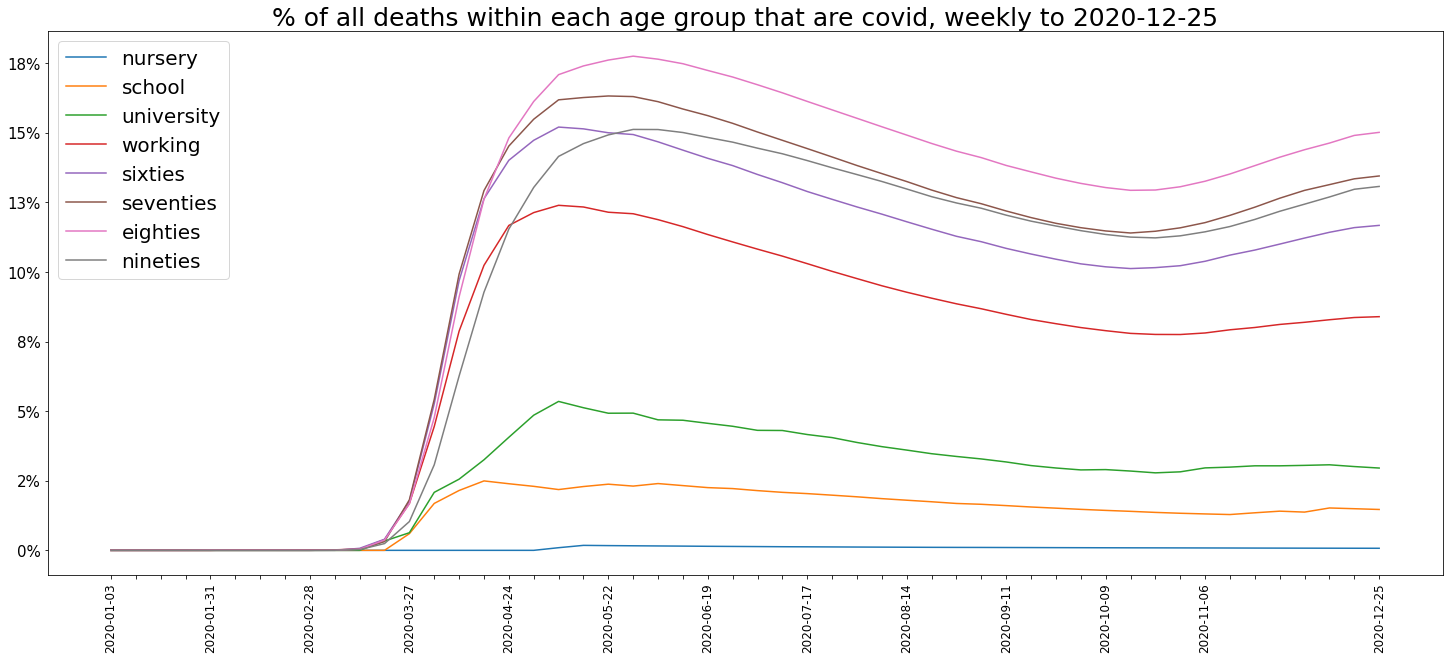

In [165]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, '% of all deaths within each age group that are covid, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [166]:
df_deathsAges_all_totals.head()

,Week ended,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27,2020-04-03,2020-04-10,2020-04-17,2020-04-24,2020-05-01,2020-05-08,2020-05-15,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02,2020-10-09,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,2020-12-18,2020-12-25
0,"Total deaths, all ages",12254.0,14058.0,12990.0,11856.0,11612.0,10986.0,10944.0,10841.0,10816.0,10895.0,11019.0,10645.0,11141.0,16387.0,18516.0,22351.0,21997.0,17953.0,12657.0,14573.0,12288.0,9824.0,10709.0,9976.0,9339.0,8979.0,9140.0,8690.0,8823.0,8891.0,8946.0,8945.0,9392.0,9631.0,9032.0,7739.0,9811.0,9523.0,9634.0,9945.0,9954.0,10534.0,10739.0,10887.0,11812.0,12254.0,12535.0,12456.0,12303.0,12292.0,13011.0,11520.0
1,"week over the previous 5 years 1, 10 (England ...",12175.0,13822.0,13216.0,12760.0,12206.0,11925.0,11627.0,11548.0,11183.0,11498.0,11205.0,10573.0,10130.0,10305.0,10520.0,10497.0,10458.0,9941.0,9576.0,10188.0,9940.0,8171.0,9977.0,9417.0,9404.0,9293.0,9183.0,9250.0,9093.0,9052.0,9036.0,9102.0,9085.0,9157.0,8241.0,9182.0,9306.0,9264.0,9377.0,9555.0,9811.0,9865.0,9759.0,9891.0,10331.0,10350.0,10380.0,10357.0,10695.0,10750.0,11548.0,7954.0


In [167]:
df_deathsAges_all_totals.set_index('Week ended', inplace=True)
df_deathsAges_all_totals = df_deathsAges_all_totals.T
df_deathsAges_all_totals.reset_index(inplace=True)
df_deathsAges_all_totals.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all_totals.columns.name=''

In [168]:
df_deathsAges_all_totals.head()

,date,"Total deaths, all ages","week over the previous 5 years 1, 10 (England and Wales)"
0,2020-01-03,12254.0,12175.0
1,2020-01-10,14058.0,13822.0
2,2020-01-17,12990.0,13216.0
3,2020-01-24,11856.0,12760.0
4,2020-01-31,11612.0,12206.0


In [169]:
df_deaths_comp = pd.merge(df_deaths_comp, df_deathsAges_all_totals, left_on='date', right_on='date', how='left')

In [170]:
final_column = df_deathsAges_all_totals.columns.tolist()[-1]

In [171]:
df_deaths_comp['5_year_average_cum'] = df_deaths_comp[final_column].cumsum()

In [172]:
df_deaths_comp['all_ex_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['total_cum']

In [173]:
df_deaths_comp['excess_deaths_incl_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['5_year_average_cum']
df_deaths_comp['excess_deaths_ex_covid'] = df_deaths_comp['all_ex_covid'] - df_deaths_comp['5_year_average_cum']

In [174]:
df_deaths_comp.head()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_cum,school_cum,university_cum,working_cum,sixties_cum,seventies_cum,eighties_cum,nineties_cum,<1_all,1-4_all,5-9_all,10-14_all,15-19_all,20-24_all,25-29_all,30-34_all,35-39_all,40-44_all,45-49_all,50-54_all,55-59_all,60-64_all,65-69_all,70-74_all,75-79_all,80-84_all,85-89_all,90+_all,nursery_all,school_all,university_all,working_all,sixties_all,seventies_all,eighties_all,nineties_all,nursery_cum_all,school_cum_all,university_cum_all,working_cum_all,sixties_cum_all,seventies_cum_all,eighties_cum_all,nineties_cum_all,nursery_%,school_%,university_%,working_%,sixties_%,seventies_%,eighties_%,nineties_%,total_cum_all,total_cum,"Total deaths, all ages","week over the previous 5 years 1, 10 (England and Wales)",5_year_average_cum,all_ex_covid,excess_deaths_incl_covid,excess_deaths_ex_covid
0,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,8.0,4.0,4.0,6.0,11.0,17.0,32.0,54.0,69.0,115.0,239.0,361.0,486.0,696.0,1164.0,1535.0,2049.0,2457.0,2898.0,56.0,14.0,11.0,887.0,1182.0,2699.0,4506.0,2898.0,56.0,14.0,11.0,887.0,1182.0,2699.0,4506.0,2898.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,12253.0,0.0,12254.0,12175.0,12175.0,12253.0,78.0,78.0
1,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,9.0,8.0,9.0,16.0,23.0,37.0,46.0,68.0,85.0,191.0,279.0,426.0,604.0,857.0,1341.0,1724.0,2290.0,2697.0,3297.0,59.0,33.0,23.0,1132.0,1461.0,3065.0,4987.0,3297.0,115.0,47.0,34.0,2019.0,2643.0,5764.0,9493.0,6195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,26310.0,0.0,14058.0,13822.0,25997.0,26310.0,313.0,313.0
2,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,7.0,5.0,4.0,10.0,25.0,37.0,47.0,77.0,118.0,189.0,306.0,461.0,562.0,803.0,1210.0,1612.0,2103.0,2421.0,2924.0,76.0,19.0,25.0,1235.0,1365.0,2822.0,4524.0,2924.0,191.0,66.0,59.0,3254.0,4008.0,8586.0,14017.0,9119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,39300.0,0.0,12990.0,13216.0,39213.0,39300.0,87.0,87.0
3,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,9.0,4.0,8.0,15.0,30.0,36.0,38.0,79.0,116.0,160.0,280.0,381.0,535.0,791.0,1167.0,1474.0,1863.0,2188.0,2626.0,62.0,27.0,30.0,1090.0,1326.0,2641.0,4051.0,2626.0,253.0,93.0,89.0,4344.0,5334.0,11227.0,18068.0,11745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,51153.0,0.0,11856.0,12760.0,51973.0,51153.0,-820.0,-820.0
4,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,6.0,5.0,4.0,23.0,23.0,28.0,58.0,76.0,100.0,163.0,278.0,382.0,525.0,732.0,1196.0,1445.0,1811.0,2124.0,2583.0,56.0,32.0,23.0,1085.0,1257.0,2641.0,3935.0,2583.0,309.0,125.0,112.0,5429.0,6591.0,13868.0,22003.0,14328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.0,62765.0,1.0,11612.0,12206.0,64179.0,62764.0,-1414.0,-1415.0


In [175]:
columns = ['total_cum_all', 'all_ex_covid', '5_year_average_cum']
chart_titles = ['All deaths incl covid', 'All deaths ex covid', '5 year average']

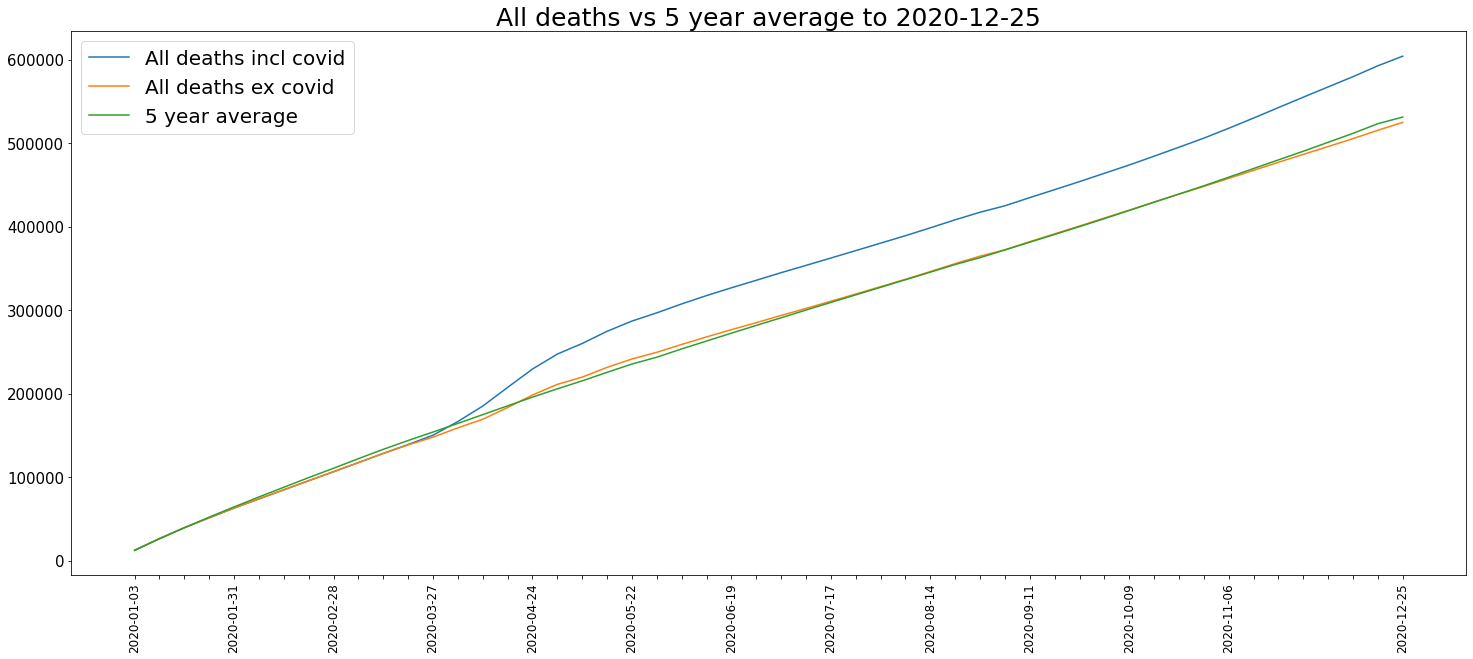

In [176]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, 'All deaths vs 5 year average to '  + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [177]:
def one_chart_incl_df(df, column, chart_title, bar, percent):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df[column]
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

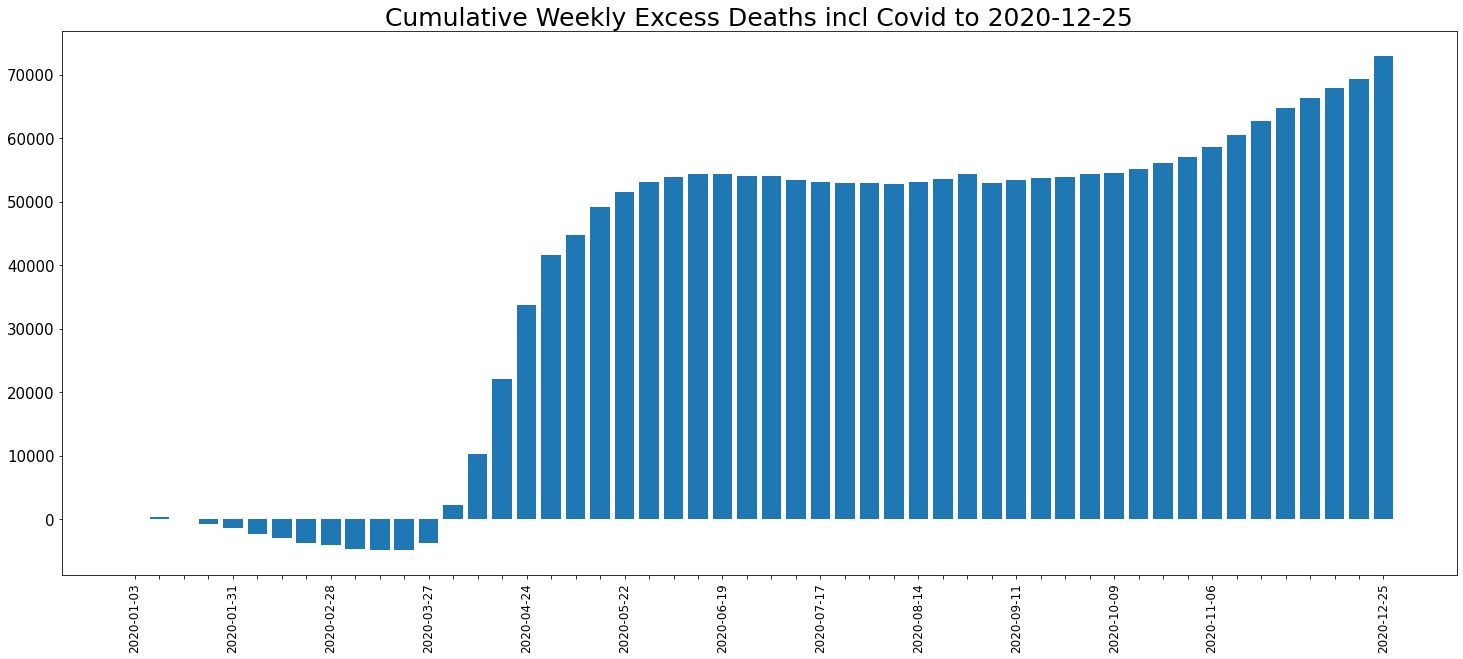

In [178]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_incl_covid', 'Cumulative Weekly Excess Deaths incl Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

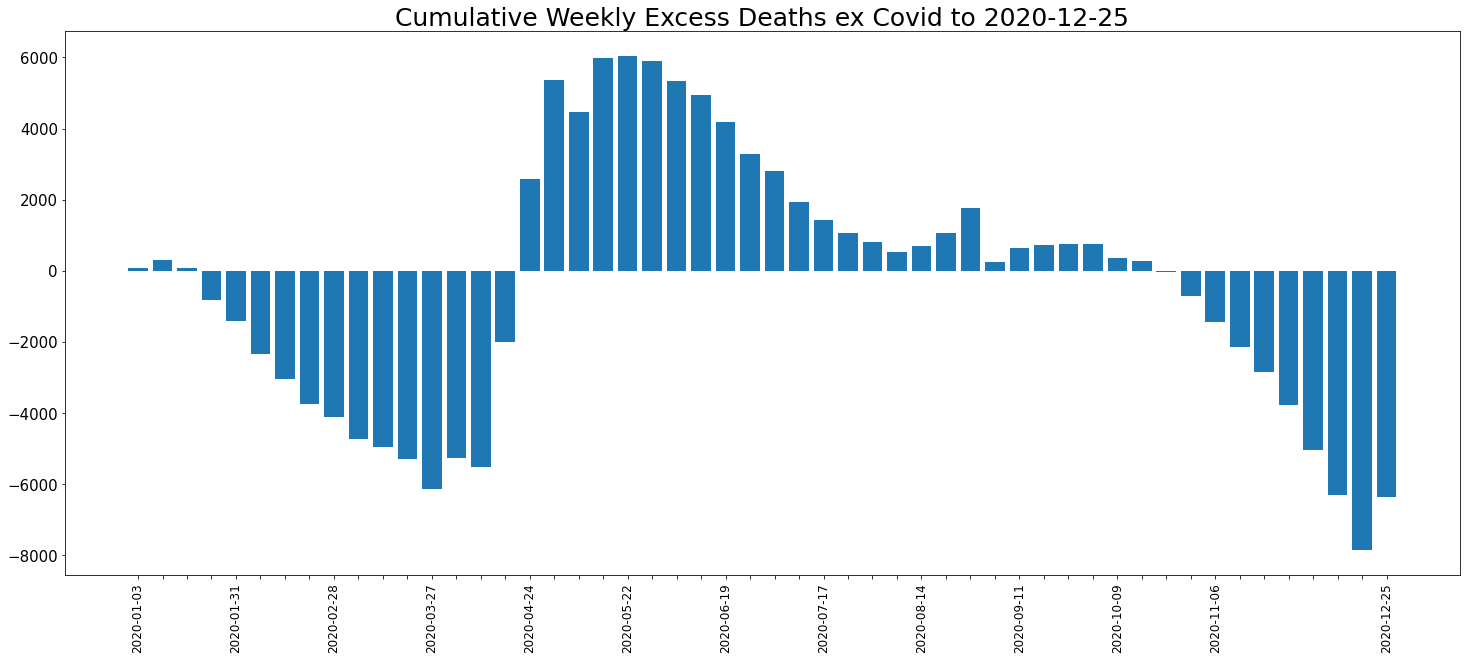

In [179]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_ex_covid', 'Cumulative Weekly Excess Deaths ex Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [180]:
df_deaths_comp.tail()

,date,<1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,nursery,school,university,working,sixties,seventies,eighties,nineties,nursery_cum,school_cum,university_cum,working_cum,sixties_cum,seventies_cum,eighties_cum,nineties_cum,<1_all,1-4_all,5-9_all,10-14_all,15-19_all,20-24_all,25-29_all,30-34_all,35-39_all,40-44_all,45-49_all,50-54_all,55-59_all,60-64_all,65-69_all,70-74_all,75-79_all,80-84_all,85-89_all,90+_all,nursery_all,school_all,university_all,working_all,sixties_all,seventies_all,eighties_all,nineties_all,nursery_cum_all,school_cum_all,university_cum_all,working_cum_all,sixties_cum_all,seventies_cum_all,eighties_cum_all,nineties_cum_all,nursery_%,school_%,university_%,working_%,sixties_%,seventies_%,eighties_%,nineties_%,total_cum_all,total_cum,"Total deaths, all ages","week over the previous 5 years 1, 10 (England and Wales)",5_year_average_cum,all_ex_covid,excess_deaths_incl_covid,excess_deaths_ex_covid
47,2020-11-27,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,9.0,9.0,26.0,40.0,68.0,116.0,160.0,314.0,435.0,559.0,612.0,665.0,0.0,1.0,1.0,158.0,276.0,749.0,1171.0,665.0,2.0,15.0,33.0,4298.0,6650.0,15849.0,27032.0,14623.0,44.0,7.0,5.0,5.0,18.0,33.0,41.0,58.0,99.0,101.0,207.0,328.0,416.0,602.0,757.0,1242.0,1562.0,1999.0,2289.0,2643.0,51.0,28.0,33.0,1250.0,1359.0,2804.0,4288.0,2643.0,2500.0,1066.0,1087.0,52971.0,60457.0,125312.0,191441.0,120076.0,0.000800,0.014071,0.030359,0.081139,0.109996,0.126476,0.141203,0.121781,554910.0,68502.0,12456.0,10357.0,490182.0,486408.0,64728.0,-3774.0
48,2020-12-04,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,16.0,18.0,35.0,65.0,106.0,178.0,280.0,431.0,519.0,603.0,631.0,0.0,0.0,1.0,144.0,284.0,711.0,1122.0,631.0,2.0,15.0,34.0,4442.0,6934.0,16560.0,28154.0,15254.0,50.0,4.0,3.0,8.0,15.0,27.0,42.0,50.0,88.0,117.0,200.0,293.0,468.0,568.0,792.0,1236.0,1528.0,1975.0,2237.0,2602.0,54.0,26.0,27.0,1258.0,1360.0,2764.0,4212.0,2602.0,2554.0,1092.0,1114.0,54229.0,61817.0,128076.0,195653.0,122678.0,0.000783,0.013736,0.030521,0.081912,0.112170,0.129298,0.143898,0.124342,567213.0,71395.0,12303.0,10695.0,500877.0,495818.0,66336.0,-5059.0
49,2020-12-11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,8.0,9.0,23.0,37.0,69.0,125.0,159.0,235.0,403.0,492.0,586.0,646.0,0.0,2.0,1.0,149.0,284.0,638.0,1078.0,646.0,2.0,17.0,35.0,4591.0,7218.0,17198.0,29232.0,15900.0,45.0,3.0,11.0,6.0,8.0,25.0,35.0,58.0,69.0,115.0,190.0,299.0,433.0,603.0,765.0,1230.0,1619.0,1989.0,2193.0,2596.0,48.0,25.0,25.0,1199.0,1368.0,2849.0,4182.0,2596.0,2602.0,1117.0,1139.0,55428.0,63185.0,130925.0,199835.0,125274.0,0.000769,0.015219,0.030729,0.082828,0.114236,0.131358,0.146281,0.126922,579505.0,74193.0,12292.0,10750.0,511627.0,505312.0,67878.0,-6315.0
50,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,20.0,40.0,73.0,103.0,164.0,261.0,394.0,598.0,632.0,721.0,0.0,0.0,0.0,147.0,267.0,655.0,1230.0,721.0,2.0,17.0,35.0,4738.0,7485.0,17853.0,30462.0,16621.0,46.0,5.0,4.0,5.0,11.0,24.0,38.0,57.0,73.0,115.0,189.0,317.0,437.0,581.0,805.0,1246.0,1614.0,2124.0,2439.0,2881.0,51.0,20.0,24.0,1226.0,1386.0,2860.0,4563.0,2881.0,2653.0,1137.0,1163.0,56654.0,64571.0,133785.0,204398.0,128155.0,0.000754,0.014952,0.030095,0.083630,0.115919,0.133445,0.149033,0.129695,592516.0,77213.0,13011.0,11548.0,523175.0,515303.0,69341.0,-7872.0
51,2020-12-25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,16.0,28.0,48.0,77.0,120.0,214.0,271.0,386.0,446.0,458.0,0.0,0.0,0.0,105.0,197.0,485.0,832.0,458.0,2.0,17.0,35.0,4843.0,7682.0,18338.0,31294.0,17079.0,33.0,7.0,5.0,6.0,10.0,21.0,35.0,46.0,70.0,99.0,179.0,262.0,359.0,515.0,729.0,1154.0,1436.0,1892.0,2154.0,2508.0,40.0,21.0,21.0,1050.0,1244.0,2590.0,4046.0,2508.0,2693.0,1158.0,1184.0,57704.0,65815.0,136375.0,208444.0,130663.0,0.000743,0.014680,0.029561,0.083928,0.116721,0.134467,0.150131,0.130710,604036.0,79290.0,11520.0,7954.0,531129.0,524746.0,72907.0,-6383.0


In [181]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at the Vaccine Rollout)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [182]:
df_vac.head()

,date,areaType,areaCode,areaName,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate
0,2020-12-20,overview,K02000001,United Kingdom,650714,0,620180,0
1,2020-12-27,overview,K02000001,United Kingdom,963208,0,312494,0
2,2021-01-03,overview,K02000001,United Kingdom,1296432,21313,333224,21313


In [183]:
last_date = df_vac['date'].iloc[-1]

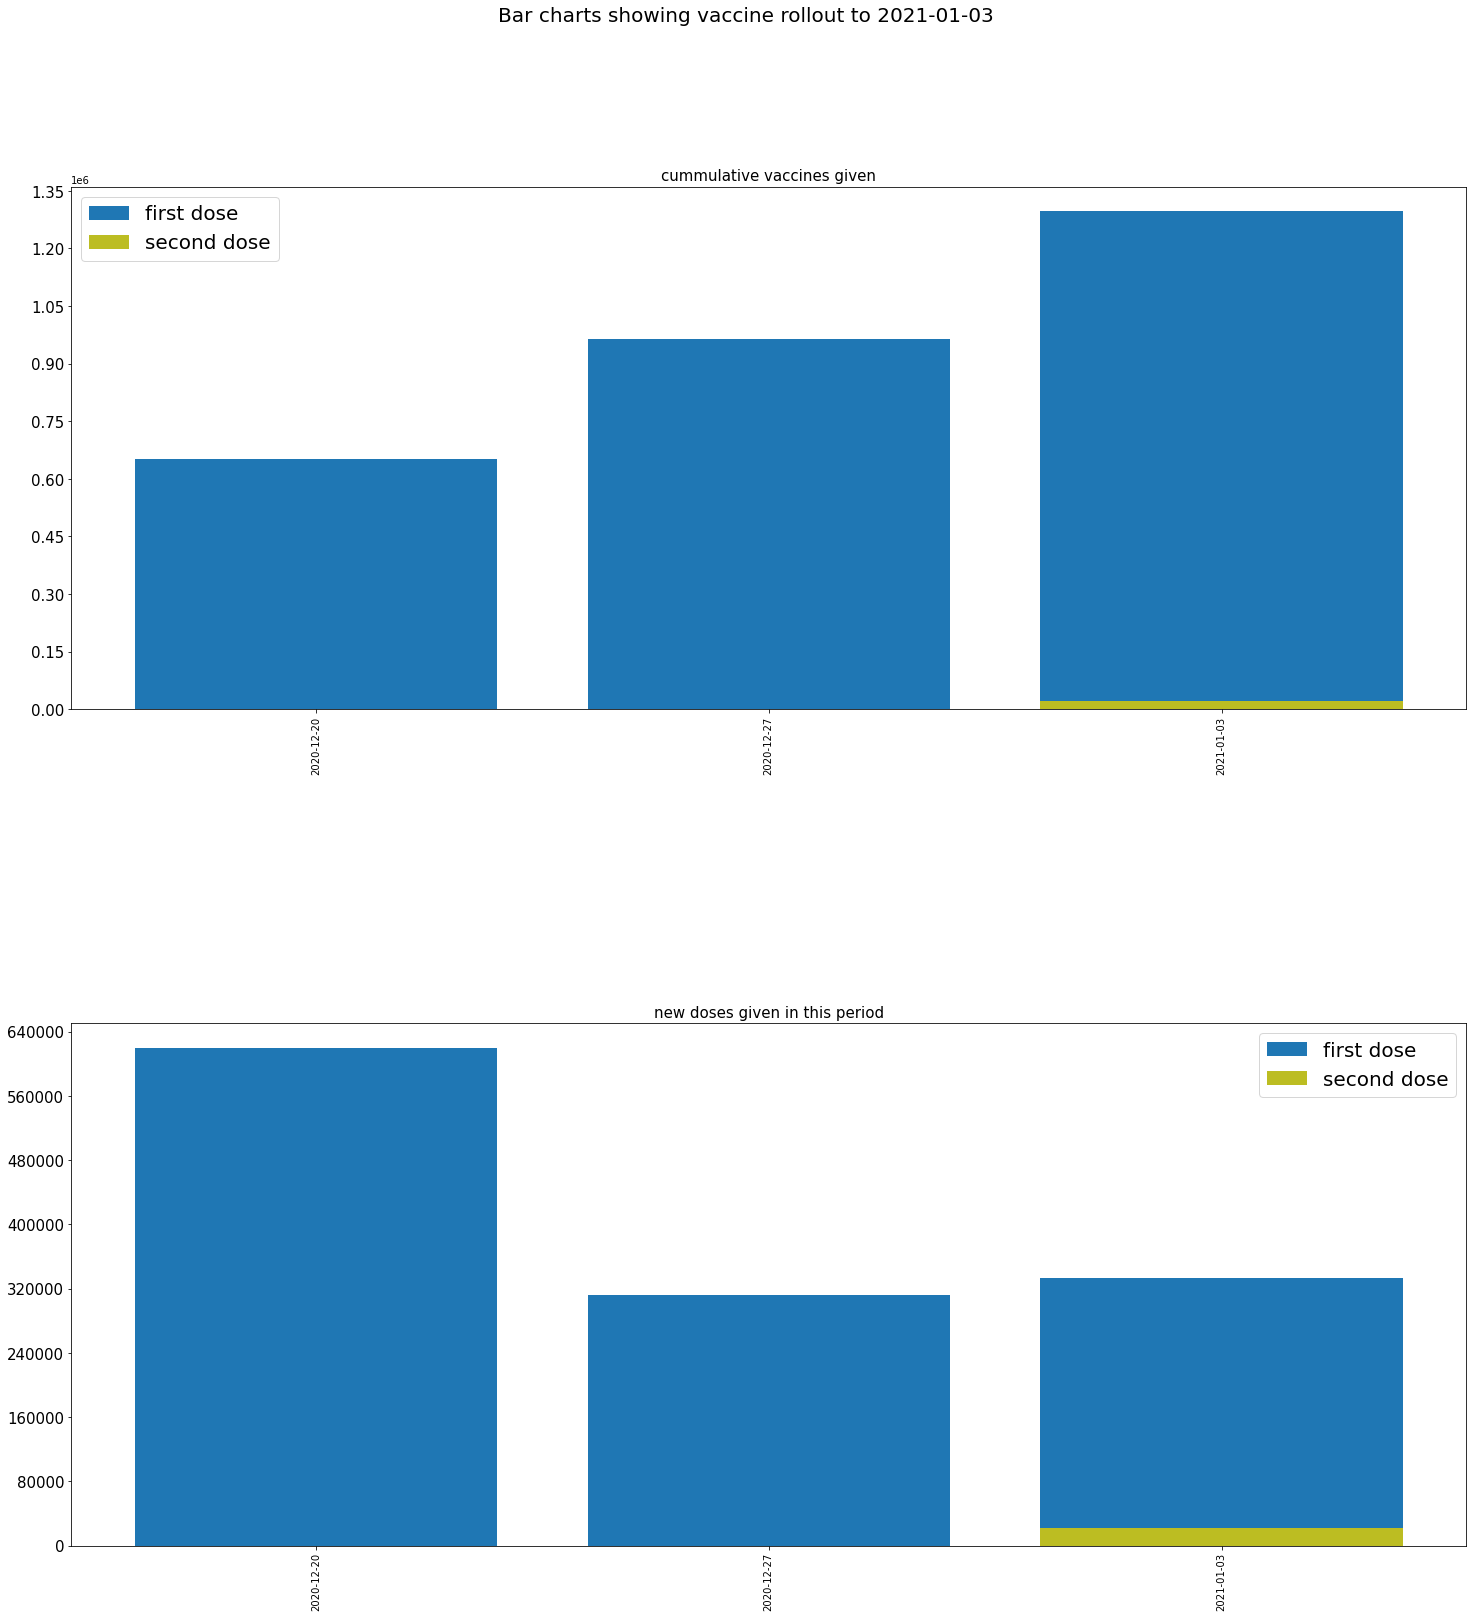

In [184]:
# bar charts showing vaccine rollout

col_names = ['cumPeopleVaccinatedFirstDoseByVaccinationDate', 'cumPeopleVaccinatedSecondDoseByVaccinationDate',
             'weeklyPeopleVaccinatedFirstDoseByVaccinationDate', 'weeklyPeopleVaccinatedSecondDoseByVaccinationDate']

titles = ['cummulative vaccines given', 'new doses given in this period']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/2), ncols=1, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts showing vaccine rollout to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_vac.index.values

labels = list(df_vac['date'])

# for i in range(1,len(labels),2):
#     labels[i-1]=''
# if len(labels) % 2 != 0:
#     labels[-1]=''

for ii in range(0,len(col_names),2):
    #for i in range(len(df)):
    y1 = df_vac[col_names[ii]]
    y2 = df_vac[col_names[ii+1]]
    ax[int(ii/2)].set_title(titles[int(ii/2)], fontsize=15)
    ax[int(ii/2)].set_xticks(x)
    ax[int(ii/2)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/2)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/2)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/2)].bar(x,y1, color='#1f77b4', label = 'first dose')
    ax[int(ii/2)].bar(x,y2, color='#bcbd22', label = 'second dose')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')
    ax[int(ii/2)].legend(fontsize=20)    

start_date = df_vac['date'].iloc[0]
end_date = df_vac['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - bar charts vaccine rollout.png'
    
    slideTitle.append('Bar charts showing vaccine rollout to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [185]:
#
# Preparing the presentation
#

In [186]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')
    prs_type = 'agi'
    #prs = Presentation('Presentation - template2.pptx')
    #prs_type = 'plain'

In [187]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    #listShapes = [1,2,0]
    
    if prs_type !='plain':
        
        listShapes = [1,2,0]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].runs[0].text = presentationTitle[i]
    
    else:        
        listShapes = [0,1,2]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].text = presentationTitle[i]

In [188]:
# # add the Preamble and Summary slides
# if PwrptPrep == 1:

#     title_Preamble_Summary = ['Preamble', 'Summary']

#     for i in range(2):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)

#         title = slide.shapes.title
#         title.text = title_Preamble_Summary[i]

#         top = height = Inches(1.5)
#         width = Inches(10.25)
#         left = Inches(0.25)
#         txBox = slide.shapes.add_textbox(left, top, width, height)
#         tf = txBox.text_frame
#         tf.word_wrap = True
#         p = tf.add_paragraph()
#         p.level = 1
#         p.text = 'start writing here'

In [189]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']
    
    for i in range(2):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
            p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds, deaths.  And also looking at the data by age'
            p = tf.add_paragraph()
            p.level = p_level 
            p.text = 'The charts at the end are for England only given i could only find hospital admission by age for England'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'All the data for these charts comes from UK government websites'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'Some charts are derived from other charts'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'Sources:'
            
            sources = [
            'https://coronavirus.data.gov.uk/details/cases',
            'https://coronavirus.data.gov.uk/details/deaths',
            'https://coronavirus.data.gov.uk/details/healthcare',
            'https://coronavirus.data.gov.uk/details/testing',
            'https://coronavirus.data.gov.uk/details/download https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
            'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek522020.xlsx',          
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumPeopleReceivingFirstDose&metric=newPeopleReceivingFirstDose&metric=newPeopleReceivingSecondDose&metric=cumPeopleReceivingSecondDose&format=csv']
            
            for i in range(len(sources)):
                p = tf.add_paragraph()
                p.level = p_level + 1
                p.font.size = Pt(8)
                p.text = sources[i]

In [190]:
# add the Chapter contents slide and Chapter 1 slide
if prs_type !='plain':

    if PwrptPrep == 1:

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
        else:
            blank_slide_layout = prs.slide_layouts[5]

        slide = prs.slides.add_slide(blank_slide_layout)

        shapes = slide.shapes

        shapes.title.text = 'Contents'

        rows = cols = 2
        left = Inches(0.25)
        top = Inches(1.5)
        width = Inches(1.5)
        height = Inches(1.5)

        table = shapes.add_table(rows, cols, left, top, width, height).table

        # set column widths
        table.columns[0].width = Inches(1.5)
        table.columns[1].width = Inches(2.0)

        tableText = ['01', 'Charts', '02', 'Appendix']
        TableFont = [60, 14, 60, 14]
        tableCell1 = [0,0,1,1]
        tableCell2 = [0,1,0,1]

        for i in range(4):
            table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
            cell = table.cell(tableCell1[i], tableCell2[i])
            para = cell.text_frame.paragraphs[0]
            para.font.bold = True
            para.font.size = Pt(TableFont[i])
            para.font.color.rgb = RGBColor(0, 55, 129) 
            cell.vertical_anchor = MSO_ANCHOR.MIDDLE
            fill = cell.fill
            fill.background()

        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '01'
        title = slide.shapes.title
        title.text = 'Charts'


In [191]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(left_inches)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [192]:
# # add the Appendix

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[15]
    
        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '02'
        title = slide.shapes.title
        title.text = 'Appendix'

In [193]:
# # add the 'First 5 lines of the latest upload slide'

# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)

#     shapes = slide.shapes

#     shapes.title.text = 'First 5 lines of most recent uploaded data file'

#     rows = 6
#     cols = 7
#     left = Inches(0.25)
#     top = Inches(1.5)
#     width = Inches(1.5)
#     height = Inches(0.25)

#     table = shapes.add_table(rows, cols, left, top, width, height).table

#     # set column widths
#     table.columns[0].width = Inches(0.5)
#     table.columns[1].width = Inches(2.5)
#     table.columns[2].width = Inches(2.5)
#     table.columns[3].width = Inches(1.0)
#     table.columns[4].width = Inches(1.5)
#     table.columns[5].width = Inches(1.0)
#     table.columns[6].width = Inches(1.0)
    
#     tableText = ['']
    
#     # table headers
#     for col in df[-1].columns[0:cols-1]:
#         tableText.append(col)
    
#     # populate rest of list with dataframe cells
#     for i in range((rows-1) * (cols-1)):
#         if i%(cols-1) == 0:
#             tableText.append(str(int(i/(cols-1))))          
#         tableText.append(str(df[-1].iat[int(i/(cols-1)), i%(cols-1)]))

#     for i in range((rows) * cols):
#         table.cell(int(i/(cols)), i%cols).text = tableText[i]
#         cell = table.cell(int(i/(cols)), i%cols)
#         para = cell.text_frame.paragraphs[0]
#         if i%cols == 0 or int(i/cols) == 0:
#             para.font.bold = True
#         else:
#             para.font.bold = False
#         para.font.size = Pt(10)
#         para.font.color.rgb = RGBColor(0, 0, 0) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()
        

In [194]:
# # and the 'Code used to gather page', rotate the text
# # and upload the Python, github and Pandas pages

# if PwrptPrep == 1:
    
#     # list of appendix text files to take from my PC to be put into slides
#     appendixTitleList = ['Code used to gather the checkatrade data',
#                          'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
#     appendixFileList = ['Presentation - code checkatrade.txt',
#                         'Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
#     appendixFileList_alt = []
#     for element in appendixFileList:
#         appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
#     for i in range(len(appendixTitleList)):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)
#         title = slide.shapes.title
#         title.text = appendixTitleList[i]
#         try:
#             lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
#         except:
#             lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
#         if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # rotate the text code -90
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(-4.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = -90            
#         else: # other slides are normal
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(0.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = 0
            
#         tf = txBox.text_frame
#         tf.word_wrap = True
        
#         for ii in range(len(lines)):
#             p = tf.add_paragraph()
#             p.level = 1
        
#             if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # reduce the font size
#                 p.font.size = Pt(8)
#                 p.level = 0  
#             else:
#                 txBox.rotation = 0
#                 p.font.size = Pt(12)            
            
#             if 'https' in lines[ii]:
#                 r = p.add_run()
#                 r.text = lines[ii].split('https')[0]
#                 r1 = p.add_run()
#                 r1.text = 'https' + lines[ii].split('https')[1]        
#                 hlink = r1.hyperlink
#                 hlink.address = r1.text
#             else:
#                 p.text = lines[ii]


In [195]:
# add closing slide

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[40]
        slide = prs.slides.add_slide(blank_slide_layout)

In [196]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [197]:
#
# all the slide types
# only to be run for reference
#

In [198]:
# prs = Presentation('Persentation - template.pptx')

In [199]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [200]:
# prs.save('presentationPrep - all the slides.pptx')